# CHILD ML Analysis
    - Code Refactoring & Pipeline for CHILD Dataset

##### Step One: Feature Selection Strategies

##### Step Two: Making Robust Pipelines - Percentage Threshhold Class, Log-fy Class, Feature Selection Class. etc

##### Step Three: Tunning & Feature Engineering/Selection to Improve Performance 

##### Step Four: Visualization function for model performance

# Libaries

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("undergoing")? (<ipython-input-14-bdab20bc7c24>, line 3)

<IPython.core.display.Javascript object>

In [6]:
# Preferences of autoformatting & Multiple Output
%load_ext nb_black

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Imputer

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To use the experimental IterativeImputer, we need to explicitly ask for it:


# Data File
child_data_path = (
    "/Users/stan/Desktop/ML_Pipeline/CHILD_Data/Step_One/CHILD_Unengineered.xlsx"
)

child_breastfeeding_path = (
    "/Users/stan/Desktop/ML_Pipeline/CHILD_Data/Step_Two/breastfeeding data.xlsx"
)

child_wheezephenotype_path = (
    "/Users/stan/Desktop/ML_Pipeline/CHILD_Data/Step_Two/wheeze phenotypes.xlsx"
)

child_ethnicity_path = (
    "/Users/stan/Desktop/ML_Pipeline/CHILD_Data/Step_Two/Prenatal Q91PRNMH18WK.xlsx"
)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

# Define Features &  Target

In [7]:
# Categorical Features

SUB_CAT_MUST = [
    "Antibiotics_Usage",
]

SUB_CAT_BINARY_NOMISSING = [
    "F10min_Intubation",
    "F10min_Mask_Ventilation",
    "F10min_Free_Flow_Oxygen",
    "F10min_Oxygen_Mask",
    "F10min_Positive_Pressure_Ventilation",
    "F10min_Perineum_suction",
    "F10min_Suction",
    "F10min_No_Measure_Needed",
    "Prenatal_Bleeding",
    "Prenatal_Nausea",
    "Prenatal_Infections",
    "Prenatal_Induced_Hypertension",
    "Prenatal_Gestational_Diabetes",
    "Prenatal_Cardiac_Disorder",
    "Prenatal_Hypertension",
    "Prenatal_Hypotension",
    "Prenatal_None_Conditions",
    "Prenatal_Other_Conditions",
]

SUB_CAT_BINARY_WITHMISSING = [
    "BF_1m",
    "BF_9m",
    "BF_12m",
    "Anesthetic_delivery",
    "Analgesics_usage_delivery",
    "Respiratory_Problems_Birth",
    "Jaundice_Birth",
    "Complications_Birth",
    "Home_Furry_Pets_6m",
    "Home_New_Furnitures_6m",
    "Home_Presence_Smoke_6m",
    "Mother_Asthma",
    "Father_Asthma",
    "Parental_Asthma",
    "Father_Caucasian",
    "Mother_Caucasian",
    "Dad_Atopy",
    "Dad_Food",
    "Dad_Inhalant",
    "Mom_Atopy",
    "Mom_Food",
    "Mom_Inhalant",
    "Prenatal_Second_Hand",
    "Prenatal_Maternal_Smoke",
]

SUB_CAT_OHE = [
    "Study_Center",  # No missing
    "Gender",  # No missing
    "BF_Status_3m",  # Unknown represent missing
    "BF_Status_6m",  # Unknown represent missing
    "Child_Ethinicity",  # np.nan represent missing
]

SUB_CAT_ENGI = [
    "Mode_of_delivery",
    "Mother_Condition_Delivery",
    "First_10min_Measure",
]

SUB_CAT_RESP = [
    "Respiratory_Report_Months",
    "Respiratory_Infections",
    "Severity_of_Respiratoryinfections",
]

SUB_CAT_WHEEZE_EARLY = [
    "Wheeze_3m",
    "Noncold_Wheeze_3m",
]

CAT_VARS_REPO = (
    SUB_CAT_MUST
    + SUB_CAT_BINARY_NOMISSING
    + SUB_CAT_BINARY_WITHMISSING
    + SUB_CAT_OHE
    + SUB_CAT_ENGI
    + SUB_CAT_RESP
    + SUB_CAT_WHEEZE_EARLY
)

# Numeric Features

SUB_NUM_WITHMISSING = [
    "Gest_Days",
    "Weight_0m",
    "Weight_3m",
    "Weight_12m",
    "BF_Implied_Duration",
    "PSS_36week",
    "CSED_36week",
    "PSS_18week",
    "CSED_18week",
    "PSS_6m",
    "PSS_12m",
    "CSED_6m",
    "CSED_12m",
]

SUB_NUM_LOG1P = [
    "No_of_Pregnancy",
    "Stay_Duration_Hospital",
    "Number_of_AntibioticsCourse",
    "Epi_Noncold_Wheeze_3m",
]

SUB_NUM_ORDINAL = ["Apgar_Score_1min", "Apgar_Score_5min"]

SUB_NUM_HOMEDUST = [
    "Home_DEP_3m",
    "Home_DiBP_3m",
    "Home_DNBP_3m",
    "Home_BzBP_3m",
    "Home_DEHP_3m",
]

NUM_VARS_REPO = SUB_NUM_WITHMISSING + SUB_NUM_LOG1P + SUB_NUM_ORDINAL + SUB_NUM_HOMEDUST

# Target Variables

# 'Recurrent_Wheeze_1y':Recurrent wheezing at age 1 year, defined as having more than 2 episodes in the past 12 months, taken from chlth3m, 6m and 1y  taken from chlth3m, 6m and 1y
# 'Recurrent_Wheeze_3y': Recurrent wheezing at age 3 year, defined as having more than 2 episodes in the past 12 months, taken from chlth2hy, 3y OR episodes reported in CHCLA3y
# 'Recurrent_Wheeze_5y': Recurrent wheezing at age 5 year, defined as having more than 2 episodes in the past 12 months, taken from chlth5y OR episodes reported in CHCLA5y

TARGET_OF_SELECT = [
    "Asthma_Diagnosis_3yCLA",
    "Asthma_Diagnosis_5yCLA",
    "Recurrent_Wheeze_1y",  # Self-report Wheeze at earliest time point
    "Recurrent_Wheeze_3y",
    "Recurrent_Wheeze_5y",
    "Wheeze_Traj_Type",  # Derived by Vera Dai, Less NaN Value, 2+4 could be useful
    "Medicine_for_Wheeze_5yCLA",  # More objective
    "Viral_Asthma_3yCLA",  # No need to decide "possible" category
    "Triggered_Asthma_3yCLA",
    "Viral_Asthma_5yCLA",  # No need to decide "possible" category
    "Triggered_Asthma_5yCLA",
]

TARGET_TO_ENGI = [
    "Cumulative_Wheeze_36m",  # No missing value
    "Cumulative_Wheeze_60m",  # No missing value
]

TARGET_VAR_REPO = TARGET_OF_SELECT + TARGET_TO_ENGI

# FEATURE TO DISCUSS:
FEA_OF_TOPIC = [
    "Time_of_AntibioticsUsage",  # Could be used like the HOME DUST availability data to see if there is a non-linear relationship between time and asthma outcome
]

FEA_OF_INTEREST = [
    "BF_18m",  # Too much missing value
    "BF_24m",
]

FEA_OF_LITTLE = [
    "Percentage_OutdoorsActivity_6m",  # Majority Missing
    "Weight_36m",
    "Weight_60m",  # Too late
    "Weight_for_age_0m",
    "Weight_for_age_3m",
    "Weight_for_age_12m",  # Correlated with Weight_0m
    "Weight_for_age_36m",
    "Weight_for_age_60m",  # Too late
    "PSS_18m",  # Too late , No of Missing Value
    "PSS_24m",  # Too late , No of Missing Value
    "CSED_18m",  # See Above
    "CSED_24m",  # See Above
    "BF_3m",  # Repetitive Information with BF_Status_3m
    "BF_6m",  # Repetitive Information with BF_Status_6m
    "Systolic_BP_3yCLA",
    "Diastolic_BP_3yCLA",
    "Pulse_Rate_3yCLA",
    "Wheeze_3yCLA",  # Could be a potential target variable
    "Wheeze_5yCLA",  # Could be a potential target variable
    "Wheeze_withoutcold_5yCLA",  # See Above
    "Medical_Conditions_5yCLA",  # See Above
    "Regular_Controller_5yCLA",
    "Intermittent_Controller_5yCLA",
    "Reliever_5yCLA",
    "Frequency_Oral_Steroid_5yCLA",
    "Wheeze_Frequency_5yCLA",
    "Systolic_BP_5yCLA",
    "Diastolic_BP_5yCLA",
    "Pulse_Rate_5yCLA",
]


FEA_OF_UNUSEDWHEEZE = list(
    set(
        [
            "Wheeze_3m",
            "Noncold_Wheeze_3m",
            "Epi_Noncold_Wheeze_3m",
            "Wheeze_6m",
            "Noncold_Wheeze_6m",
            "Epi_Noncold_Wheeze_6m",
            "Wheeze_1y",
            "Noncold_Wheeze_1y",
            "Epi_Noncold_Wheeze_1y",
            "Wheeze_18m",
            "Noncold_Wheeze_18m",
            "Epi_Noncold_Wheeze_18m",
            "Wheeze_2y",
            "Noncold_Wheeze_2y",
            "Epi_Noncold_Wheeze_2y",
            "Wheeze_2yh",
            "Noncold_Wheeze_2hy",
            "Epi_Noncold_Wheeze_2hy",
            "Wheeze_3y",
            "Noncold_Wheeze_3y",
            "Epi_Noncold_Wheeze_3y",
            "Wheeze_4y",
            "Noncold_Wheeze_4y",
            "Epi_Noncold_Wheeze_4y",
            "Wheeze_5y",
            "Noncold_Wheeze_5y",
            "Epi_Noncold_Wheeze_5y",
            "Cumulative_Wheeze_3m",
            "Cumulative_Wheeze_6m",
            "Cumulative_Wheeze_12m",
            "Cumulative_Wheeze_18m",
            "Cumulative_Wheeze_24m",
            "Cumulative_Wheeze_30m",
            "Cumulative_Wheeze_36m",
            "Cumulative_Wheeze_48m",
        ]
    )
    - set(TARGET_TO_ENGI)
    - set(SUB_CAT_WHEEZE_EARLY)
    - set(["Epi_Noncold_Wheeze_3m"])
)

FEA_TO_DROP = FEA_OF_TOPIC + FEA_OF_INTEREST + FEA_OF_UNUSEDWHEEZE + FEA_OF_LITTLE

<IPython.core.display.Javascript object>

# Loading CHILD data with more files

In [5]:
def load_child_with_more(
    child_data_path,
    child_breastfeeding_path,
    child_wheebzephenotype_path,
    child_ethnicity_path,
):
    """Load CHILD data with add-on features from additional files
    """

    df_child = pd.read_excel(child_data_path)

    df_bf = pd.read_excel(child_breastfeeding_path)
    df_bf.rename(
        columns={
            "SubjectNumber": "Subject_Number",
            "BF_3m_status": "BF_Status_3m",
            "BF_6m_status": "BF_Status_6m",
        },
        inplace=True,
    )

    df_bf = df_bf.replace({"unknown": np.nan})

    df_wp = pd.read_excel(
        child_wheezephenotype_path, usecols=["SubjectNumber", "GROUP"]
    )

    df_wp.rename(
        columns={"SubjectNumber": "Subject_Number", "GROUP": "Wheeze_Traj_Type"},
        inplace=True,
    )

    df_ethnicity = pd.read_excel(
        child_ethnicity_path,
        usecols=["SubjectNumber", "PRNMH18WQ3_1a", "PRNMH18WQ3_2a"],
    )
    df_ethnicity.columns = ["Subject_Number", "Mother_Caucasian", "Father_Caucasian"]
    df_ethnicity["Child_Ethinicity"] = (
        df_ethnicity.Mother_Caucasian + df_ethnicity.Father_Caucasian
    ).map({2: "Caucasian", 1: "HalfCaucas", 0: "NonCaucas"})
    df_ethnicity = df_ethnicity.replace({8888: np.nan})

    df_child = pd.merge(
        pd.merge(df_child, df_bf, on="Subject_Number", how="left"),
        df_wp,
        on="Subject_Number",
        how="left",
    )

    df_child = pd.merge(df_child, df_ethnicity, on="Subject_Number", how="left")

    return df_child


df_child = load_child_with_more(
    child_data_path,
    child_breastfeeding_path,
    child_wheezephenotype_path,
    child_ethnicity_path,
)

<IPython.core.display.Javascript object>

In [4]:
# Columns inclusiveness check
df_child.shape
df_child[TARGET_VAR_REPO + NUM_VARS_REPO + CAT_VARS_REPO].shape
print("Number of categorical features is: ", len(CAT_VARS_REPO))
print("Number of numeric features is: ", len(NUM_VARS_REPO))
print("Number of target variables is: ", len(TARGET_VAR_REPO))
print("Number of dropped features is: ", len(FEA_TO_DROP))
set(df_child.columns.values) - set(
    TARGET_VAR_REPO + NUM_VARS_REPO + CAT_VARS_REPO + FEA_TO_DROP
)

df_child_backup = df_child.copy()

(3060, 157)

(3060, 93)

Number of categorical features is:  56
Number of numeric features is:  24
Number of target variables is:  13
Number of dropped features is:  63


{'Subject_Number'}

<IPython.core.display.Javascript object>

In [5]:
df_child

,Subject_Number,No_of_Pregnancy,Anesthetic_delivery,Analgesics_usage_delivery,Mode_of_delivery,Apgar_Score_1min,Apgar_Score_5min,Respiratory_Problems_Birth,Jaundice_Birth,Complications_Birth,...,Recurrent_Wheeze_1y,Recurrent_Wheeze_5y,Mother_Condition_Delivery,First_10min_Measure,BF_Status_3m,BF_Status_6m,Wheeze_Traj_Type,Mother_Caucasian,Father_Caucasian,Child_Ethinicity
0,20059,4.0,1.0,1.0,1.0,9.0,9.0,0.0,0.0,0.0,...,0.0,0.0,"Bleeding,Nausea,Gestational Diabetes",None,Partial,Partial,1.0,1.0,1.0,Caucasian
1,20060,2.0,1.0,1.0,8.0,2.0,6.0,0.0,0.0,0.0,...,0.0,0.0,Nausea,Oxygen Mask,Exclusive,Zero,1.0,1.0,1.0,Caucasian
2,20061,1.0,1.0,1.0,8.0,9.0,9.0,0.0,0.0,0.0,...,0.0,0.0,NaN,None,Exclusive,Partial,1.0,0.0,1.0,HalfCaucas
3,20062,2.0,1.0,0.0,1.0,9.0,10.0,NaN,0.0,0.0,...,0.0,0.0,Nausea,NaN,Exclusive,Partial,1.0,1.0,1.0,Caucasian
4,20063,2.0,1.0,NaN,1.0,9.0,9.0,NaN,NaN,NaN,...,0.0,0.0,Nausea,None,Exclusive,Exclusive,3.0,1.0,1.0,Caucasian
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,50861,1.0,1.0,1.0,1.0,9.0,9.0,1.0,0.0,1.0,...,0.0,1.0,None,None,Zero,Zero,2.0,0.0,0.0,NonCaucas
3056,50862,1.0,1.0,0.0,3.0,9.0,9.0,0.0,0.0,0.0,...,0.0,1.0,Other,None,Partial,Partial,2.0,1.0,1.0,Caucasian
3057,50863,1.0,1.0,0.0,1.0,9.0,9.0,0.0,0.0,0.0,...,0.0,NaN,Other,None,Exclusive,Partial,1.0,1.0,1.0,Caucasian
3058,50864,2.0,1.0,0.0,1.0,9.0,9.0,0.0,0.0,0.0,...,0.0,0.0,None,Suction while in warmer,Exclusive,Partial,1.0,0.0,1.0,HalfCaucas


<IPython.core.display.Javascript object>

# Preprocessing Transformers <a id='0'></a> 
1. [TargetSelector](#1) - Define your target variable, and cast adopted features to object(string) or numeric(float) to preprocess
2. [ApgarTransformer](#2) - Rank Certain Variable with Missing Value
3. [BirthTransformer](#3) - Feature Engineer Birth Profile Variables
4. [Log1pTransformer](#4) - Log1p Certain Variables To Shrink the dispersion of variables for Later scaling 
5. [RespiratoryTransformer](#5) - Feature Engineer the Respiratory Variable 
6. [ColumnsFilter](#6) - Use pairwise correlation and NaN threshold percentage to drop redundant columns 
7. [DiscretizePSS](#7) - Use common accepted PSS scaling intepretation to engineer the mental situation to help model building (Missingness at 6m is a very important indicator) 
8. [AdoptedFeatureTransformer](#8) - (Optional)  Specify your desired subset of features for model building if needed (ignored in the first pipeline model). The reason for such existence is for train on features incrementally, to see how many features are optimal for model performance. 
9. [ImputerStrategizer](#9) - Use drop - All columns with missingness, or Impute - columns with very low missingness -threshold, or to keep all for imputing, to control the following imputation process
10. [CatNaNImputer](#10) Adopt personalized categorical NAN imputater where missingness will be kept as an indicator & one-hot-encoding will also be applied
11. [NumImputingSelector](#11)  Based on the characteristics of columns and the missingness for that column, adopt one of the imputing process (SimpleImputer, KNN, Random Forest, IterativeImputer)
12. [ScalingTransformer](#12) - Apply Scaling For Feature Importance Intepretation
13. [StatsThreshTransformer](#13) - Apply Stats Filtering to shrink the Feature Table
14. [imbalanceSampler](#14) - Use Oversampler or Undersampler to strength the model learning (ratio) could be a factor as well
15. [PCAdimensionreduction](#15) - (Optional) Help boost the signal while reducing noise, but may need more for Intepretability 

 #### Loading Libraries

In [6]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

<IPython.core.display.Javascript object>

In [7]:
# TARGET_VAR_REPO
df_child.Asthma_Diagnosis_5yCLA.value_counts(dropna=False)
df_child.select_dtypes(include="object")[:10]

0.0    2234
NaN     415
2.0     247
1.0     164
Name: Asthma_Diagnosis_5yCLA, dtype: int64

,Study_Center,Gender,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Mother_Condition_Delivery,First_10min_Measure,BF_Status_3m,BF_Status_6m,Child_Ethinicity
0,Vancouver,F,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...","Bleeding,Nausea,Gestational Diabetes",None,Partial,Partial,Caucasian
1,Vancouver,M,"[nan, nan, nan, nan, nan, nan, 3.4825462012320...","[nan, nan, nan, nan, nan, nan, 'No', 'LRTI', '...","[nan, nan, nan, nan, nan, nan, 'No', 'Mild', '...",Nausea,Oxygen Mask,Exclusive,Zero,Caucasian
2,Vancouver,M,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",NaN,None,Exclusive,Partial,HalfCaucas
3,Vancouver,F,"[nan, nan, nan, nan, 2.9897330595482545, 7.129...","[nan, nan, nan, nan, 'No', 'LRTI', 'LRTI', 'LR...","[nan, nan, nan, nan, 'No', 'Mild', 'Mild', 'Mi...",Nausea,NaN,Exclusive,Partial,Caucasian
4,Vancouver,M,"[nan, nan, nan, nan, 2.9568788501026693, 13.96...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...",Nausea,None,Exclusive,Exclusive,Caucasian
5,Vancouver,M,"[nan, 3.0882956878850107, 7.063655030800822, 1...","[nan, 'No', 'No', 'No', 'No', 'No', 'No', 'No'...","[nan, 'No', 'No', 'No', 'No', 'No', 'No', 'No'...","Bleeding,Nausea,Hypertension",NaN,Zero,Zero,Caucasian
6,Vancouver,M,"[3.0882956878850107, 6.11088295687885, 11.4332...","['No', 'No', 'LRTI', 'No', 'No', 'No', 'No', '...","['No', 'No', 'Mild', 'No', 'No', 'No', 'No', '...","Nausea,Hypertension",Free Flow Oxygen,Partial,Zero,HalfCaucas
7,Vancouver,F,"[nan, nan, nan, nan, 3.2854209445585214, 7.326...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...",Other,NaN,Exclusive,Partial,Caucasian
8,Vancouver,F,"[nan, nan, nan, 2.9897330595482545, 7.35934291...","[nan, nan, nan, 'No', 'No', 'No', 'No', 'No', ...","[nan, nan, nan, 'No', 'No', 'No', 'No', 'No', ...",Pregnancy Induced Hypertension,Free Flow Oxygen,Exclusive,Partial,Caucasian
9,Vancouver,F,"[nan, nan, nan, nan, 2.891170431211499, 6.6365...","[nan, nan, nan, nan, 'No', 'No', 'LRTI', 'No',...","[nan, nan, nan, nan, 'No', 'No', 'Mild', 'No',...",Bleeding,None,Exclusive,Partial,Caucasian


<IPython.core.display.Javascript object>

#### TargetSelector <a id='1'></a>
Target + Features CAN NOT be built into the transformer for auto parametering. Pipeline-able transformer is mainly for processing X. (Features)

In [16]:
def TargetSelector(
    df=df_child,
    target_name="Asthma_Diagnosis_5yCLA",
    target_mapping={2: 1},
    include_dust=False,
):
    """Define your target variable, and cast adopted features to object(string) or numeric(float) to preprocess.
    
    Parameters:
    -----------------
    df : pandas.DataFrame, default = df_child
        A DataFrame to be processed
    
    target_name : str,  default 'Asthma_Diagnosis_5yCLA'
        A string that is selected from TARGET_VAR_REPO list to control the entire dataframe to be processed
    
    target_mapping : dictionary, default {2:1} that is suggesting possible asthma(2) will be treated as asthma(0)  
        A dictionary used to specify how to map the "possible", or, or other variables 
    
    include_dust : boolean, default is False 
        A boolean for certain attribute selection that will drastically reduce sample size for analysis
    
    Returns:
    ----------------
    Overal df, (in which target will be renamed to 'y') X,y processed for later on modelling 
    """
    print("------------------------------------------------------")
    print("Target variable can be one of: \n", TARGET_VAR_REPO)
    print("------------------------------------------------------")
    print("****Target variable will be renamed to y for easy access.**** \n")

    #     #It's dummied numeric number for the machine to digest!
    #     for coln in CAT_VARS_REPO:
    #         df[coln] = df[coln].astype(str)  # Dummified variable should not be cast to string type.

    #     for coln in NUM_VARS_REPO:
    #         df[coln] = pd.to_numeric(df_child[coln], errors="coerce")

    y = df[target_name].copy().replace(target_mapping)

    if include_dust:
        X = df[NUM_VARS_REPO + CAT_VARS_REPO + ["Subject_Number"]].copy()
        df_temp = pd.concat([X, y], axis=1)

        df_Xy = df_temp.dropna(subset=SUB_NUM_HOMEDUST + [target_name]).reset_index(
            drop=True
        )

        df_Xy.set_index(
            "Subject_Number", inplace=True
        )  # Use Index as an extra information

        X_return = df_Xy.drop(columns=[target_name])
        y_return = df_Xy[target_name]

        return df_Xy.rename(columns={target_name: "y"}), X_return, y_return

    else:
        X = (
            df[NUM_VARS_REPO + CAT_VARS_REPO + ["Subject_Number"]]
            .copy()
            .drop(columns=SUB_NUM_HOMEDUST)
        )
        df_temp = pd.concat([X, y], axis=1)

        df_Xy = df_temp.dropna(subset=[target_name]).reset_index(drop=True)

        df_Xy.set_index(
            "Subject_Number", inplace=True
        )  # Use Index as an extra information

        X_return = df_Xy.drop(columns=target_name)
        y_return = df_Xy[target_name]

        return df_Xy.rename(columns={target_name: "y"}), X_return, y_return

<IPython.core.display.Javascript object>

In [17]:
df_targeted, X_targeted, y_targeted = TargetSelector()
df_targeted
df_targeted.columns.values

------------------------------------------------------
Target variable can be one of: 
 ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA', 'Recurrent_Wheeze_1y', 'Recurrent_Wheeze_3y', 'Recurrent_Wheeze_5y', 'Wheeze_Traj_Type', 'Medicine_for_Wheeze_5yCLA', 'Viral_Asthma_3yCLA', 'Triggered_Asthma_3yCLA', 'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA', 'Cumulative_Wheeze_36m', 'Cumulative_Wheeze_60m']
------------------------------------------------------
****Target variable will be renamed to y for easy access.**** 



,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m,y
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Caucasian,1.0,"Bleeding,Nausea,Gestational Diabetes",None,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...",0.0,0.0,0.0
20060,292.0,3.308,6.75,NaN,3.0,29.0,36.0,NaN,NaN,NaN,...,Caucasian,8.0,Nausea,Oxygen Mask,"[nan, nan, nan, nan, nan, nan, 3.4825462012320...","[nan, nan, nan, nan, nan, nan, 'No', 'LRTI', '...","[nan, nan, nan, nan, nan, nan, 'No', 'Mild', '...",0.0,0.0,0.0
20061,269.0,3.370,6.53,9.30,8.0,5.0,4.0,11.0,4.0,9.0,...,HalfCaucas,8.0,NaN,None,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",0.0,0.0,0.0
20062,279.0,3.055,5.60,8.18,6.0,15.0,15.0,10.0,3.0,18.0,...,Caucasian,1.0,Nausea,NaN,"[nan, nan, nan, nan, 2.9897330595482545, 7.129...","[nan, nan, nan, nan, 'No', 'LRTI', 'LRTI', 'LR...","[nan, nan, nan, nan, 'No', 'Mild', 'Mild', 'Mi...",0.0,0.0,0.0
20063,273.0,3.485,5.90,NaN,11.0,5.0,3.0,4.0,1.0,8.0,...,Caucasian,1.0,Nausea,None,"[nan, nan, nan, nan, 2.9568788501026693, 13.96...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50860,281.0,3.520,5.52,8.20,0.5,8.0,5.0,5.0,0.0,9.0,...,HalfCaucas,1.0,None,None,"[nan, nan, nan, nan, nan, 2.7597535934291586, ...","[nan, nan, nan, nan, nan, 'No', 'No', 'LRTI', ...","[nan, nan, nan, nan, nan, 'No', 'No', 'Mild', ...",0.0,0.0,1.0
50861,275.0,2.520,5.66,9.20,2.0,1.0,4.0,2.0,3.0,NaN,...,NonCaucas,1.0,None,None,"[nan, nan, nan, nan, 3.4496919917864473, 28.02...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...","[nan, nan, nan, nan, 'No', 'No', 'No', 'No', '...",0.0,0.0,0.0
50862,272.0,3.648,7.04,9.70,12.0,4.0,3.0,2.0,1.0,2.0,...,Caucasian,3.0,Other,None,"[3.351129363449692, 6.373716632443532, 13.1088...","['No', 'No', 'URTI', 'LRTI', 'URTI', 'URTI', '...","['No', 'No', 'Mild', 'Mild', 'Mild', 'Moderate...",0.0,0.0,1.0


array(['Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m',
       'BF_Implied_Duration', 'PSS_36week', 'CSED_36week', 'PSS_18week',
       'CSED_18week', 'PSS_6m', 'PSS_12m', 'CSED_6m', 'CSED_12m',
       'No_of_Pregnancy', 'Stay_Duration_Hospital',
       'Number_of_AntibioticsCourse', 'Epi_Noncold_Wheeze_3m',
       'Apgar_Score_1min', 'Apgar_Score_5min', 'Antibiotics_Usage',
       'F10min_Intubation', 'F10min_Mask_Ventilation',
       'F10min_Free_Flow_Oxygen', 'F10min_Oxygen_Mask',
       'F10min_Positive_Pressure_Ventilation', 'F10min_Perineum_suction',
       'F10min_Suction', 'F10min_No_Measure_Needed', 'Prenatal_Bleeding',
       'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'BF_1m', 'BF_9m', 'BF_12m',
       'Anesthetic_delivery', 'Analgesics_usage_deliv

<IPython.core.display.Javascript object>

#### SampleSelector <a id='1'></a>

- Drop samples with lots of missed features values 
- While Perserve those with positive outcome for further exploration 

Reasoning: Rows with positive asthma outcome should be treated carefully, given the scarcity of the asthma samples. Imputation should be carried out meticulously, to minimize imputation bias and distill true insights from the samples collected. 

Select Subject with less missingness, but keep Subject whose asthma outcome is positive even if these subjects have a high level of missingness. Filter out (Drop) the samples that required imputation for more than 10 features, but has a negative asthma outcome. 

In [18]:
def SampleSelector(df=df_targeted, max_nan_per_sample=10, differentiate=False):
    """
    Shrink the samples based on the number of missing values while perserve those samples with positive asthma outcome
    
    Parameters: 
    ----------
    df: DataFrame, default None
        Pandas DataFrame to be processed
    
    na_number_thresh: integer, default 10  
        The maximal number of missing value you want to impute for each sample if they have a negative asthma diagnosis.
    
    differentiate: boolean, default True
        If True, then only those with negative outcome will be dropped from further exploration and modelling,
        suggesting you only take interest in further exploring those with a positive outcome (asthma). If False, then
        all of samples will be treated equally with the only criteria of missingness 
    
    Returns:
    ---------
    Shrunk df, X, y, df_rows_dropped
    """

    df_samples = df.copy()  # The original one being passed won't be altered
    index_to_drop = []
    if differentiate:
        for i, j in df_samples.iterrows():
            if (j["y"] == 0) & (j.isna().sum() > max_nan_per_sample):
                index_to_drop.append(i)
    else:
        for i, j in df_samples.iterrows():
            if j.isna().sum() > max_nan_per_sample:
                index_to_drop.append(i)

    y_positive_num = df_samples[df_samples["y"] == 1].shape[0]

    df_samples_dropped = df_samples.loc[index_to_drop, :].copy()
    #     df_samples_dropped.reset_index(drop=True, inplace=True)

    y_positive_dropped_num = df_samples_dropped["y"][
        df_samples_dropped["y"] == 1
    ].shape[0]

    df_samples_kept = df_samples.drop(index=index_to_drop).copy()
    #     df_samples_kept.reset_index(drop=True, inplace=True)

    X = df_samples_kept.drop(columns="y")
    y = df_samples_kept["y"]

    print(
        f"A total of {y_positive_dropped_num} / {y_positive_num} ({round((y_positive_dropped_num/y_positive_num),3)*100}%) for asthma positive are dropped due to more than {max_nan_per_sample} missing value in the sample."
    )

    total_sample_dropped = len(df_samples_dropped.isna().sum(axis=1))

    print("")
    print(f"The total number of dropped samples is {total_sample_dropped}")

    return df_samples_kept, X, y, df_samples_dropped

<IPython.core.display.Javascript object>

In [19]:
df_shrinked, X_s, y_s, df_dropped = SampleSelector(differentiate=False)
df_shrinked.shape
df_shrinked.y.value_counts(dropna=False)

A total of 29 / 411 (7.1%) for asthma positive are dropped due to more than 10 missing value in the sample.

The total number of dropped samples is 195


(2450, 76)

0.0    2068
1.0     382
Name: y, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# Such command will be executed to restore the df, X, y
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

<IPython.core.display.Javascript object>

In [21]:
df_dropped.head(3)
df_shrinked.head(3)

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m,y
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20060,292.0,3.308,6.75,NaN,3.0,29.0,36.0,NaN,NaN,NaN,...,Caucasian,8.0,Nausea,Oxygen Mask,"[nan, nan, nan, nan, nan, nan, 3.4825462012320...","[nan, nan, nan, nan, nan, nan, 'No', 'LRTI', '...","[nan, nan, nan, nan, nan, nan, 'No', 'Mild', '...",0.0,0.0,0.0
20130,NaN,NaN,5.30,8.2,19.0,18.0,8.0,17.0,5.0,14.0,...,Caucasian,NaN,NaN,NaN,"[2.891170431211499, 9.659137577002054, 13.3388...","['No', 'No', 'No', 'No', 'No', 'No', 'No', 'UR...","['No', 'No', 'No', 'No', 'No', 'No', 'No', 'Mi...",1.0,1.0,0.0
20132,NaN,NaN,7.30,12.2,15.0,4.0,5.0,6.0,1.0,5.0,...,Caucasian,NaN,NaN,NaN,"[nan, 2.891170431211499, 6.209445585215606, 12...","[nan, 'No', 'No', 'URTI', 'No', 'No', 'LRTI', ...","[nan, 'No', 'No', 'Mild', 'No', 'No', 'Mild', ...",0.0,0.0,0.0


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m,y
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Caucasian,1.0,"Bleeding,Nausea,Gestational Diabetes",None,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...",0.0,0.0,0.0
20061,269.0,3.370,6.53,9.30,8.0,5.0,4.0,11.0,4.0,9.0,...,HalfCaucas,8.0,NaN,None,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",0.0,0.0,0.0
20062,279.0,3.055,5.60,8.18,6.0,15.0,15.0,10.0,3.0,18.0,...,Caucasian,1.0,Nausea,NaN,"[nan, nan, nan, nan, 2.9897330595482545, 7.129...","[nan, nan, nan, nan, 'No', 'LRTI', 'LRTI', 'LR...","[nan, nan, nan, nan, 'No', 'Mild', 'Mild', 'Mi...",0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [22]:
def show_value_dist(df=None, cols=None, display_top=3):
    """
    Return stats for all the columns of df
    
    Parameters: 
    display_top controls how many modified values of highest frequency you would like to view for each column
    """
    for cols in df.columns:
        print(df[cols].value_counts(dropna=False).iloc[:display_top])


def to_string_withNaNkept(df=None, cols=None):
    return df[cols].astype(str).replace({"nan": np.nan})


# # df_child[CAT_VARS_REPO].dtypes
# df_child[df_child.BF_1m.isna()].Asthma_Diagnosis_5yCLA.value_counts(dropna=False)
# # df_child[CAT_VARS_REPO].isna().sum()
# len(df_child[CAT_VARS_REPO].select_dtypes(include="number").columns)
# len(df_child[CAT_VARS_REPO].select_dtypes(exclude="object").columns)

# show_value_dist(df_child[CAT_VARS_REPO].select_dtypes(include="object")[:2])

# show_value_dist(df_child[NUM_VARS_REPO].iloc[:, :2])

<IPython.core.display.Javascript object>

#### ApgarTransformer <a id='2'></a> 

SUB_NUM_ORDINAL = ["Apgar_Score_1min", "Apgar_Score_5min"] 

[Return to list](#0)

In [23]:
class ApgarTransformer(BaseEstimator, TransformerMixin):
    """
    Perform transformer to enhance the meaningful extraction of subjective ranking system. 

    Parameters:
    --------------
    engineer_type: string, default = 'Ordinal'
        (1) "Ordinal" Categorize Apgar Score into Three groups and be treated as ordinal categories, with missing value with np.nan
            - 'Critical_Low': - 0,1,2,3
            - 'Below_Normal': - 4,5,6
            - 'Normal': - 7+
            - np.nan: - np.nan
        (2) Numeric - "Log1p", note that there are more at higher (7,8,9) for apgar score, such operation modified(compressed) the distribution scale.
        (3) Numeric - "None", as it is.
    
    Returns:
    ---------------
    Transformed X with the specified engineering type
    
    """

    def __init__(self, engineer_type="Ordinal"):
        super().__init__()
        self.engineer_type = engineer_type

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for coln in SUB_NUM_ORDINAL:
            if self.engineer_type == "Ordinal":
                X[coln] = pd.cut(
                    X[coln],
                    [-1, 3.5, 6.5, 11],
                    labels=["Critical_Low", "Below_Normal", "Normal"],
                )
            elif self.engineer_type == "Log1p":
                X[coln] = np.log1p(X[coln])
            elif self.engineer_type == "None":
                pass
            else:
                print(
                    "The engineer_type you've entered is not valid. No engineering will be performed"
                )
                print("Valid inputs include 'Ordinal','Log1p','None'")
        return X

<IPython.core.display.Javascript object>

In [24]:
# Test transformer
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

show_value_dist(X[SUB_NUM_ORDINAL])

show_value_dist(
    ApgarTransformer(engineer_type="Log1p").fit_transform(X)[SUB_NUM_ORDINAL]
)

# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

9.0    1553
8.0     474
7.0     148
Name: Apgar_Score_1min, dtype: int64
9.0     2155
8.0      112
10.0      99
Name: Apgar_Score_5min, dtype: int64
2.302585    1553
2.197225     474
2.079442     148
Name: Apgar_Score_1min, dtype: int64
2.302585    2155
2.197225     112
2.397895      99
Name: Apgar_Score_5min, dtype: int64


<IPython.core.display.Javascript object>

#### BirthTransformer <a id='3'></a>

SUB_CAT_ENGI = [
    "Mode_of_delivery",
    "Mother_Condition_Delivery",
    "First_10min_Measure",
]

[Return to list](#0)

In [25]:
X[SUB_CAT_ENGI].dtypes
X[SUB_CAT_ENGI].isna().sum()
show_value_dist(X[SUB_CAT_ENGI])

Mode_of_delivery             float64
Mother_Condition_Delivery     object
First_10min_Measure           object
dtype: object

Mode_of_delivery               0
Mother_Condition_Delivery     68
First_10min_Measure          246
dtype: int64

1.0    1562
6.0     254
8.0     200
Name: Mode_of_delivery, dtype: int64
None      1188
Other      361
Nausea     235
Name: Mother_Condition_Delivery, dtype: int64
None                       1518
Suction while in warmer     408
NaN                         246
Name: First_10min_Measure, dtype: int64


<IPython.core.display.Javascript object>

In [26]:
class BirthTransformer(BaseEstimator, TransformerMixin):
    """
    Categorize Mode_of_delivery into Two or Original groups 
    - 'Mode_of_delivery': - Binarized, or original categorical value
    Devise numeric feature to signal the severity of the pregnancy condition and birth situations 
    - 'Mother_Condition_Delivery': - Numeric, 0: 'Nausea','Bleeding', 'None', 1: Existing OR 0,1(of little consequences),2(of impact) 
    - 'First_10min_Measure': - Numeric, 0: 'None', 1: 'Suction, Oxyg, Ventilation', 2: 'Mask', 4:'Intubation' OR 2: Intubation, 1: Mask, 0: Others
    
    Parameters:
    -----------------------
    bimode_delivery: boolean, default True
        Whether binarize the birth mode into Csection or not. If not detailed delivery mode will be used
    
    binary_pregnancy_conditions: boolean, default False
        If true, use 0 to represent common pregnancy conditions: Bleeding,Nausea, such as use 1 to represent other medical conditions
        If false, use 1 to represent "non-impactful" conditions (such as Infections, Hypertension, Hypotension), use 2 to represent impactful conditions such as diabetes, cardiac disorder(based on reading), and 1.5 to represent others
    
    signal_suction: boolean, default True
        If true, Suction as 0.5, Ventilation, and Oxygen are represented with 1, mask as 2, intubation as 4
        If false, they will be represented as 0, Mask as 1, intubation as 2
        
    Return
    --------------------------
    Transformed X with engineered birth features that are ready to be processed as categorical or numeric values
    
    """

    def __init__(
        self,
        bimode_delivery=True,
        binary_pregnancy_conditions=False,
        signal_suction=True,
    ):
        super().__init__()
        self.bimode_delivery = bimode_delivery
        self.binary_pregnancy_conditions = binary_pregnancy_conditions
        self.signal_suction = signal_suction

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        if self.bimode_delivery:
            X["Mode_of_delivery"] = X["Mode_of_delivery"].replace(
                {
                    1.0: "Vaginal",
                    2.0: "Vaginal",
                    3.0: "Vaginal",
                    4.0: "Vaginal",
                    6.0: "Caesarean",
                    7.0: "Caesarean",
                    8.0: "Caesarean",
                    9.0: "Caesarean",
                    11.0: "Vaginal",
                }
            )
        else:
            X["Mode_of_delivery"] = X["Mode_of_delivery"].replace(
                {
                    1.0: "Vaginal_Unassisted",
                    2.0: "Vaginal_Assisted",
                    3.0: "Vaginal_Vacuum_Extracted",
                    4.0: "Vaginal_Breech",
                    6.0: "Elective_Caesarean",
                    7.0: "Caesarean_during_Labor",
                    8.0: "Emergency_Caesarean_with_Labor",
                    9.0: "Emergency_Caesarean_without_Labor",
                    11.0: "Vaginal_with_Episiotomy",
                }
            )

        if self.binary_pregnancy_conditions:
            X["Mother_Condition_Delivery"] = X["Mother_Condition_Delivery"].replace(
                {
                    "Gestational Diabetes": 1,  # No. of "Gestational Diabetes": 107
                    "Cardiac Disorder": 1,  # No. of Cardiac Disorder 9,
                    "Other": 1,  # Total No. of other 699
                    "Hypertension": 1,  # No. of all hypertension: 130
                    "Hypotension": 1,  # No. = 5
                    "Infections": 1,  # No. = 84
                    "Bleeding": 0,  # No. = 174
                    "Nausea": 0,  # No. = 551
                    "None": 0,  # No. 1206
                },
                regex=True,  # Regex is True: Replace happens if there is a match (str.contains). False: Only exact match.
            )

        else:
            X["Mother_Condition_Delivery"] = X["Mother_Condition_Delivery"].replace(
                {
                    "Gestational Diabetes": 2,  # No. of "Gestational Diabetes": 107
                    "Cardiac Disorder": 2,  # No. of Cardiac Disorder 9,
                    "Other": 1,  # Total No. of other 699
                    "Hypertension": 1,  # No. of all hypertension: 130
                    "Hypotension": 1,  # No. = 5
                    "Infections": 1,  # No. = 84
                    "Bleeding": 0,  # No. = 174
                    "Nausea": 0,  # No. = 551
                    "None": 0,  # No. 1206
                },
                regex=True,  # Note: Regex is True: Replace happens if there is a match (str.contains). False: Only exact match.
            )

        if self.signal_suction:
            X["First_10min_Measure"] = X["First_10min_Measure"].replace(
                {
                    "Intubation": 4,  # No. of intubation is 39
                    "Mask": 2,  # No. of Mask is 65
                    "Positive Pressure Ventilation": 1,  # No. of Positive Ventilation 81
                    "Free Flow Oxygen": 1,  # No. of Free Flow Oxygen 87
                    "Perineum suction": 1,  # No. of Perineum suction 30
                    "Suction": 0.5,  # No. of Suction 415
                    "None": 0,
                },
                regex=True,  # Regex is True: Replace happens if there is a match (str.contains). False: Only exact match.
            )
        else:
            X["First_10min_Measure"] = X["First_10min_Measure"].replace(
                {
                    "Intubation": 2,  # No. of intubation is 39
                    "Mask": 1,  # No. of Mask is 65
                    "Positive Pressure Ventilation": 0,  # No. of Positive Ventilation 81
                    "Free Flow Oxygen": 0,  # No. of Free Flow Oxygen 87
                    "Perineum suction": 0,  # No. of Perineum suction 30
                    "Suction": 0,  # No. of Suction 415
                    "None": 0,
                },
                regex=True,  # Regex is True: Replace happens if there is a match (str.contains). False: Only exact match.
            )

        return X

<IPython.core.display.Javascript object>

In [27]:
# Test transformer
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

show_value_dist(X[SUB_CAT_ENGI])

show_value_dist(BirthTransformer().fit_transform(X)[SUB_CAT_ENGI])

# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

1.0    1562
6.0     254
8.0     200
Name: Mode_of_delivery, dtype: int64
None      1188
Other      361
Nausea     235
Name: Mother_Condition_Delivery, dtype: int64
None                       1518
Suction while in warmer     408
NaN                         246
Name: First_10min_Measure, dtype: int64
Vaginal      1848
Caesarean     602
Name: Mode_of_delivery, dtype: int64
0.0    1507
1.0     762
2.0     113
Name: Mother_Condition_Delivery, dtype: int64
0.0    1519
0.5     409
NaN     246
Name: First_10min_Measure, dtype: int64


<IPython.core.display.Javascript object>

#### Log1pTransformer <a id='4'></a>

SUB_NUM_LOG1P = [
    "No_of_Pregnancy",
    "Stay_Duration_Hospital",
    "Number_of_AntibioticsCourse",
    "Epi_Noncold_Wheeze_3m",
]

[Return to list](#0)

In [28]:
class Log1pTransformer(BaseEstimator, TransformerMixin):
    """
    Apply natural logarithm of one plus the input array to compress the distribution of SUB_NUM_LOG1P.
    
    Parameters for Log1pTransformer: 
    ----------
    cols: list of columns to be log casted/mapped, default SUB_NUM_LOG1P
    
    Return:
    ---------
    Logified Numeric Values For Specified Columns
    """

    def __init__(self, cols=SUB_NUM_LOG1P):
        super().__init__()
        self.cols = cols

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for coln in self.cols:
            X[coln] = np.log1p(X[coln])
        return X

<IPython.core.display.Javascript object>

In [29]:
# Test transformer
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

show_value_dist(X[SUB_NUM_LOG1P], display_top=2)

show_value_dist(Log1pTransformer().fit_transform(X)[SUB_NUM_LOG1P], display_top=2)

# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

1.0    953
2.0    776
Name: No_of_Pregnancy, dtype: int64
2.0    994
1.0    610
Name: Stay_Duration_Hospital, dtype: int64
0    2012
1     321
Name: Number_of_AntibioticsCourse, dtype: int64
0.0    2294
NaN      93
Name: Epi_Noncold_Wheeze_3m, dtype: int64
0.693147    953
1.098612    776
Name: No_of_Pregnancy, dtype: int64
1.098612    994
0.693147    610
Name: Stay_Duration_Hospital, dtype: int64
0.000000    2012
0.693147     321
Name: Number_of_AntibioticsCourse, dtype: int64
0.0    2294
NaN      93
Name: Epi_Noncold_Wheeze_3m, dtype: int64


<IPython.core.display.Javascript object>

In [30]:
def list_rep_check(listname):
    list_to_check = list_nan_remover(listname)
    return len(set(list_to_check)) == len(list_to_check)


def list_nan_remover(listname):
    return [i for i in listname if i != eval("nan")]

<IPython.core.display.Javascript object>

#### RespiratoryTransformer <a id='5'></a>

SUB_CAT_RESP = [
    "Respiratory_Report_Months",
    "Respiratory_Infections",
    "Severity_of_Respiratoryinfections",
]

[Return to list](#0)

In [47]:
class RespiratoryTransformer(BaseEstimator, TransformerMixin):
    """
    Convert Respiratory Information to be machine digestable format
    
    Parameters for RespiratoryTransformer: 
    ----------
    first_18m_divide: boolean, default False
        Decide whether or not to cut the timeline into half so that the Respiratory_Report_Months could be used
    
    minimal_value_presence: integer, default 2
        When converting to numeric format, due to the NaN presence, a threshold of value presence will be decided
     
    Return:
    ---------
    Machine Digestable Respiratory Information 
    """

    def __init__(self, first_18m_divide=False, minimal_value_presence=1):
        super().__init__()
        self.first_18m_divide = first_18m_divide
        self.minimal_value_presence = minimal_value_presence

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        # Parameters that could be later added to pipeline in the initialization
        thresh_point = 24  # For 18m, an extra of half a year is allowed for the subject to fill in the questionnaire

        #'Mild':0.1,'Moderate':0.3,'Severe':0.6
        severity_dict = {
            "Unknown": 0,
            "No": 0,
            "Mild": 0.1,
            "Moderate": 0.3,
            "Severe": 0.6,
        }

        if self.first_18m_divide:

            # ---------------------------------------------------------------------
            # Divide the Respiratory_Infections & Severity_of_Respiratoryinfections into two respectively
            # ---------------------------------------------------------------------
            nan = (
                -1
            )  # nan in list needs to be defined first as a number for number comparison to locate the position between months

            position_list = (
                []
            )  # Record the index position for the earlier, later division

            frequency_earlier_report = (
                []
            )  # Record the ealier part of the "Respiratory_Infections" columns
            frequency_later_report = []
            severity_earlier_report = []
            severity_later_report = []
            for i, j, k in zip(
                X["Respiratory_Report_Months"],
                X["Respiratory_Infections"],
                X["Severity_of_Respiratoryinfections"],
            ):
                for m, n in enumerate(eval(i)):
                    if n > thresh_point:
                        position_list.append(m)
                        nan = "Unknown"  # Unknown will be used to replace nan for the severity mapping to work
                        frequency_earlier_report.append(eval(j)[:m])
                        frequency_later_report.append(eval(j)[m:])
                        severity_earlier_report.append(eval(k)[:m])
                        severity_later_report.append(eval(k)[m:])
                        nan = -1  # Restored for month calculation
                        break

                else:
                    position_list.append(
                        9
                    )  # If all reported months are less then thresh, then all will be labelled as earlier report
                    nan = "Unknown"  # See above
                    frequency_earlier_report.append(eval(j)[:9])
                    frequency_later_report.append(eval(j)[9:])
                    severity_earlier_report.append(eval(k)[:9])
                    severity_later_report.append(eval(k)[9:])
                    nan = -1  # See above

            X["RIfrequency_earlier_report"] = pd.Series(
                frequency_earlier_report, index=X.index
            )
            X["RIfrequency_later_report"] = pd.Series(
                frequency_later_report, index=X.index
            )
            X["RIseverity_earlier_report"] = pd.Series(
                severity_earlier_report, index=X.index
            )
            X["RIseverity_later_report"] = pd.Series(
                severity_later_report, index=X.index
            )

            # ---------------------------------------------------------------------
            # Four new columns have been created, Following will be the conversion.
            # ---------------------------------------------------------------------

            # Empty the predefined set of lists for numeric conversion
            frequency_earlier_report = []
            frequency_later_report = []
            severity_earlier_report = []
            severity_later_report = []

            for i, j in zip(
                X["RIfrequency_earlier_report"], X["RIseverity_earlier_report"]
            ):
                if (
                    eval(str(i)).count("Unknown")
                    > len(eval(str(i))) - self.minimal_value_presence
                ):
                    frequency_earlier_report.append(np.nan)
                    severity_earlier_report.append(np.nan)

                else:
                    frequency_earlier_report.append(eval(str(i)).count("LRTI"))
                    severity_earlier_report.append(
                        round(pd.Series(eval(str(j))).map(severity_dict).sum(), 2)
                    )

            for i, j in zip(
                X["RIfrequency_later_report"], X["RIseverity_later_report"]
            ):
                if len(eval(str(i))) < self.minimal_value_presence:
                    frequency_later_report.append(np.nan)
                    severity_later_report.append(np.nan)
                else:
                    frequency_later_report.append(eval(str(i)).count("LRTI"))
                    severity_later_report.append(
                        round(
                            pd.Series(eval(str(j))).map(severity_dict).sum(), 2
                        )  # Round to make the exact match, otherwise, float type might interfere
                    )

            # Replaced with processed data
            #             X["RIfrequency_earlier_report"] = pd.Series(frequency_earlier_report)
            #             X["RIseverity_earlier_report"] = pd.Series(severity_earlier_report)
            #             X["RIfrequency_later_report"] = pd.Series(frequency_later_report)
            #             X["RIseverity_later_report"] = pd.Series(severity_later_report)

            X["RIfrequency_earlier_report"] = pd.Series(
                frequency_earlier_report, index=X.index
            )
            X["RIfrequency_later_report"] = pd.Series(
                frequency_later_report, index=X.index
            )
            X["RIseverity_earlier_report"] = pd.Series(
                severity_earlier_report, index=X.index
            )
            X["RIseverity_later_report"] = pd.Series(
                severity_later_report, index=X.index
            )

            # The original SUB_CAT_RESP will be dropped and four new columns will be created
            print(
                "The output columns will be: RIfrequency_earlier_report, RIseverity_earlier_report, RIfrequency_later_report, RIseverity_later_report"
            )

            X.drop(
                columns=[
                    "Respiratory_Report_Months",
                    "Respiratory_Infections",
                    "Severity_of_Respiratoryinfections",
                ],
                inplace=True,
            )

            return X

        else:
            nan = "Unknown"

            # Engineering Schemes for Respirotary Infections
            resp_presence_list = []
            resp_severity_list = []  # Create a new list to store mapping result

            # Two new columns to record the time of severe, and moderate frequence
            resp_severe_list = []
            resp_moderate_list = []

            # ['Respiratory_Infections'] will be replaced by the number of occurence of LRTI to indicate the presence of LRTI
            for i in X["Respiratory_Infections"]:
                if eval(i).count("Unknown") > 9 - self.minimal_value_presence:
                    resp_presence_list.append(np.nan)
                else:
                    resp_presence_list.append(eval(i).count("LRTI"))

            #
            for i in range(len(X["Severity_of_Respiratoryinfections"])):
                if (
                    eval(X["Severity_of_Respiratoryinfections"][i]).count("Unknown")
                    > 9 - self.minimal_value_presence
                ):
                    resp_presence_list.append(np.nan)
                else:
                    resp_severity_list.append(
                        round(
                            pd.Series(eval(X["Severity_of_Respiratoryinfections"][i]))
                            .map(severity_dict)
                            .sum(),
                            2,
                        )
                    )

            for i in X.Severity_of_Respiratoryinfections:
                resp_severe_list.append(eval(i).count("Severe"))
                resp_moderate_list.append(eval(i).count("Moderate"))

            X["Respiratory_Infections"] = pd.Series(resp_presence_list, index=X.index)
            X["Severity_of_Respiratoryinfections"] = pd.Series(
                resp_severity_list, index=X.index
            )

            # Add two more columns to indicate Severe or Moderate Occurence
            X["Respiratory_Ever_Severe"] = pd.Series(resp_severe_list, index=X.index)
            X["Respiratory_Ever_Moderate"] = pd.Series(
                resp_moderate_list, index=X.index
            )

            # Two more columns will be created
            print(
                "The output columns will be: Respiratory_Infections, Severity_of_Respiratoryinfections, Respiratory_Ever_Severe, Respiratory_Ever_Moderate "
            )

            X.drop(columns=["Respiratory_Report_Months"], inplace=True)

            return X

<IPython.core.display.Javascript object>

In [ ]:
# pd.set_option("display.max_colwidth", None)

# Test transformer
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

show_value_dist(X[SUB_CAT_RESP], display_top=2)

X[SUB_CAT_RESP].head(3)

show_value_dist(
    RespiratoryTransformer(first_18m_divide=True).fit_transform(X)[
        [
            "RIfrequency_earlier_report",
            "RIfrequency_later_report",
            "RIseverity_earlier_report",
            "RIseverity_later_report",
        ]
    ],
    display_top=3,
)

X[
    [
        "RIfrequency_earlier_report",
        "RIseverity_earlier_report",
        "RIfrequency_later_report",
        "RIseverity_later_report",
    ]
][X["RIseverity_later_report"].isna()].head(5)

# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

#### ColumnFilter <a id='6'></a>

Drop the columns with greater missingness and higher correlation with other columns.

[Return to list](#0)

In [43]:
class ColumnFilter(BaseEstimator, TransformerMixin):
    """
    Drop the repetitious columns (columns that have a 0.9 correlation factor with any other columns ) with greater missingness and higher correlation with other columns to reduce the dimensionality of feature matrix. 
    
    Parameters for Log1pTransformer: 
    ----------
    
    repetition_standard: float, default: 0.9
        Represent the a very high degree of collinearity with other features, need to be removed to help stablizing modeling and interpretability.
    
    corr_threshold: float, default: 0.6
        0.9 very strong, 0.8, fairly strong, 0.6 moderate positive. It will only be used in combination of feature missingness when dropping them. 
        
    feature_missingness: float, default 0.05 (as percentage 5%)
        A very small number of missingness wouldn't hurt the model to much, and is relatively more robust when being KNN, RandomForest imputed. 
    
    corr_and_missing: boolean, default True
        If set to false, number of columns will be drastically reduced, as either corr or missing will lead to columns to be removed
    
    Return:
    ---------
    Transformed X will have the repeated columns removed, and its features that will normally have a reduced level of collinarity and missingness. 
    """

    def __init__(
        self,
        repetition_standard=0.9,
        corr_threshold=0.7,
        feature_missingness=0.05,
        corr_and_missing=True,
    ):
        super().__init__()
        self.repetition_standard = repetition_standard
        self.corr_threshold = corr_threshold
        self.feature_missingness = feature_missingness
        self.corr_and_missing = corr_and_missing

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        corr_X_df = X.corr()
        repetition_drop = []  # Feature will be dropped because of high correlation
        repetition_dict = {}

        for i, col in enumerate(corr_X_df.columns):
            for i_name in corr_X_df[col].index[i + 1 :]:
                if corr_X_df[col][i_name] > self.repetition_standard:
                    repetition_drop.extend([i_name])
                    repetition_dict[
                        " <> ".join([i_name, corr_X_df[col].name])
                    ] = corr_X_df[col][i_name]

        corr_list_high = (
            []
        )  # For features with certain level of missingness, if they also have a moderate level of correlation (>0.6/0.7), they will be dropped.
        corr_dict_high = {}

        for i, col in enumerate(corr_X_df.columns):
            for i_name in corr_X_df[col].index[i + 1 :]:
                if corr_X_df[col][i_name] > self.corr_threshold:
                    corr_list_high.extend([i_name])
                    corr_dict_high[
                        " <> ".join([i_name, corr_X_df[col].name])
                    ] = corr_X_df[col][i_name]

        feature_missing_high = []
        feature_missing_dict = {}

        for col in X.columns:
            if X[col].isna().mean() > self.feature_missingness:
                feature_missing_high.append(col)
                feature_missing_dict[col] = X[col].isna().mean()

        if self.corr_and_missing:
            two_factor_drop = set(corr_list_high) & set(feature_missing_high)
        else:
            two_factor_drop = set(corr_list_high) | set(feature_missing_high)

        final_drop = two_factor_drop | set(repetition_drop)

        # Print out important information regarding columns selection:

        print(
            "---------------------------------------------------------------------------------------------------"
        )
        print(
            f"Given the correlation threshhold of {self.repetition_standard}, the columns that will be removed are:{list(set(repetition_drop))}. Please see the following correlation:{repetition_dict}"
        )

        print(
            "---------------------------------------------------------------------------------------------------"
        )
        print(
            f"Given the correlation threshhold of {self.corr_threshold}, the columns that will be considered to be dropped are:{list(set(corr_list_high))}. Please see the following correlation:{corr_dict_high}"
        )
        print(
            "---------------------------------------------------------------------------------------------------"
        )
        print(
            f"Given the missingness threshhold of {self.feature_missingness}, the columns that will be considered to be dropped are:  {feature_missing_high}. Please see the following missingness:{feature_missing_dict}"
        )
        print(
            "---------------------------------------------------------------------------------------------------"
        )
        print(
            f"The finalized dropped columns are {sorted(final_drop)} with two factor dropped columns {two_factor_drop} and repetition dropped {repetition_drop}"
        )

        X.drop(
            columns=final_drop, inplace=True,
        )

        return X

<IPython.core.display.Javascript object>

#### DiscretizePSS <a id='7'></a>

Use common accepted PSS scaling intepretation to engineer the mental situation to help model building (Use Missingness at 6m is a very important indicator) 

[Return to list](#0)

In [33]:
class DiscretizePSS(BaseEstimator, TransformerMixin):
    """
    Discretize PSS or CSED score into ordinal categories.
    
    Parameters for Log1pTransformer: 
    ----------
    discretize: boolean, default True.
        If false, log1p will be applied.
    
    pss_mapping: dict, defautl {'Low_Stress':13.5,'Moderate_Stress':26.5,'High_Stress':41}
        See ref: https://das.nh.gov/wellness/docs/percieved%20stress%20scale.pdf
    
    csed_cutoff: dict, default {'Low_Depression':19.5, 'High_Depression':60}
        See ref: https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0155431#sec022
    
    Return:
    ---------
    Transformed X with discretized or log-fied PSS or CSED score
    """

    def __init__(
        self,
        discretize=True,
        pss_mapping={"Low_Stress": 13.5, "Moderate_Stress": 26.5, "High_Stress": 41},
        csed_cutoff={"Low_Depression": 19.5, "High_Depression": 60},
    ):
        super().__init__()
        self.discretize = discretize
        self.pss_mapping = pss_mapping
        self.csed_cutoff = csed_cutoff

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.discretize:
            for coln in X.columns[X.columns.str.contains("PSS_")]:
                X[coln] = pd.cut(
                    X[coln],
                    [
                        -1,
                        self.pss_mapping["Low_Stress"],
                        self.pss_mapping["Moderate_Stress"],
                        self.pss_mapping["High_Stress"],
                    ],
                    labels=["Low_Stress", "Moderate_Stress", "High_Stress"],
                )

            for coln in X.columns[X.columns.str.contains("CSED_")]:
                X[coln] = pd.cut(
                    X[coln],
                    [
                        -1,
                        self.csed_cutoff["Low_Depression"],
                        self.csed_cutoff["High_Depression"],
                    ],
                    labels=["Low_Depression", "High_Depression"],
                )
        else:
            for coln in X.columns[X.columns.str.contains("PSS_|CSED_")]:
                X[coln] = np.log1p(X[coln])

        return X

<IPython.core.display.Javascript object>

#### AdoptedFeatureSelector <a id='8'></a>

A Review of the columns so far, and decide on the subset that you want to train your model for asthma prediction. 

[Return to list](#0)

In [34]:
class AdoptedFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(
        self, columns_na_thresh=50,
    ):
        """Custom the features selected to be used for modeling 
        
        Parameter:
        ---------------
        attribute_names: list, default is NUM_VARS_REPO
            Specify list of names of the features to select
            
        Returns:
        --------------
        Selected Features for processing
        """
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        """no processing to be done for fit"""
        return self

    def transform(self, X, y=None):
        """
        returns the subset of the columns corresponding to the attribute_names
        X -- input dataset
        return -- selected data columns from X
        """
        return X[self.attribute_names]

<IPython.core.display.Javascript object>

#### ImputerStrategizer <a id='9'></a>

Use drop - All columns with missingness, or Impute - columns with very low missingness -threshold, or to keep all for imputing, to control the following imputation process

[Return to list](#0)

In [35]:
class ImputerStrategizer(BaseEstimator, TransformerMixin):
    """
    Control the overall imputation strategies: "No imputation", "Very selective imputation", "All imputation acceptable". 
    
    Parameters: 
    ----------
    strategy: string, default: "no_imputation"
        Available strategies include: "no_imputation", "selective_imputation", "all_imputation"
    
    selective_threshold: integer, default: 5
        No. of the missing value for existing features allowed, based on the missingness: 5, 20/25, 50/60, 100, 140/160, 300, all (highest 389)
        Only take effects in combination with strategy of "selective_imputation", or will be ignored.
    
    Return:
    ---------
    Transformed X with imputation level selected. 
    """

    def __init__(self, strategy="all_imputation", selective_threshold=5):
        super().__init__()
        self.strategy = strategy
        self.selective_threshold = selective_threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if self.strategy == "all_imputation":
            imputation_series = (
                X.isna().sum().sort_values()[X.isna().sum().sort_values() > 0]
            )
            print(
                "All those with missing value will be imputated, the features with missing values are: ",
                imputation_series,
            )
            print(
                "In which columns with categorical values are: ",
                X.select_dtypes(include="object").columns.to_list(),
            )
            return X

        elif self.strategy == "no_imputation":
            print(
                "The features for direct modelling are: ",
                X.dropna(axis=1).columns.to_list(),
            )
            print(
                "In which columns with categorical values are: ",
                X.dropna(axis=1).select_dtypes(include="object").columns.to_list(),
            )
            X.dropna(axis=1, inplace=True)
            return X

        elif self.strategy == "selective_imputation":

            dropped_ser = X.isna().sum()[X.isna().sum() > self.selective_threshold]
            dropped_columns = (
                X.isna().sum()[X.isna().sum() > self.selective_threshold].index
            )

            imputation_ser = X.isna().sum()[
                (X.isna().sum() <= self.selective_threshold) & (X.isna().sum() > 0)
            ]
            imputation_columns = (
                X.isna()
                .sum()[
                    (X.isna().sum() <= self.selective_threshold) & (X.isna().sum() > 0)
                ]
                .index
            )

            print("The features that will be imputed are: ", imputation_ser)
            print(
                "The features for direct modelling are: ",
                X.dropna(axis=1).columns.to_list(),
            )
            print("The features that will be dropped are: ", dropped_ser)

            X.drop(columns=dropped_columns, inplace=True)
            return X

        else:
            msg = (
                "Wrong input for parameter `strategy`. Expected "
                "'all_imputation', 'no_imputation', 'selective_imputation', got {}"
            )
            print(msg)
            raise ValueError(msg.format(type(self.strategy)))

<IPython.core.display.Javascript object>

#### CatNaNImputer <a id='10'></a>

Adopt personalized categorical NAN imputater where missingness will be kept as an indicator, then one-hot-encoding will be applied.

[Return to list](#0)

#!pip install feature-engine
Q1: Difference of ordered categorical VS unordered categorical variable during model building (Dummified would make the ordering meaningless)
Q2: Can Ordinal Categorical Feature be imputed with its categories limitation? 
Note: Even though categorical value can directly be used in 

In [36]:
# Verison 2.0
class CatNaNImputer(BaseEstimator, TransformerMixin):
    """
    The unknown in the categorical columns will either be imputed, ignored, or be treated as an additional category. 
    Then one-hot-encoding will be applied to prepare the data for machine learning. 
    For one-hot-encoding and drop first will only be applied to binary categories, for easy intepretation of coefficients and feature importance. 
    
    Parameters for: 
    ----------
    NaN_signal_thresh: integer, Default: 30
        If the missingness for a categorical feature is greater than 30, then the missingness will be used as an additional information for model building.
        The adopted missingness name is called "Missing"
        The number should be high enough so that a statistic significant understanding can be established. 
        
    NaN_imputation_strategy: string, Default: "ignore"
        Availabe strategy include: "mode" or "ignore". When "mode" is chosen, the replacement will be the category with highest frequency. 
        "mode" is only recommended when there exist an evident majority (> 80%) category. 
        
    Return:
    ---------
    Transformed X where all "categorical, object" columns will first be imputed, then one-hot-encoded. 
    """

    def __init__(self, NaN_signal_thresh=30, NaN_imputation_strategy="ignore"):
        super().__init__()
        self.NaN_signal_thresh = NaN_signal_thresh
        self.NaN_imputation_strategy = NaN_imputation_strategy
        self.mode_value_ = {}

    def fit(self, X, y=None):

        cols_to_ohe = X.select_dtypes(include=["object", "category"]).columns

        for i in cols_to_ohe:
            self.mode_value_[i] = (
                X[i].value_counts().index[0]
            )  # Note: This should be included in the fit procedure. And fill in during the transform phase.

        return self

    def transform(self, X, y=None):

        cols_to_ohe = X.select_dtypes(include=["object", "category"]).columns
        for i in cols_to_ohe:
            # Cast all columns into one type for unified operations
            X[i] = X[i].astype("object")  # NaN will be kept as NaN

            if X[i].isna().sum() >= self.NaN_signal_thresh:
                X[i].fillna(value="Missing", inplace=True)
                addon_naming = pd.get_dummies(X[[i]], dummy_na=False).columns.values
                X[addon_naming] = pd.get_dummies(X[[i]], dummy_na=False)
                X.drop(columns=i, inplace=True)

            else:

                if self.NaN_imputation_strategy == "ignore":

                    # One Hot Encoding - dependent on whether its binary
                    if X[i].nunique() == 2:
                        addon_naming = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=True
                        ).columns.values
                        X[addon_naming] = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=True
                        )
                        X.drop(columns=i, inplace=True)
                    else:  # If categorical feature are non-binary, all dummied columns will be kept
                        addon_naming = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=False
                        ).columns.values
                        X[addon_naming] = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=False
                        )
                        X.drop(columns=i, inplace=True)

                elif self.NaN_imputation_strategy == "mode":

                    X[i].fillna(value=self.mode_value_[i], inplace=True)

                    # One Hot Encoding - dependent on whether its binary
                    if X[i].nunique() == 2:
                        addon_naming = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=True
                        ).columns.values
                        X[addon_naming] = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=True
                        )
                        X.drop(columns=i, inplace=True)
                    else:  # If categorical feature are non-binary, all dummied columns will be kept
                        addon_naming = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=False
                        ).columns.values
                        X[addon_naming] = pd.get_dummies(
                            X[[i]], dummy_na=False, drop_first=False
                        )
                        X.drop(columns=i, inplace=True)
                else:
                    msg = (
                        "Wrong input for parameter `NaN_imputation_strategy`. Expected "
                        "'ignore', 'mode', got {}"
                    )
                    print(msg)
                    raise ValueError(msg.format(type(self.strategy)))

        return X

<IPython.core.display.Javascript object>

In [ ]:
# # Restore for process

# df = df_shrinked.copy()
# X = X_s.copy()
# y = y_s.copy()

# ApgarTransformer(engineer_type="Log1p").fit_transform(X).head(2)
# BirthTransformer().fit_transform(X).head(2)
# Log1pTransformer().fit_transform(X).head(2)
# RespiratoryTransformer(first_18m_divide=True).fit_transform(X).head(3)
# ColumnFilter().fit_transform(X)
# DiscretizePSS().fit_transform(X)
# ImputerStrategizer().fit_transform(X)

# X_engi_backup = X.copy()

X2 = X_engi_backup.copy()

cat_imp = CatNaNImputer(NaN_imputation_strategy='mode')

cat_imp.fit_transform(X2)
cat_imp.mode_value_

#### NumImputingSelector  <a id='11'></a>

At this stage, there are no columns with "strings". All are numeric columns. 

Based on the characteristics of missingess and feature, impute accordingly. Adopt one of the strategies for missing value. and adopt one of the imputing process (SimpleImputer For Univerate Imputing, KNN, Random Forest, IterativeImputer) 

TOBEDISCUSSED

[Return to list](#0)

In [37]:
import sys
import sklearn.neighbors._base

sys.modules[
    "sklearn.neighbors.base"
] = (
    sklearn.neighbors._base
)  # To conquer the version naming conflict for use of missingpy
from missingpy import MissForest  # For Imputation using Random Forest


from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

<IPython.core.display.Javascript object>

In [38]:
def NumImputingSelector(df=X, add_indicator_threshold=30):
    """Generate numeric columns that will be processed differently.
    
    Parameters:
    ----------------
    df: DataFrame, default X
        Transformed numeric X where columns will be divided into subgroups for different imputation.
        
    add_indicator_threshold: integer, default 30
        Only those with a statistically meaning intepretation will be add a column
    
    Returns:
    ----------------
    1. Dictionary of different subsets of columns for different imputation schemes. 
        Valid keys include: BF_columns, Weight_columns, Resp_columns, Uni_binary_columns_indicator, Uni_binary_columns_ignore,
        Uni_nonbinary_columns_indicator_median, Uni_nonbinary_columns_ignore_median
    2. DataFrame for overviewing the missingness for different columns
    
    """

    NumStraties = (
        {}
    )  # Dictionary to store columns for different kind of groups for imputing
    NumStraties_df = (
        pd.DataFrame()
    )  # DataFrame for overviewing the missingness for different columns

    cols_with_na = X.isna().sum()[X.isna().sum() > 0].index

    top_percentage = {}
    for i in X[cols_with_na].columns:
        top_percentage[i] = round(
            (X[i].value_counts(normalize=True).values[0] * 100), 2
        )
    per_ser = pd.Series(top_percentage)

    NumStraties_df = pd.concat(
        [X[cols_with_na].nunique(), X[cols_with_na].isna().sum(), per_ser], axis=1
    ).rename(
        columns={0: "Num_Unique_Values", 1: "Num_Missing_Values", 2: "Top_Percentage"}
    )

    NumStraties_df.sort_values(by="Top_Percentage", ascending=False, inplace=True)

    # For multi-variate imputation: (KNN, Miss)

    # Based on pairwise correlation of columns,
    # KNN imputer for following subset of columns, the rest is more likely to be noise, rather than signal
    BF_columns = set(X.columns[X.columns.str.contains("BF_")])
    Weight_columns = set(X.columns[X.columns.str.contains("Weight_")]) | set(
        ["Gest_Days"]
    )
    Resp_columns = set(X.columns[X.columns.str.contains("Wheeze_|RI|Respiratory")])

    NumStraties["BF_columns"] = BF_columns
    NumStraties["Weight_columns"] = Weight_columns
    NumStraties["Resp_columns"] = Resp_columns

    # For Uni-Variate imputation

    # Simple for the rest columns with na values (Univariate)
    Ungrouped_columns = set(cols_with_na) - (BF_columns | Weight_columns | Resp_columns)

    Uni_binary_columns_indicator = set()
    Uni_binary_columns_ignore = set()
    Uni_nonbinary_columns_indicator_median = set()
    Uni_nonbinary_columns_ignore_median = set()

    for col in Ungrouped_columns:
        # Only mode - can be biased when there is no indicator, however, curse of dimensionality is another concern
        if (NumStraties_df.loc[col]["Num_Unique_Values"] == 2) & (
            NumStraties_df.loc[col]["Num_Missing_Values"] < add_indicator_threshold
        ):
            Uni_binary_columns_ignore.add(col)
        elif (NumStraties_df.loc[col]["Num_Unique_Values"] == 2) & (
            NumStraties_df.loc[col]["Num_Missing_Values"] >= add_indicator_threshold
        ):
            Uni_binary_columns_indicator.add(col)
        # Middle number will be accepted.
        elif (NumStraties_df.loc[col]["Num_Unique_Values"] != 2) & (
            NumStraties_df.loc[col]["Num_Missing_Values"] < add_indicator_threshold
        ):
            Uni_nonbinary_columns_ignore_median.add(col)
        else:
            Uni_nonbinary_columns_indicator_median.add(col)

    NumStraties["Uni_binary_columns_indicator"] = Uni_binary_columns_indicator
    NumStraties["Uni_binary_columns_ignore"] = Uni_binary_columns_ignore
    NumStraties[
        "Uni_nonbinary_columns_indicator_median"
    ] = Uni_nonbinary_columns_indicator_median
    NumStraties[
        "Uni_nonbinary_columns_ignore_median"
    ] = Uni_nonbinary_columns_ignore_median

    return NumStraties, NumStraties_df


Num_Imputation_Selector = NumImputingSelector(X)

<IPython.core.display.Javascript object>

In [8]:
X

NameError: name 'X' is not defined

<IPython.core.display.Javascript object>

In [60]:
X.BF_Status_3m_Exclusive

Subject_Number
20059    0
20061    1
20062    1
20063    1
20064    0
        ..
50859    1
50860    0
50862    0
50864    1
50865    1
Name: BF_Status_3m_Exclusive, Length: 2450, dtype: uint8

<IPython.core.display.Javascript object>

In [61]:
Num_Imputation_Selector = NumImputingSelector(X)

<IPython.core.display.Javascript object>

In [62]:
Num_Imputation_Selector[0]
Num_Imputation_Selector[1]

{'BF_columns': {'BF_12m',
  'BF_1m',
  'BF_9m',
  'BF_Implied_Duration',
  'BF_Status_3m_Exclusive',
  'BF_Status_3m_Partial',
  'BF_Status_3m_Zero',
  'BF_Status_6m_Exclusive',
  'BF_Status_6m_Partial',
  'BF_Status_6m_Zero'},
 'Weight_columns': {'Gest_Days', 'Weight_0m', 'Weight_12m', 'Weight_3m'},
 'Resp_columns': {'Epi_Noncold_Wheeze_3m',
  'RIfrequency_earlier_report',
  'RIfrequency_later_report',
  'RIseverity_earlier_report',
  'RIseverity_later_report',
  'Respiratory_Problems_Birth',
  'Wheeze_3m'},
 'Uni_binary_columns_indicator': {'Analgesics_usage_delivery',
  'Anesthetic_delivery',
  'Complications_Birth',
  'Dad_Atopy',
  'Dad_Food',
  'Father_Asthma',
  'Home_Furry_Pets_6m',
  'Home_New_Furnitures_6m',
  'Home_Presence_Smoke_6m',
  'Jaundice_Birth'},
 'Uni_binary_columns_ignore': {'Mom_Atopy',
  'Mom_Food',
  'Mother_Asthma',
  'Prenatal_Maternal_Smoke',
  'Prenatal_Second_Hand'},
 'Uni_nonbinary_columns_indicator_median': {'Mother_Condition_Delivery',
  'Stay_Duration_

,Num_Unique_Values,Num_Missing_Values,Top_Percentage
Epi_Noncold_Wheeze_3m,6,93,97.33
Mom_Food,2,25,95.13
Dad_Food,2,426,94.02
Respiratory_Problems_Birth,2,78,93.25
Wheeze_3m,2,48,92.21
Complications_Birth,2,146,91.75
Prenatal_Maternal_Smoke,2,14,90.56
Home_Presence_Smoke_6m,2,274,90.44
Apgar_Score_5min,9,22,88.76
Prenatal_Second_Hand,2,12,87.74


<IPython.core.display.Javascript object>

In [40]:
def NumImputation(
    df=X, imputation_dict=Num_Imputation_Selector[0], imputing_correlated_subset="KNN"
):

    """Imputing numeric columns based on Dictionary passed from NumImputingSelector().
    
    Parameters:
    ----------------
    df: DataFrame, default X
        Transformed numeric X where missing value will be imputed according to the design of NumImputingSelector()
    
        
    imputation_dict: Dictionary, default dictionary (first element) from NumImputingSelector()
        Valid keys include: BF_columns, Weight_columns, Resp_columns, Uni_binary_columns_indicator, Uni_binary_columns_ignore,
        Uni_nonbinary_columns_indicator_median, Uni_nonbinary_columns_ignore_median
        
    
    imputing_correlated_subset: string, default 'KNN'
        Either KNN or Random Forest will be used for imputating subset of groups that has certain degree of correlation.

    
    Returns:
    ----------------
    Transformed X with no missing value, which is ready used to be used for further standard process.    
    """

    if imputing_correlated_subset == "KNN":
        imputer = KNNImputer()
    else:
        imputer = MissForest()

    # For intercorrelated subset of numeric variables, multivariate imputation will be applied.

    # BF Subset
    # SideNote: You need to change the set to list in order for the following to work, or use the loc function
    # However, X[imputation_dict["BF_columns"]] will not work properly during value assignment
    # Option A: X[list(imputation_dict["BF_columns"])] = imputer.fit_transform(X[imputation_dict["BF_columns"]])
    # Option B:
    X.loc[:, imputation_dict["BF_columns"]] = imputer.fit_transform(
        X[imputation_dict["BF_columns"]]
    )  # fit_transform return a numpy array of numeric numbers with no column names
    # Weight Subset
    X.loc[:, imputation_dict["Weight_columns"]] = imputer.fit_transform(
        X[imputation_dict["Weight_columns"]]
    )
    # Resp Subset
    X.loc[:, imputation_dict["Resp_columns"]] = imputer.fit_transform(
        X[imputation_dict["Resp_columns"]]
    )

    added_columns_binary = [
        i + "_Missing" for i in imputation_dict["Uni_binary_columns_indicator"]
    ]
    added_columns_nonbinary = [
        i + "_Missing"
        for i in imputation_dict["Uni_nonbinary_columns_indicator_median"]
    ]

    binary_columns_with_indicator = (
        list(imputation_dict["Uni_binary_columns_indicator"]) + added_columns_binary
    )
    nonbinary_columns_with_indicator = (
        list(imputation_dict["Uni_nonbinary_columns_indicator_median"])
        + added_columns_nonbinary
    )

    # For other numeric variables, univariate imputation will be applied.

    X[binary_columns_with_indicator] = SimpleImputer(
        add_indicator=True, strategy="most_frequent"
    ).fit_transform(X[imputation_dict["Uni_binary_columns_indicator"]])

    X[nonbinary_columns_with_indicator] = SimpleImputer(
        add_indicator=True, strategy="median"
    ).fit_transform(X[imputation_dict["Uni_nonbinary_columns_indicator_median"]])

    X[list(imputation_dict["Uni_binary_columns_ignore"])] = SimpleImputer(
        add_indicator=False, strategy="most_frequent"
    ).fit_transform(X[imputation_dict["Uni_binary_columns_ignore"]])

    X[list(imputation_dict["Uni_nonbinary_columns_ignore_median"])] = SimpleImputer(
        add_indicator=False, strategy="median"
    ).fit_transform(X[imputation_dict["Uni_nonbinary_columns_ignore_median"]])

    return X

<IPython.core.display.Javascript object>

In [58]:
X

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,No_of_Pregnancy,Stay_Duration_Hospital,Number_of_AntibioticsCourse,Epi_Noncold_Wheeze_3m,Apgar_Score_1min,...,BF_Status_3m_Exclusive,BF_Status_3m_Partial,BF_Status_3m_Zero,BF_Status_6m_Exclusive,BF_Status_6m_Partial,BF_Status_6m_Zero,Child_Ethinicity_Caucasian,Child_Ethinicity_HalfCaucas,Child_Ethinicity_NonCaucas,Mode_of_delivery_Vaginal
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,1.609438,0.693147,0.000000,0.0,2.302585,...,0,1,0,0,1,0,1,0,0,1
20061,269.0,3.370,6.53,9.30,8.0,0.693147,1.386294,0.000000,0.0,2.302585,...,1,0,0,0,1,0,0,1,0,0
20062,279.0,3.055,5.60,8.18,6.0,1.098612,1.386294,0.000000,0.0,2.302585,...,1,0,0,0,1,0,1,0,0,1
20063,273.0,3.485,5.90,NaN,11.0,1.098612,NaN,0.000000,0.0,2.302585,...,1,0,0,1,0,0,1,0,0,1
20064,258.0,3.940,7.30,9.45,2.5,1.386294,1.609438,0.000000,0.0,2.197225,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,280.0,3.800,5.52,8.50,14.0,1.098612,0.693147,0.000000,0.0,2.302585,...,1,0,0,1,0,0,1,0,0,1
50860,281.0,3.520,5.52,8.20,0.5,0.693147,1.098612,0.693147,0.0,2.302585,...,0,0,1,0,0,1,0,1,0,1
50862,272.0,3.648,7.04,9.70,12.0,0.693147,1.098612,0.000000,0.0,2.302585,...,0,1,0,0,1,0,1,0,0,1


<IPython.core.display.Javascript object>

In [69]:
# Restore for process

df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

ApgarTransformer(engineer_type="Log1p").fit_transform(X).head(2)
BirthTransformer().fit_transform(X).head(2)
Log1pTransformer().fit_transform(X).head(2)
RespiratoryTransformer(first_18m_divide=True).fit_transform(X).head(3)
ColumnFilter().fit_transform(X).head(2)
DiscretizePSS().fit_transform(X).head(2)
ImputerStrategizer().fit_transform(X).head(2)
CatNaNImputer().fit_transform(X).head(2)
Num_Imputation_Selector = NumImputingSelector(X)
NumImputation(df=X, imputation_dict=Num_Imputation_Selector[0]).head()
df_for_ml = pd.concat([X, y], axis=1)

# X_engi_backup = X.copy()

# X1 = X_engi_backup.copy()

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Partial,Caucasian,1.0,"Bleeding,Nausea,Gestational Diabetes",None,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...",0.0,0.0
20061,269.0,3.370,6.53,9.3,8.0,5.0,4.0,11.0,4.0,9.0,...,Partial,HalfCaucas,8.0,NaN,None,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",0.0,0.0


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Partial,Caucasian,Vaginal,2.0,0.0,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...",0.0,0.0
20061,269.0,3.370,6.53,9.3,8.0,5.0,4.0,11.0,4.0,9.0,...,Partial,HalfCaucas,Caesarean,NaN,0.0,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",0.0,0.0


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Respiratory_Report_Months,Respiratory_Infections,Severity_of_Respiratoryinfections,Wheeze_3m,Noncold_Wheeze_3m
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Partial,Caucasian,Vaginal,2.0,0.0,"[nan, nan, nan, 3.0882956878850107, 6.24229979...","[nan, nan, nan, 'No', 'No', 'No', 'LRTI', 'LRT...","[nan, nan, nan, 'No', 'No', 'No', 'Mild', 'Mil...",0.0,0.0
20061,269.0,3.370,6.53,9.3,8.0,5.0,4.0,11.0,4.0,9.0,...,Partial,HalfCaucas,Caesarean,NaN,0.0,"[nan, nan, nan, 3.383983572895277, 6.340862422...","[nan, nan, nan, 'No', 'No', 'LRTI', 'LRTI', 'L...","[nan, nan, nan, 'No', 'No', 'Mild', 'Severe', ...",0.0,0.0


The output columns will be: RIfrequency_earlier_report, RIseverity_earlier_report, RIfrequency_later_report, RIseverity_later_report


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,CSED_18week,PSS_6m,...,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,First_10min_Measure,Wheeze_3m,Noncold_Wheeze_3m,RIfrequency_earlier_report,RIfrequency_later_report,RIseverity_earlier_report,RIseverity_later_report
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,7.0,16.0,...,Caucasian,Vaginal,2.0,0.0,0.0,0.0,0,3.0,0.0,0.3
20061,269.0,3.370,6.53,9.30,8.0,5.0,4.0,11.0,4.0,9.0,...,HalfCaucas,Caesarean,NaN,0.0,0.0,0.0,1,3.0,0.1,0.8
20062,279.0,3.055,5.60,8.18,6.0,15.0,15.0,10.0,3.0,18.0,...,Caucasian,Vaginal,0.0,NaN,0.0,0.0,1,2.0,0.1,0.3


---------------------------------------------------------------------------------------------------
Given the correlation threshhold of 0.9, the columns that will be removed are:['Antibiotics_Usage', 'Noncold_Wheeze_3m', 'Dad_Inhalant', 'Mom_Inhalant']. Please see the following correlation:{'Antibiotics_Usage <> Number_of_AntibioticsCourse': 0.938214467022626, 'Noncold_Wheeze_3m <> Epi_Noncold_Wheeze_3m': 0.931401423295512, 'Dad_Inhalant <> Dad_Atopy': 1.0, 'Mom_Inhalant <> Mom_Atopy': 0.9983089637136121}
---------------------------------------------------------------------------------------------------
Given the correlation threshhold of 0.7, the columns that will be considered to be dropped are:['BF_9m', 'Mom_Inhalant', 'Parental_Asthma', 'RIseverity_later_report', 'Antibiotics_Usage', 'CSED_6m', 'First_10min_Measure', 'Dad_Inhalant', 'Noncold_Wheeze_3m', 'Mother_Condition_Delivery', 'BF_12m', 'CSED_18week', 'RIseverity_earlier_report', 'CSED_12m', 'CSED_36week']. Please see the foll

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,PSS_6m,PSS_12m,...,BF_Status_3m,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,Wheeze_3m,RIfrequency_earlier_report,RIfrequency_later_report,RIseverity_earlier_report,RIseverity_later_report
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,10.0,14.0,13.0,16.0,9.0,...,Partial,Partial,Caucasian,Vaginal,2.0,0.0,0,3.0,0.0,0.3
20061,269.0,3.370,6.53,9.3,8.0,5.0,4.0,11.0,9.0,9.0,...,Exclusive,Partial,HalfCaucas,Caesarean,NaN,0.0,1,3.0,0.1,0.8


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,PSS_6m,PSS_12m,...,BF_Status_3m,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,Wheeze_3m,RIfrequency_earlier_report,RIfrequency_later_report,RIseverity_earlier_report,RIseverity_later_report
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,Low_Stress,Low_Depression,Low_Stress,Moderate_Stress,Low_Stress,...,Partial,Partial,Caucasian,Vaginal,2.0,0.0,0,3.0,0.0,0.3
20061,269.0,3.370,6.53,9.3,8.0,Low_Stress,Low_Depression,Low_Stress,Low_Stress,Low_Stress,...,Exclusive,Partial,HalfCaucas,Caesarean,NaN,0.0,1,3.0,0.1,0.8


All those with missing value will be imputated, the features with missing values are:  No_of_Pregnancy                 2
Gest_Days                       3
Prenatal_Second_Hand           12
Prenatal_Maternal_Smoke        14
Weight_0m                      19
BF_Status_6m                   19
Mother_Asthma                  19
Apgar_Score_1min               22
Mom_Atopy                      22
Apgar_Score_5min               22
Mom_Food                       25
Wheeze_3m                      48
RIfrequency_later_report       51
RIseverity_later_report        51
BF_12m                         56
BF_9m                          56
Weight_12m                     56
Mother_Condition_Delivery      68
Respiratory_Problems_Birth     78
Anesthetic_delivery            91
Epi_Noncold_Wheeze_3m          93
Stay_Duration_Hospital         95
Weight_3m                     103
CSED_36week                   117
PSS_36week                    124
Analgesics_usage_delivery     136
Complications_Birth          

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,PSS_36week,CSED_36week,PSS_18week,PSS_6m,PSS_12m,...,BF_Status_3m,BF_Status_6m,Child_Ethinicity,Mode_of_delivery,Mother_Condition_Delivery,Wheeze_3m,RIfrequency_earlier_report,RIfrequency_later_report,RIseverity_earlier_report,RIseverity_later_report
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,Low_Stress,Low_Depression,Low_Stress,Moderate_Stress,Low_Stress,...,Partial,Partial,Caucasian,Vaginal,2.0,0.0,0,3.0,0.0,0.3
20061,269.0,3.370,6.53,9.3,8.0,Low_Stress,Low_Depression,Low_Stress,Low_Stress,Low_Stress,...,Exclusive,Partial,HalfCaucas,Caesarean,NaN,0.0,1,3.0,0.1,0.8


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,No_of_Pregnancy,Stay_Duration_Hospital,Number_of_AntibioticsCourse,Epi_Noncold_Wheeze_3m,Apgar_Score_1min,...,BF_Status_3m_Exclusive,BF_Status_3m_Partial,BF_Status_3m_Zero,BF_Status_6m_Exclusive,BF_Status_6m_Partial,BF_Status_6m_Zero,Child_Ethinicity_Caucasian,Child_Ethinicity_HalfCaucas,Child_Ethinicity_NonCaucas,Mode_of_delivery_Vaginal
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,NaN,12.0,1.609438,0.693147,0.0,0.0,2.302585,...,0,1,0,0,1,0,1,0,0,1
20061,269.0,3.370,6.53,9.3,8.0,0.693147,1.386294,0.0,0.0,2.302585,...,1,0,0,0,1,0,0,1,0,0


,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,No_of_Pregnancy,Stay_Duration_Hospital,Number_of_AntibioticsCourse,Epi_Noncold_Wheeze_3m,Apgar_Score_1min,...,Complications_Birth_Missing,Jaundice_Birth_Missing,Father_Asthma_Missing,Home_New_Furnitures_6m_Missing,Home_Furry_Pets_6m_Missing,Home_Presence_Smoke_6m_Missing,Dad_Food_Missing,Anesthetic_delivery_Missing,Stay_Duration_Hospital_Missing,Mother_Condition_Delivery_Missing
Subject_Number,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,9.34,12.0,1.609438,0.693147,0.0,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20061,269.0,3.370,6.53,9.30,8.0,0.693147,1.386294,0.0,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20062,279.0,3.055,5.60,8.18,6.0,1.098612,1.386294,0.0,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20063,273.0,3.485,5.90,10.18,11.0,1.098612,1.098612,0.0,0.0,2.302585,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
20064,258.0,3.940,7.30,9.45,2.5,1.386294,1.609438,0.0,0.0,2.197225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>

In [76]:
df_for_ml.index.name = ""
df_for_ml[df_for_ml.PSS_6m_Missing == 1].y.value_counts(normalize=True)

0.0    0.792115
1.0    0.207885
Name: y, dtype: float64

<IPython.core.display.Javascript object>

In [126]:
df_for_ml_backup = df_for_ml.copy()
X1 = df_for_ml_backup.drop(columns="y")
y1 = df_for_ml_backup["y"]

<IPython.core.display.Javascript object>

In [120]:
X
y

,Gest_Days,Weight_0m,Weight_3m,Weight_12m,BF_Implied_Duration,No_of_Pregnancy,Stay_Duration_Hospital,Number_of_AntibioticsCourse,Epi_Noncold_Wheeze_3m,Apgar_Score_1min,...,Complications_Birth_Missing,Jaundice_Birth_Missing,Father_Asthma_Missing,Home_New_Furnitures_6m_Missing,Home_Furry_Pets_6m_Missing,Home_Presence_Smoke_6m_Missing,Dad_Food_Missing,Anesthetic_delivery_Missing,Stay_Duration_Hospital_Missing,Mother_Condition_Delivery_Missing
,,,,,,,,,,,,,,,,,,,,,
20059,276.0,3.346,6.20,9.34,12.0,1.609438,0.693147,0.000000,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20061,269.0,3.370,6.53,9.30,8.0,0.693147,1.386294,0.000000,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20062,279.0,3.055,5.60,8.18,6.0,1.098612,1.386294,0.000000,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20063,273.0,3.485,5.90,10.18,11.0,1.098612,1.098612,0.000000,0.0,2.302585,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
20064,258.0,3.940,7.30,9.45,2.5,1.386294,1.609438,0.000000,0.0,2.197225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50859,280.0,3.800,5.52,8.50,14.0,1.098612,0.693147,0.000000,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50860,281.0,3.520,5.52,8.20,0.5,0.693147,1.098612,0.693147,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50862,272.0,3.648,7.04,9.70,12.0,0.693147,1.098612,0.000000,0.0,2.302585,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



20059    0.0
20061    0.0
20062    0.0
20063    0.0
20064    0.0
        ... 
50859    0.0
50860    1.0
50862    1.0
50864    0.0
50865    0.0
Name: y, Length: 2450, dtype: float64

<IPython.core.display.Javascript object>

In [1]:
# Feature Selection (1) Mutual Information

In [77]:
from sklearn.feature_selection import mutual_info_classif

<IPython.core.display.Javascript object>

In [78]:
mic = mutual_info_classif(X, y)

<IPython.core.display.Javascript object>

52

<AxesSubplot:ylabel='feature'>

array(['Mother_Condition_Delivery', 'CSED_36week_High_Depression',
       'BF_12m', 'Anesthetic_delivery', 'Complications_Birth',
       'PSS_18week_Missing', 'Home_New_Furnitures_6m',
       'PSS_18week_Low_Stress', 'Mother_Asthma', 'Father_Asthma',
       'CSED_36week_Missing', 'BF_Status_6m_Partial',
       'Child_Ethinicity_Caucasian', 'Dad_Atopy', 'Prenatal_Second_Hand',
       'Prenatal_Maternal_Smoke', 'Stay_Duration_Hospital_Missing',
       'BF_Status_6m_Exclusive', 'RIfrequency_later_report',
       'RIseverity_earlier_report', 'BF_Status_3m_Zero',
       'PSS_36week_High_Stress', 'PSS_36week_Low_Stress',
       'BF_Status_3m_Exclusive', 'PSS_36week_Moderate_Stress',
       'Mom_Atopy', 'Child_Ethinicity_HalfCaucas', 'BF_9m',
       'Prenatal_Hypotension', 'Home_Presence_Smoke_6m_Missing',
       'BF_Implied_Duration', 'PSS_12m_Low_Stress',
       'PSS_6m_Moderate_Stress', 'Study_Center_Vancouver',
       'Home_New_Furnitures_6m_Missing', 'Jaundice_Birth_Missing',
       'Apg

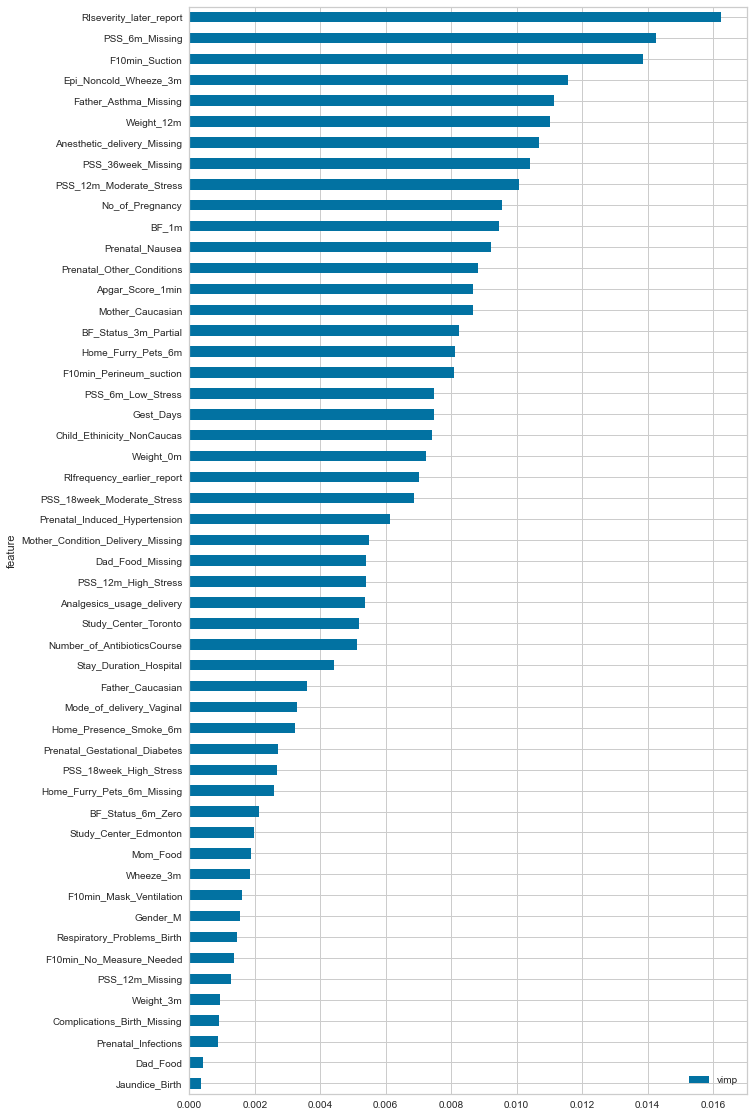

<IPython.core.display.Javascript object>

In [121]:
fig, ax = plt.subplots(figsize=(10, 20))
mic_df = (
    pd.DataFrame({"feature": X.columns, "vimp": mic})
    .set_index("feature")
    .sort_values(by="vimp", ascending=True)
)
mic_df[mic_df.vimp > 0].shape[0]
mic_df[mic_df.vimp > 0].plot.barh(ax=ax)
mic_df[mic_df.vimp == 0].index.values

In [122]:
X[mic_df.tail(8).index]

,PSS_36week_Missing,Anesthetic_delivery_Missing,Weight_12m,Father_Asthma_Missing,Epi_Noncold_Wheeze_3m,F10min_Suction,PSS_6m_Missing,RIseverity_later_report
,,,,,,,,
20059,0,0.0,9.34,0.0,0.0,0,0,0.3
20061,0,0.0,9.30,0.0,0.0,0,0,0.8
20062,0,0.0,8.18,0.0,0.0,0,0,0.3
20063,0,0.0,10.18,0.0,0.0,0,0,0.0
20064,0,0.0,9.45,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...
50859,0,0.0,8.50,0.0,0.0,0,0,0.3
50860,0,0.0,8.20,0.0,0.0,0,0,0.0
50862,0,0.0,9.70,0.0,0.0,0,0,0.8


<IPython.core.display.Javascript object>

In [90]:
# Feature Selection (2) Recursive Feature Elimination

<IPython.core.display.Javascript object>

In [95]:
from yellowbrick.features import RFECV

<IPython.core.display.Javascript object>

In [94]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

<IPython.core.display.Javascript object>

In [96]:
rfecv = RFECV(RandomForestClassifier(n_estimators=100), cv=4)

<IPython.core.display.Javascript object>

In [102]:
rfecv.fit(X[mic_df.tail(8).index], y)

RFECV(ax=<AxesSubplot:>, cv=4, estimator=RandomForestClassifier())

<IPython.core.display.Javascript object>

In [113]:
# fig, ax = plt.subplots(figsize=(12, 8))
# rfecv.poof()
# rfecv.show()
# plt.show()

<IPython.core.display.Javascript object>

RFECV(ax=<AxesSubplot:>,
      cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='average_precision')

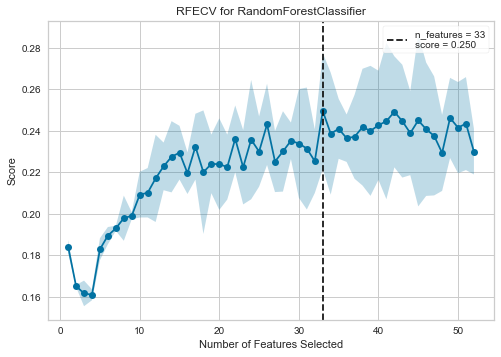

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

<IPython.core.display.Javascript object>

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import RFECV
from yellowbrick.datasets import load_credit

# Load classification dataset
X = X1[mic_df.tail(52).index]

cv = StratifiedKFold(2)
# visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring="average_precision")
visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring="average_precision")

visualizer.fit(X, y)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

RFECV(ax=<AxesSubplot:>,
      cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='precision_weighted')

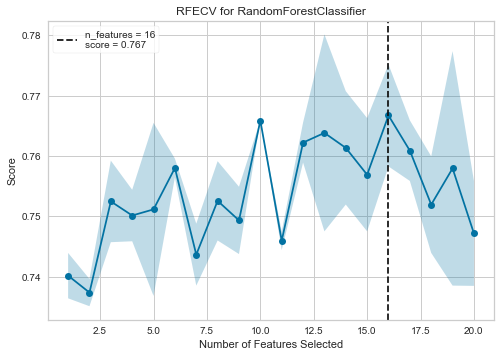

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

<IPython.core.display.Javascript object>

In [131]:
# Load classification dataset
X = X1[mic_df.tail(20).index]

cv = StratifiedKFold(2)
# visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring="average_precision")
visualizer1 = RFECV(RandomForestClassifier(), cv=cv, scoring="precision_weighted")

visualizer1.fit(X, y)  # Fit the data to the visualizer
visualizer1.show()  # Finalize and render the figure

RFECV(ax=<AxesSubplot:>,
      cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='roc_auc')

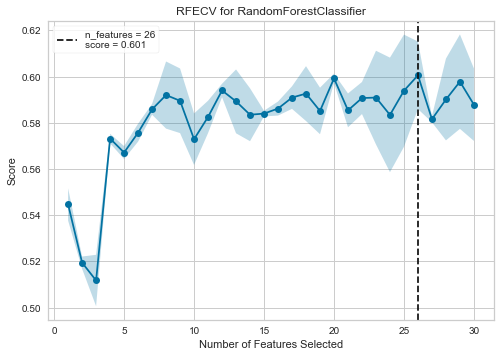

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

<IPython.core.display.Javascript object>

In [133]:
# Load classification dataset
X = X1[mic_df.tail(30).index]

cv = StratifiedKFold(2)
# visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring="average_precision")
visualizer2 = RFECV(RandomForestClassifier(), cv=cv, scoring="roc_auc")

visualizer2.fit(X, y)  # Fit the data to the visualizer
visualizer2.show()  # Finalize and render the figure

RFECV(ax=<AxesSubplot:>,
      cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(), scoring='roc_auc')

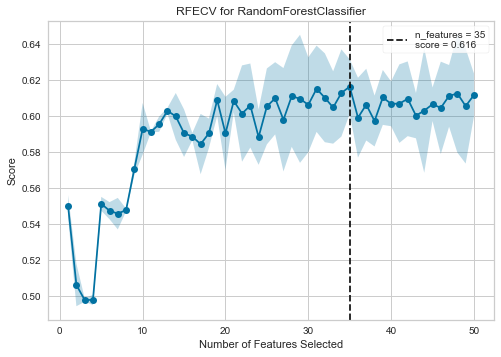

<AxesSubplot:title={'center':'RFECV for RandomForestClassifier'}, xlabel='Number of Features Selected', ylabel='Score'>

<IPython.core.display.Javascript object>

In [134]:
# Load classification dataset
X = X1[mic_df.tail(50).index]

cv = StratifiedKFold(2)
# visualizer = RFECV(RandomForestClassifier(), cv=cv, scoring="average_precision")
visualizer3 = RFECV(RandomForestClassifier(), cv=cv, scoring="roc_auc")

visualizer3.fit(X, y)  # Fit the data to the visualizer
visualizer3.show()  # Finalize and render the figure

In [138]:
visualizer3.n_features_
visualizer3.ranking_
visualizer3.support_

35

array([15,  4,  1,  1,  1,  2,  1, 13,  1, 11,  1,  1,  1,  8,  5,  1,  1,
        1,  1,  1,  1,  1, 16,  1,  6, 12,  1,  1,  1,  1,  1,  1, 14,  1,
        1,  1,  1,  1,  1,  9,  1,  1,  7, 10,  1,  3,  1,  1,  1,  1])

array([False, False,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True,  True])

<IPython.core.display.Javascript object>

In [144]:
X1[mic_df.tail(50).index].columns

pd.DataFrame(
    data=visualizer3.ranking_,
    index=X1[mic_df.tail(50).index].columns,
    columns=["ranking"],
).sort_values(by="ranking")

Index(['Prenatal_Infections', 'Complications_Birth_Missing', 'Weight_3m',
       'PSS_12m_Missing', 'F10min_No_Measure_Needed',
       'Respiratory_Problems_Birth', 'Gender_M', 'F10min_Mask_Ventilation',
       'Wheeze_3m', 'Mom_Food', 'Study_Center_Edmonton', 'BF_Status_6m_Zero',
       'Home_Furry_Pets_6m_Missing', 'PSS_18week_High_Stress',
       'Prenatal_Gestational_Diabetes', 'Home_Presence_Smoke_6m',
       'Mode_of_delivery_Vaginal', 'Father_Caucasian',
       'Stay_Duration_Hospital', 'Number_of_AntibioticsCourse',
       'Study_Center_Toronto', 'Analgesics_usage_delivery',
       'PSS_12m_High_Stress', 'Dad_Food_Missing',
       'Mother_Condition_Delivery_Missing', 'Prenatal_Induced_Hypertension',
       'PSS_18week_Moderate_Stress', 'RIfrequency_earlier_report', 'Weight_0m',
       'Child_Ethinicity_NonCaucas', 'Gest_Days', 'PSS_6m_Low_Stress',
       'F10min_Perineum_suction', 'Home_Furry_Pets_6m', 'BF_Status_3m_Partial',
       'Mother_Caucasian', 'Apgar_Score_1min', 'Pren

,ranking
RIseverity_later_report,1
Analgesics_usage_delivery,1
Weight_12m,1
Dad_Food_Missing,1
PSS_6m_Missing,1
PSS_12m_Moderate_Stress,1
PSS_18week_Moderate_Stress,1
RIfrequency_earlier_report,1
Study_Center_Toronto,1
Weight_0m,1


<IPython.core.display.Javascript object>

In [2]:
df_for_ml

NameError: name 'df_for_ml' is not defined

In [74]:
cols_to_inspect = X.columns

top_percentage = {}
for i in X[cols_to_inspect].columns:
    top_percentage[i] = round((X[i].value_counts(normalize=True).values[0] * 100), 2)
per_ser = pd.Series(top_percentage)

df_overview = (
    pd.concat(
        [
            X[cols_to_inspect].nunique(),
            X[cols_to_inspect].mean(),
            per_ser,
            X[cols_to_inspect].max(),
            X[cols_to_inspect].sum(),
        ],
        axis=1,
    )
    .rename(
        columns={
            0: "Num_Unique_Values",
            1: "Mean_Value",
            2: "Top_Percentage",
            3: "Max_Value",
            4: "Sum",
        }
    )
    .sort_values(by="Top_Percentage", ascending=False)
)

df_overview[df_overview.Max_Value > 1].index
# df_overview.loc[df_overview.index.str.contains("Missing")]

df_overview

Index(['Epi_Noncold_Wheeze_3m', 'Apgar_Score_5min',
       'Number_of_AntibioticsCourse', 'Apgar_Score_1min',
       'Mother_Condition_Delivery', 'RIfrequency_earlier_report',
       'Stay_Duration_Hospital', 'No_of_Pregnancy',
       'RIseverity_earlier_report', 'RIfrequency_later_report',
       'RIseverity_later_report', 'BF_Implied_Duration', 'Gest_Days',
       'Weight_12m', 'Weight_3m', 'Weight_0m'],
      dtype='object')

,Num_Unique_Values,Mean_Value,Top_Percentage,Max_Value,Sum
Prenatal_Hypotension,2,0.002041,99.80,1.000,5.0000
Prenatal_Cardiac_Disorder,2,0.003673,99.63,1.000,9.0000
F10min_Oxygen_Mask,2,0.009796,99.02,1.000,24.0000
F10min_Intubation,2,0.015918,98.41,1.000,39.0000
F10min_Perineum_suction,2,0.016327,98.37,1.000,40.0000
...,...,...,...,...,...
BF_Implied_Duration,55,11.096531,9.88,30.000,27186.5000
Gest_Days,62,276.963918,7.76,300.000,678561.6000
Weight_12m,151,9.808390,3.59,15.100,24030.5560
Weight_3m,505,6.458138,1.88,10.840,15822.4380


<IPython.core.display.Javascript object>

In [ ]:
df_for_ml.loc[:, df_for_ml.var() < 0.01]
# df_for_ml.Apgar_Score_1min.value_counts()
df_overview.sort_values("Sum")

In [ ]:
df_for_ml[df_for_ml.F10min_Intubation == 1].y.value_counts(normalize=True)

In [ ]:
np.expm1(2.302585092994046)

In [ ]:
df_for_ml.loc[1295, :].to_dict()

In [ ]:
X, y, df_for_ml

In [1]:
# sys.modules["sklearn.neighbors._base"] = sklearn.neighbors._base

from sklearn.feature_selection import mutual_info_classif

In [ ]:
X_backup = X.copy()
y_backup = y.copy()
df_backup = df_for_ml.copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, stratify=y, random_state=1014
)

In [ ]:
# Lasso Analysis for feature selection
y_train.value_counts()
y_test.value_counts()

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold

In [ ]:
skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1014)

In [ ]:
import warnings

warnings.filterwarnings("ignore")
model = linear_model.LassoLarsCV(cv=skf).fit(X_train, y_train)

In [ ]:
X.columns

In [ ]:
X.shape[1]
plt.get_cmap("tab20")(np.linspace(0, 1, 8))

In [ ]:
for i in range(8, 10):
    i

for i in range(3):
    i

X.columns[:8]
X.columns[8:10]

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
columns_of_total = X.shape[1]
start = 30
end = 50
number_of_display = end - start

cm = iter(plt.get_cmap("Set1")(np.linspace(0, 1, number_of_display)))
for i in range(start, end):
    c = next(cm)
    _ = ax.plot(
        model.alphas_, model.coef_path_.T[:, i], c=c, alpha=0.8, label=X.columns[i]
    )

ax.legend(X.columns[start:end], bbox_to_anchor=(1, 1))
# ax.axvline(model.alpha_, linestyle="-", c="k", label="alphaCV")

In [ ]:
model.coef_path_.T.shape
model.alphas_

In [ ]:
Lasso_df = pd.DataFrame(data=model.coef_path_.T, columns=X.columns, index=model.alphas_)
Lasso_df.sum()[Lasso_df.sum() > 0].sort_values().index

In [ ]:
# show_value_dist(X.select_dtypes(include=["object", "category"]), display_top=5)
# X.select_dtypes(exclude=["object", "category"]).shape[1]
# X.CSED_36week.isna().sum()
# X.CSED_36week.astype("category")
# X.CSED_36week.fillna(X.CSED_36week.mode()).value_counts()
# X.CSED_36week.fillna("Missing").value_counts()
# X.CSED_36week.cat.set_categories("")
# X.CSED_36week.cat.categories.to_list() + ["Missing"]
# list(X.Child_Ethinicity.unique()) + ["Missing"]
# X.BF_Status_6m.astype("category").value_counts(dropna=False) #Missingness can be kept during astype()
# X.CSED_36week.cat.set_categories(X.CSED_36week.cat.categories.to_list() + ["Missing"])
# X.CSED_36week.cat.as_unordered()
# X.CSED_36week.cat.add_categories("Missing").cat.as_unordered()
# pd.get_dummies(X[["CSED_36week"]], dummy_na=True).values
# ohe = OneHotEncoder()
# ohe.fit(X[["CSED_36week"]])
# ohe.fit_transform(X[["CSED_36week"]]).toarray()
# ohe.get_feature_names(["CSED_36week"])
# mode_value = X.CSED_36week.mode().values
# str(mode_value)
# type(X.CSED_36week.mode())
# X.CSED_36week.value_counts().index[0]
# for i, j in it.items():
#     print(i, j)

# pd.get_dummies(X[["CSED_36week"]], dummy_na=False, drop_first=)

# X.CSED_36week.astype("category").cat.as_unordered()
# X.CSED_36week.astype("category").cat.as_unordered().cat.add_categories("Missing")
# X.CSED_36week.astype("object")
# X.BF_Status_6m.astype("object").fillna("Missing").value_counts()
# X.BF_Status_6m.fillna(value="", inplace=True)

In [ ]:
X = X_engi_backup.copy()

In [ ]:
X.isna().sum(axis=1).sort_values(ascending=False).head(8).index
X[X.BF_Status_3m.isna()]
y[1035]
y[95]
y[X.isna().sum(axis=1).sort_values(ascending=False).head(8).index]
X.iloc[X.isna().sum(axis=1).sort_values(ascending=False).head(8).index, :]
X.PSS_6m.isna().mean()

In [ ]:
df_1 = pd.concat([X, y], axis=1).copy()
# df_1.PSS_6m.value_counts(dropna=False)
df_1.y.value_counts(normalize=False)

# df_1[df_1.PSS_6m.isna()].y.value_counts(normalize=False)
# df_1[df_1.PSS_12m.isna()].y.value_counts(normalize=True)
# df_1[df_1.PSS_36week.isna()].y.value_counts(normalize=False)
# df_1[df_1.PSS_18week.isna()].y.value_counts(normalize=True)
df_targeted.PSS_6m.value_counts(dropna=False, normalize=False)
df_1[df_1.y == 1].PSS_6m.value_counts(dropna=False, normalize=False)
# print("12m Missingness:\n", df_1[df_1.PSS_12m.isna()].y.value_counts(normalize=True))
# print(
#     "12m Larger than 27:\n",
#     df_1[(df_1.PSS_12m > 18) & (df_1.PSS_12m <= 27)].y.value_counts(normalize=True),
# )
# # df_1.PSS_6m.value_counts()
# df_1[df_1.PSS_36week >= 27].y.value_counts(normalize=True)
# df_1[df_1.PSS_18week >= 27].y.value_counts(normalize=True)
# df_1[(df_1.PSS_18week > 13) & (df_1.PSS_18week < 27)].y.value_counts(normalize=True)
# df_1[df_1.PSS_18week <= 13].y.value_counts(normalize=True)
# df_1[df_1.RIseverity_earlier_report >= 0.7].y.value_counts(normalize=True)

In [ ]:
X[set(CAT_VARS_REPO) - set(SUB_CAT_RESP)].select_dtypes(include="object")

In [ ]:

missing_X_ser = X.isna().sum().sort_values(ascending=False)
missing_X_percentage = X.isna().mean().sort_values(ascending=False)

In [ ]:
corr_threshold = 0.3
corr_list_high = []
corr_dict_high = {}

for i, col in enumerate(corr_X_df.columns[:3]):
    corr_list_high.extend(
        corr_X_df[col][i:][corr_X_df[col][i:] > corr_threshold].index[1:]
    )
    corr_X_df[col][i:][corr_X_df[col][i:] > corr_threshold]
    

corr_list_high


In [ ]:
repetition_standard = 0.9
repetition_drop = []
repetition_dict = {}

for i, col in enumerate(corr_X_df.columns):
    for i_name in corr_X_df[col].index[i + 1 :]:
        if corr_X_df[col][i_name] > repetition_standard:
            repetition_drop.extend([i_name])
            repetition_dict[" <> ".join([i_name, corr_X_df[col].name])] = corr_X_df[
                col
            ][i_name]


corr_threshold = 0.6
corr_X_df = X.corr()
corr_list_high = []
corr_dict_high = {}

for i, col in enumerate(corr_X_df.columns):
    for i_name in corr_X_df[col].index[i + 1 :]:
        if corr_X_df[col][i_name] > corr_threshold:
            corr_list_high.extend([i_name])
            corr_dict_high[" <> ".join([i_name, corr_X_df[col].name])] = corr_X_df[col][
                i_name
            ]


feature_missingness = 0.05

feature_missing_high = []
feature_missing_dict = {}

for col in X.columns:
    if X[col].isna().mean() > feature_missingness:
        feature_missing_high.append(col)
        feature_missing_dict[col] = X[col].isna().mean()


two_factor_drop = set(corr_list_high) & set(feature_missing_high)

final_drop = two_factor_drop | set(repetition_drop)

#Print out important information regarding columns selection:

print(
    "---------------------------------------------------------------------------------------------------"
)
print(
    f"Given the correlation threshhold of {repetition_standard}, the columns that will be removed are:{list(set(repetition_drop))}. Please see the following correlation:{repetition_dict}"
)

print(
    "---------------------------------------------------------------------------------------------------"
)
print(
    f"Given the correlation threshhold of {corr_threshold}, the columns that will be considered to be dropped are:{list(set(corr_list_high))}. Please see the following correlation:{corr_dict_high}"
)
print(
    "---------------------------------------------------------------------------------------------------"
)
print(
    f"Given the missingness threshhold of {feature_missingness}, the columns that will be considered to be dropped are:  {feature_missing_high}. Please see the following missingness:{feature_missing_dict}"
)
print(
    "---------------------------------------------------------------------------------------------------"
)
print(
    f"The finalized dropped columns are {sorted(final_drop)} with two factor dropped columns {two_factor_drop} and repetition dropped {repetition_drop}"
)



In [ ]:
X.isna().sum().sort_values(ascending=False).head(30)
X.isna().sum(axis=1).sort_values(ascending=False).head(5)

In [ ]:
ser_1[6:]

In [ ]:
# ser_1 = corr_X_df["Gest_Days"][:4]

corr_list_high = []
corr_dict_high = {}

# for i, j in enumerate(ser_1):
#     if j > 0.5:
#         corr_list_high.extend(i)
#         corr_dict_high["-".join(i, ser_1.name)] = j

for i in ser_1.index[1:]:
    if ser_1[i] > 0.1:
        print(i)
        corr_list_high.extend([i])
        corr_dict_high[" <> ".join([i, ser_1.name])] = ser_1[i]

corr_list_high
corr_dict_high

In [ ]:
X_engi_backup

In [ ]:
df_corr = X.corr()

col_corr = []

for i,j in 

In [ ]:
# X.isna().sum().sort_values().tail(20)
df[df.y == 1].isna().mean().sort_values().tail(10)

df.isna().mean().sort_values().tail(10)

In [ ]:
columns_to_drop = []


columns_to_drop.append(
    X.corr()
    .Dad_Inhalant.sort_values()[:-1][X.corr().Dad_Inhalant.sort_values()[:-1] > 0.1]
    .index.to_list()
)

columns_to_drop
# X.corr().Mom_Inhalant.sort_values()
# X.corr().CSED_6m.sort_values()
# X.corr().PSS_12m.sort_values()
# X.corr().Analgesics_usage_delivery.sort_values()
# X.corr().Complications_Birth.sort_values()

In [ ]:
cols = [["a", "b"], ["c", "b"], []]
cols

In [ ]:
exlist = []
for i in cols:
    exlist.extend(i)
sorted(
    X.corr().Dad_Inhalant.sort_values()[:-1][
        X.corr().Dad_Inhalant.sort_values()[:-1] > 0.1
    ]
)
# exlist

In [ ]:
class MissingnessFilter(BaseEstimator, TransformerMixin):
    """
    Drop samples and columns based on the missingness of the rows or columns of the feature table
    
    Parameters: 
    ----------
    row_na_thresh: float between (0,1) that represent percentage, default, 0.05  
        Rows(Samples) that has more than 0.05 (5% - default) of missing value will be excluded from modelling. 
        It suggest imputation allowance for rows. The lower, the less will be imputated later on. 
    
    feature_na_thresh: float between (0,1) that represent percentage, default, 0.05
        Features(Columns) that has more than 0.05 (5% - default) of missing value will be excluded from modelling.
        It suggests imputation allowance for features. The higher, the more will be imputated later on. 
    
    features_filterable: list of features that could be eliminated due to missingness of data, default 
        Features that could be eliminated due to missingness of data, default is X.columns 
        
    Return:
    ---------
    Logified Numeric Values For Specified Columns
    """

    def __init__(
        self, row_na_thresh=0.05, feature_na_thresh=0.05, features_filterable=X.columns
    ):
        super().__init__()
        self.row_na_thresh = row_na_thresh
        self.feature_na_thresh = feature_na_thresh
        self.features_filterable = features_filterable

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        X_row_filtered = X.dropna(
            axis="index",
            thresh=X.shape[1] - X.shape[1] * self.row_na_thresh,
            subset=self.features_filterable,  # All feature list to consider filtering out samples, in combination of thresh
        ).reset_index(drop=True)

        X_colum_filtered = X_row_filtered.dropna(
            axis="columns",
            thresh=X_row_filtered.shape[0]
            - X_row_filtered.shape[0] * self.feature_na_thresh,
            subset=range(
                X_row_filtered.shape[0]
            ),  # All samples to consider, in combination of thresh
        )

        X = X_colum_filtered.copy()

        return X

#### MissingnessFilter

Drop the columns or rows with missingness greater than a threshhold (50%) for example, threshhold can be given for columns selection and for rows selection

In [ ]:
class MissingnessFilter(BaseEstimator, TransformerMixin):
    """
    Drop samples and columns based on the missingness of the rows or columns of the feature table
    
    Parameters: 
    ----------
    row_na_thresh: float between (0,1) that represent percentage, default, 0.05  
        Rows(Samples) that has more than 0.05 (5% - default) of missing value will be excluded from modelling. 
        It suggest imputation allowance for rows. The lower, the less will be imputated later on. 
    
    feature_na_thresh: float between (0,1) that represent percentage, default, 0.05
        Features(Columns) that has more than 0.05 (5% - default) of missing value will be excluded from modelling.
        It suggests imputation allowance for features. The higher, the more will be imputated later on. 
    
    features_filterable: list of features that could be eliminated due to missingness of data, default 
        Features that could be eliminated due to missingness of data, default is X.columns 
        
    Return:
    ---------
    Logified Numeric Values For Specified Columns
    """

    def __init__(
        self, row_na_thresh=0.05, feature_na_thresh=0.05, features_filterable=X.columns
    ):
        super().__init__()
        self.row_na_thresh = row_na_thresh
        self.feature_na_thresh = feature_na_thresh
        self.features_filterable = features_filterable

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        
        X_row_filtered = X.dropna(
            axis="index",
            thresh=X.shape[1] - X.shape[1] * self.row_na_thresh,
            subset=self.features_filterable,  # All feature list to consider filtering out samples, in combination of thresh
        ).reset_index(drop=True)

        X_colum_filtered = X_row_filtered.dropna(
            axis="columns",
            thresh=X_row_filtered.shape[0]
            - X_row_filtered.shape[0] * self.feature_na_thresh,
            subset=range(
                X_row_filtered.shape[0]
            ),  # All samples to consider, in combination of thresh
        )

        X = X_colum_filtered.copy()

        return X

In [ ]:
def missingfilter(
    X=X, row_na_thresh=0.05, feature_na_thresh=0.05, features_filterable=X.columns
):

    X_row_filtered = X.dropna(
        axis="index",
        thresh=X.shape[1] - X.shape[1] * row_na_thresh,
        subset=features_filterable,  # All feature list to consider filtering out samples, in combination of thresh
    ).reset_index(drop=True)

    X_colum_filtered = X_row_filtered.dropna(
        axis="columns",
        thresh=X_row_filtered.shape[0] - X_row_filtered.shape[0] * feature_na_thresh,
        subset=range(
            X_row_filtered.shape[0]
        ),  # All samples to consider, in combination of thresh
    )

    X = X_colum_filtered.copy()

    return X

In [ ]:
# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

X.shape

missingfilter().isna().mean(axis=1).sort_values(ascending=False)

In [ ]:
MissingnessFilter().fit_transform(X)
X

In [ ]:
MissingnessFilter().fit_transform(X)
X.shape

In [ ]:
# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

X

X.shape
y.shape


MissingnessFilter().fit_transform(X)

X.isna().mean().sort_values(ascending=False)
# y.shape

In [ ]:
class MissingnessFilterXY(BaseEstimator, TransformerMixin):
    """
    Drop samples and columns based on the missingness of the rows or columns of the feature table
    
    Parameters: 
    ----------
    row_na_thresh: float between (0,1) that represent percentage, default, 0.05  
        Rows(Samples) that has 0.05 (5% - default) of missing value will be excluded from modelling. 
        It suggest imputation allowance for rows. The lower, the less will be imputated later on. 
    
    feature_na_thresh: float between (0,1) that represent percentage, default, 0.05
        Features(Columns) that has 0.05 (5% - default) of missing value will be excluded from modelling.
        It suggests imputation allowance for features. The higher, the more will be imputated later on. 
    
    features_filterable: list of features that could be eliminated due to missingness of data, default 
        Features that could be eliminated due to missingness of data, default is X.columns 
        
    Return:
    ---------
    Logified Numeric Values For Specified Columns
    """

    def __init__(
        self, row_na_thresh=0.05, feature_na_thresh=0.05, features_filterable=X.columns
    ):
        #         super().__init__()
        self.row_na_thresh = row_na_thresh
        self.feature_na_thresh = feature_na_thresh
        self.features_filterable = features_filterable

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):

        #         X = pd.concat([X, y], axis=1).copy()

        #         print(X.columns.values[-3:])

        X_row_filtered = X.dropna(
            axis="index",
            thresh=X.shape[1] - X.shape[1] * self.row_na_thresh,
            subset=self.features_filterable,  # All feature list to consider filtering out samples, in combination of thresh
        ).reset_index(drop=True)

        X_colum_filtered = X_row_filtered.dropna(
            axis="columns",
            thresh=X_row_filtered.shape[0]
            - X_row_filtered.shape[0] * self.feature_na_thresh,
            subset=range(
                X_row_filtered.shape[0]
            ),  # All samples to consider, in combination of thresh
        )

        #         X = X_colum_filtered.drop(columns="y").copy()
        #         y = X_colum_filtered["y"].copy()
        #         print(X.shape)
        #         print(y.shape)

        X = X_colum_filtered.copy()
        return X

In [ ]:
# Restore
df = df_shrinked.copy()
X = X_s.copy()
y = y_s.copy()

X.shape
y.shape


MissingnessFilterXY().fit_transform(X)

X.shape
y.shape


In [ ]:
AdoptedFeatureSelector().fit_transform(X.copy())

In [ ]:
X2 = X[SUB_CAT_RESP].copy()
X2.tail(5)
RespiratoryTransformer().fit_transform(X2).isna().sum()

In [ ]:
X = X_backup.copy()
y = y_backup.copy()
# X[SUB_NUM_LOG1P]
# SUB_NUM_LOG1P[1:]
# Log1pTransformer(cols=SUB_NUM_LOG1P[1:]).fit_transform(X)
# X[SUB_NUM_LOG1P]

In [ ]:
X.Number_of_AntibioticsCourse.value_counts(dropna=False)

In [ ]:
l1p = Log1pTransformer()
X1 = X[SUB_NUM_LOG1P].copy()
l1p.fit_transform(X1).Number_of_AntibioticsCourse.value_counts(dropna=False)

In [ ]:
X[SUB_NUM_LOG1P]

In [ ]:
birthtrans = BirthTransformer()
birthtrans.fit_transform(X)

In [ ]:
for col in SUB_CAT_ENGI:
    X[col].value_counts(dropna=False)

In [ ]:
X.Apgar_Score_1min.value_counts(dropna=False)
apgar = ApgarOrdinalTransformer()
apgar.fit_transform(X)
X.Apgar_Score_1min.value_counts(dropna=False)

In [ ]:
res = TargetSelector(
    df=df_child,
    target_name="Asthma_Diagnosis_5yCLA",
    target_mapping={2: 1},
    include_dust=True,
)

res[0]

In [ ]:
set(df_child.columns.values) - set(
    TARGET_VAR_REPO + NUM_VARS_REPO + CAT_VARS_REPO + FEA_TO_DROP
)

In [ ]:
len(df_child.columns)
len(df_child[NUM_VARS_REPO + CAT_VARS_REPO].drop(columns=SUB_NUM_HOMEDUST).columns)

In [ ]:
for coln in NUM_VARS_REPO[:2]:
    #    .value_counts(dropna=False)
    df_child[coln].to_numeric()

In [ ]:
Target could not be buil

In [ ]:
class TargetTransformer(BaseEstimator, TransformerMixin):
    '''Define your target variable, and cast adopted features to object(string) or numeric(float) to preprocess.
    
    Parameters:
    -----------------
    target_name : str,  default 'Asthma_Diagnosis_5yCLA'
        A string that is selected from TARGET_VAR_REPO list to control the entire dataframe to be processed
    
    target_mapping : dictionary, default {2:1} that is suggesting possible asthma(2) will be treated as asthma(0)  
        A dictionary used to specify how to map the "possible", or, or other variables 
    
    include_dust : boolean, default is False 
        A boolean for certain attribute selection that will drastically reduce sample size for analysis
    
    Returns:
    ----------------
    Overal X,y processed for model building
    '''
    def __init__(self, target_name='Asthma_Diagnosis_5yCLA', target_mapping= {2:1}, include_dust = False):
    self.target_name = target_name
    self.target_mapping = target_mapping
    self.include_dust = include_dust
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        
        
        names = []
        distances = []
        populations = []
        for idx, row in X.iterrows():
            coordinates = (row['latitude'], row['longitude'])
            n, d = closest_point(coordinates)
            p = tz_pop_above100k[tz_pop_above100k.city == n].population_2021.values[0]
            names.append(n)
            distances.append(d)
            populations.append(p)
        X['nearest_big_city_name'] = names
        X['nearest_big_city_distance'] = distances
        X['nearest_big_city_population'] = populations
        return self


In [ ]:
df_child[SUB_CAT_ENGI]

In [ ]:
def get_data_attrs_names(data):
    """Get the categorical inputs and numerical inputs and output column names.
     We use the dtype of the data to decide between numerical and categorical attribut
     
     arguements:
     data -- pandas dataframe.
     
     return:
     a dict with the following keys and values
     y: list of of the target attribute
     X_cat: list of categorical inputs i.e dtype == object
     X_num: list of numerical inputs i.e dtype != object 
     X: list of the combied {X_num, X_cat} inputs
    """
        
    all_attribs = list(data.columns.values)
    target_attrib = ['y']

    # seperate out output column
    y = data[target_attrib]
    print("\n\nsample of 'target i.e output attributes'")
    print(y.head())

    data_cat = data.select_dtypes(include=['object']).copy()
    data_cat = data_cat.drop(target_attrib[0], axis=1)
    cat_attribs = list(data_cat.columns.values)
    print("\n\n'sample of categorical attribute and output attributes'")
    print(data_cat.head())

    # sep out continous aka scale columns
    data_scale = data.select_dtypes(include=[np.number]).copy()
    num_attribs = list(data_scale.columns.values)
    print("\n\n'sample of continous (scale) attributes'")
    print(data_scale.head())

    # col_X contains all the predictors
    X_attribs = list(all_attribs) # copy all cols names
    X_attribs.remove(target_attrib[0])

    res = {
        'y': target_attrib,
        'X_cat': cat_attribs,
        'X_num': num_attribs,
        'X': X_attribs
    }
    return res
    

    
attrs_map = get_data_attrs_names(data_raw)   
print("\n\n names of the attributes splited according to type\n")
print(attrs_map)

In [ ]:
len(FEA_TO_DROP)

In [ ]:
WHEEZE_REPO

In [ ]:
for col in df_child.columns[50:]:
    df_child[col].value_counts(dropna=False)

In [ ]:
df_child.columns.values

In [ ]:
#
# df_ethnicity.isna().sum()
df_child.Wheeze_Traj_Type.value_counts(dropna=False)

df_child[df_child.Wheeze_Traj_Type == 3][TARGET_VAR_REPO].head(30)

In [ ]:
df_child[["BF_3m", "BF_Status_3m"]]

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
for col in df_child.columns[30:]:
    df_child[col].value_counts(dropna=False)

In [ ]:
df_child.columns[df_child.columns.str.contains("5yCLA")]

In [ ]:
df_child.groupby("Anesthetic_delivery").No_of_Pregnancy.mean()

In [ ]:
FREQ_CAT = ['No_of_Pregnancy','Stay_Duration_Hospital','Number_of_AntibioticsCourse',]

class 

In [ ]:
np.log1p(df_child.No_of_Pregnancy).value_counts(dropna=False)

In [ ]:
df_child.Medicine_for_Wheeze_5yCLA.value_counts(dropna=False)

In [ ]:
df_child[df_child.Antibiotics_Usage == 1].Asthma_Diagnosis_5yCLA.value_counts(
    dropna=False
)


df_child[df_child.Home_DEHP_3m.notna()].Asthma_Diagnosis_5yCLA.value_counts(
    dropna=False
)

In [ ]:
df_temp = df_child[df_child.Antibiotics_Usage == 1]
import seaborn as sns

sns.distplot(df_temp.Time_of_AntibioticsUsage)

In [ ]:
df_child.isna().mean()[df_child.isna().mean() > 0.25]

In [ ]:
df_child.iloc[
    df_child.isna()
    .mean(axis="columns")[df_child.isna().mean(axis="columns") > 0.25]
    .index,
    :,
].Asthma_Diagnosis_5yCLA.value_counts(dropna=False)

In [ ]:
df_child.columns[df_child.columns.str.contains("Asthma_")]
df_child.columns[df_child.columns.str.contains("Wheeze_")]

df_child.columns[df_child.columns.str.contains("F10min_")]
df_child.columns[df_child.columns.str.contains("Prenatal_")]

df_child.columns[df_child.columns.str.contains("BF_")]

## Dataset <a id='data'></a>

### Dataset Repository <a id='repo'></a>
Overview the dataset in an organized way given its directory path

In [ ]:
def data_repo_review(path='/Users/local'):
    '''
    Function: Overview the dataset repo in an organized way
    Input: directory for all existing data
    Output: dataframe and one image called "Current_Repo_Overview.png"
    Date: 2021-09-17 By Stan He@Sickkids
    '''
    data_received = os.listdir(path)
    
    #Overview the files in different time points
    files = pd.DataFrame(data_received,columns=['Files'])
    datafiles = files[files.Files.str.contains('xlsx')].reset_index(drop=True)
    
    #Extract Time Point from file names
    index_values = []
    for i in datafiles.index.values:
        if datafiles.Files[i].startswith(tuple([str(i) for i in np.arange(10)])):
            index_values.append(' '.join(datafiles.Files[i].lower().split()[:2]))
        elif datafiles.Files[i].startswith(('Prenatal','prenatal')):
            index_values.append('Prenatal')
        elif datafiles.Files[i].startswith(('Birth')):
            index_values.append('Birth')
        else:
            index_values.append('Other')
    datafiles['Time_Point'] = index_values
    
    #Prepare for dataset overview plot
    datafiles.sort_values(by='Time_Point').reset_index(drop=True,inplace=True)
    data_repo = datafiles.groupby('Time_Point').agg(lambda x: list(x))
#     data_repo.dfi.export('Current_Repo_Overview.png')
#    print(tabulate(data_repo, headers='keys',tablefmt='fancy_grid'))
    
    return data_repo

In [ ]:
data_repo_review(path)

### Dataset Selection  <a id='datasetselect'></a>
Select the most relevant tabularset data to build model upon

In [ ]:
def data_selection(path='/Users/',df=None):
    '''
    Function: Make a selection for the questionnaires info to be considered
    Input: Path to the repo directory
    Output: Dictionary of DataFrame to preprocess, Dictionary of Variables to Select and Rename
    Date: 2021-09-17 By Stan He@Sickkids
    '''    
    #Overview the files from exisitng data repo in an organized way
    print(tabulate(df, headers=(),tablefmt='psql'))
    
    #Specify Feature Dataset
    
    #Birth Profiling
    features_of_birth = []
    features_of_birth.append(path + 'Birth Q107CBIRTHCD.xlsx')
    features_of_birth.append('Birth Profiling')
    
    #Early Anthropometrics & Disease Record
    features_of_anthrop = []
    features_of_anthrop.append(path + 'Anthropometrics and sex.xlsx')
    features_of_anthrop.append('Early Anthropometrics & Disease Record')
    
    features_of_wheeze = []
    features_of_wheeze.append(path + 'Wheeze derived variables.xlsx')
    features_of_wheeze.append('Early Anthropometrics & Disease Record')
    
    features_of_respiratory = []
    features_of_respiratory.append(path + 'Respiratory infections type and severity.xlsx')
    features_of_respiratory.append('Early Anthropometrics & Disease Record')
    
    #Genetic
    
    features_of_parental_spt = [0]
    features_of_parental_spt[0] = path + 'Parental SPT.xlsx'
    features_of_parental_spt.append('Genetic')
    
    features_of_parental_asthma = [0]
    features_of_parental_asthma[0] = path + 'Parental history Asthma.xlsx'
    features_of_parental_asthma.append('Genetic')
    
    #Environmental
    features_of_breastfeeding = [0]
    features_of_breastfeeding[0] = path + 'Breastfeeding variables.xlsx'
    features_of_breastfeeding.append('Environmental')
    
    features_of_maternal_stress = [0]
    features_of_maternal_stress[0] = path + 'Maternal PSS CESD scores.xlsx'
    features_of_maternal_stress.append('Environmental')
    
    features_of_antibiotic = [0]
    features_of_antibiotic[0] = path + 'antibiotics first year of life.xlsx'
    features_of_antibiotic.append('Environmental')
    
    features_of_smoke = [0]
    features_of_smoke[0] = path + 'Prenatal smoke exposure.xlsx'
    features_of_smoke.append('Environmental')
    
    features_of_home = [0]
    features_of_home[0] = path + '6 Month Q165HENV6M.xlsx'
    features_of_home.append('Environmental')
    
    features_of_dust = [0]
    features_of_dust[0] = path + 'Dust Pthalates 3m.xlsx'
    features_of_dust.append('Environmental')

    #Specify Target Dataset
    
    #Consistent Variable, Inconsistent Variable
    target_of_5y = [0]
    target_of_5y[0] = path + '5 year Q454CHCLA5Y.xlsx'
    target_of_5y.append('Target at 5y')
    
    target_of_3y = [0]
    target_of_3y[0] = path + '3 year Q378CHCLA3Y.xlsx'
    target_of_3y.append('Target at 3y')
    
    #Recurrent Wheeze at 3y and 5y
    target_of_recwheeze = []
    target_of_recwheeze.append(path + 'Wheeze derived variables.xlsx')
    target_of_recwheeze.append('Target of recurrent wheeze')


    #Define dataset dataframe from different perspectives
    data_dict = dict()
    for i in dir():
        if (i.find('features_of_') != -1) or (i.find('target_of_') != -1):
            data_dict[i] = eval(i)
            
    df_dataset = pd.DataFrame.from_dict(data_dict,orient='index',columns=['Files','Aspects']).sort_values(by='Aspects')
       
    return df_dataset[['Aspects','Files']]

In [ ]:
data_selection('')

### Variables Selection  <a id='variables'></a>
Variables Selection, Rename, Replace, Merge, Overview

In [ ]:
def feature_selection(path='/Users/stan/',df=None):
    '''
    Function: 
    (1) Make a selection for the variables from all the dataset selected above info to be considered
    (2) Rename the original questionnaire columns to corresponding descriptive names
    (3) Merge all datasets of different excels into one large dataframe
    Input: Path to the repo directory
    Output: Dictionary of DataFrame to preprocess, Dataframe of Features to Select and Rename for corresponding dataset
    Date: 2021-09-20 By Stan He@Sickkids
    '''    
    #Pretty print the dataframe for exisitng data repo
    print(tabulate(df, headers=(),tablefmt='psql'))
    
    #Create a new xlsx due to the unique format of 'Respiratory infections type and severity.xlsx'
    pd.read_excel(path+'Respiratory infections type and severity.xlsx')\
    .groupby('subjectnumber').agg(lambda x:list(x)).reset_index(drop=False)\
    .to_excel(path+'Respiratory infections type and severity1.xlsx',index=False)
    
    
    #Create a new xlsx to remove those who has already withdraw from study at birth
    temp = pd.read_excel(path+'Birth Q107CBIRTHCD.xlsx')
    temp[temp.StudyStatus != 'Withdrawn'].to_excel(path+'Birth Q107CBIRTHCD no withdraw.xlsx',index=False)
    
    #Specify Feature Dataset
    
    #Birth Profiling
    features_of_birth = path + 'Birth Q107CBIRTHCD no withdraw.xlsx'
    variables_of_birth = {'SubjectNumber':'Subject_Number','CBIRTHCDQ2':'Sex','CBIRTHCDQ3':'No_of_Pregnancy',
                          'CBIRTHCDQ9':'Anesthetic_delivery','CBIRTHCDQ10':'Analgesics_usage_delivery',
                          'CBIRTHCDQ12':'Mode_of_delivery','CBIRTHCDQ24':'Apgar_Score_1min','CBIRTHCDQ25':'Apgar_Score_5min',
                          'CBIRTHCDQ35':'Respiratory_Problems_Birth','CBIRTHCDQ36':'Jaundice_Birth','CBIRTHCDQ38':'Complications_Birth',
                          'CBIRTHCDQ39':'Stay_Duration_Hospital','StudyCenter':'Study_Center',
                         'CBIRTHCDQ8a':'Prenatal_Bleeding','CBIRTHCDQ8b':'Prenatal_Nausea','CBIRTHCDQ8c':'Prenatal_Infections',
                         'CBIRTHCDQ8d':'Prenatal_Induced_Hypertension','CBIRTHCDQ8e':'Prenatal_Gestational_Diabetes',
                         'CBIRTHCDQ8f':'Prenatal_Cardiac_Disorder','CBIRTHCDQ8g':'Prenatal_Hypertension',
                         'CBIRTHCDQ8h':'Prenatal_Hypotension','CBIRTHCDQ8j':'Prenatal_None_Conditions','CBIRTHCDQ8k':'Prenatal_Other_Conditions',
                         'CBIRTHCDQ31a':'F10min_Intubation','CBIRTHCDQ31b':'F10min_Mask_Ventilation','CBIRTHCDQ31c':'F10min_Free_Flow_Oxygen',
                         'CBIRTHCDQ31d':'F10min_Oxygen_Mask','CBIRTHCDQ31e':'F10min_Positive_Pressure_Ventilation',
                         'CBIRTHCDQ31f':'F10min_Perineum_suction','CBIRTHCDQ31g':'F10min_Suction','CBIRTHCDQ31i':'F10min_No_Measure_Needed'}
    
    #Early Disease/Anthrop 
    
    features_of_wheeze = path + 'Wheeze derived variables.xlsx'
    variables_of_wheeze = {'subjectnumber':'Subject_Number', 
                           'wheeze3m':'Wheeze_3m', 'nocoldwheeze3m':'Noncold_Wheeze_3m','nocoldwheezeepi3m':'Epi_Noncold_Wheeze_3m', 
                           'wheeze6m':'Wheeze_6m', 'nocoldwheeze6m':'Noncold_Wheeze_6m','nocoldwheezeepi6m':'Epi_Noncold_Wheeze_6m', 
                           'wheeze1y':'Wheeze_1y', 'nocoldwheeze1y':'Noncold_Wheeze_1y','nocoldwheezeepi1y':'Epi_Noncold_Wheeze_1y', 
                           'wheeze18m':'Wheeze_18m', 'nocoldwheeze18m':'Noncold_Wheeze_18m','nocoldwheezeepi18m':'Epi_Noncold_Wheeze_18m', 
                           'wheeze2y':'Wheeze_2y', 'nocoldwheeze2y':'Noncold_Wheeze_2y','nocoldwheezeepi2y':'Epi_Noncold_Wheeze_2y', 
                           'wheeze2hy':'Wheeze_2yh','nocoldwheeze2hy':'Noncold_Wheeze_2hy','nocoldwheezeepi2hy':'Epi_Noncold_Wheeze_2hy', 
                           'wheeze3y':'Wheeze_3y', 'nocoldwheeze3y':'Noncold_Wheeze_3y','nocoldwheezeepi3y':'Epi_Noncold_Wheeze_3y',
                           'wheeze4y':'Wheeze_4y', 'nocoldwheeze4y':'Noncold_Wheeze_4y','nocoldwheezeepi4y':'Epi_Noncold_Wheeze_4y',
                           'wheeze5y':'Wheeze_5y', 'nocoldwheeze5y':'Noncold_Wheeze_5y','nocoldwheezeepi5y':'Epi_Noncold_Wheeze_5y',
                           'recwheeze3y':'Recurrent_Wheeze_3y', 'recwheeze1y':'Recurrent_Wheeze_1y','recwheeze5y':'Recurrent_Wheeze_5y', 
                           'cumepi3m':'Cumulative_Wheeze_3m', 'cumepi6m':'Cumulative_Wheeze_6m', 'cumepi12m':'Cumulative_Wheeze_12m', 
                           'cumepi18m':'Cumulative_Wheeze_18m','cumepi24m':'Cumulative_Wheeze_24m', 'cumepi30m':'Cumulative_Wheeze_30m',
                           'cumepi36m':'Cumulative_Wheeze_36m', 'cumepi48m':'Cumulative_Wheeze_48m', 'cumepi60m':'Cumulative_Wheeze_60m'}
    
    
    features_of_respiratory = path + 'Respiratory infections type and severity1.xlsx' 
    variables_of_respiratory = {'subjectnumber':'Subject_Number','actual_age':'Respiratory_Report_Months',
                               'ri_type':'Respiratory_Infections','ri_sev':'Severity_of_Respiratoryinfections'}
    
    features_of_anthrop = path + 'Anthropometrics and sex.xlsx'
    variables_of_anthrop = {'subjectnumber':'Subject_Number','Sex':'Gender', 'gest_days':'Gest_Days', 'weight_0':'Weight_0m',
       'weight_3':'Weight_3m', 'weight_12':'Weight_12m', 'weight_36':'Weight_36m', 'weight_60':'Weight_60m', 
       'z_weight_age_0':'Weight_for_age_0m', 'z_weight_age_3':'Weight_for_age_3m', 'z_weight_age_12':'Weight_for_age_12m',
       'z_weight_age_36':'Weight_for_age_36m', 'z_weight_age_60':'Weight_for_age_60m'}
    
    #Genetic
    features_of_parental_spt = path + 'Parental SPT.xlsx'
    variables_of_parental_spt = {'SubjectNumber':'Subject_Number', 'dad_atopy':'Dad_Atopy', 'dad_food':'Dad_Food', 'dad_inhalant':'Dad_Inhalant',
       'mom_atopy':'Mom_Atopy', 'mom_food':'Mom_Food', 'mom_inhalant':'Mom_Inhalant'}
    
    
    features_of_parental_asthma = path + 'Parental history Asthma.xlsx'
    variables_of_parental_asthma = {'subjectnumber':'Subject_Number','Mother_Asthma':'Mother_Asthma', 'Father_Asthma':'Father_Asthma',
       'Parental_Asthma':'Parental_Asthma'}
    
    #Environmental
    features_of_breastfeeding = path + 'Breastfeeding variables.xlsx'
    variables_of_breastfeeding = {'SubjectNumber':'Subject_Number', 'BF_duration_imp':'BF_Implied_Duration', 'BF_1m':'BF_1m',
       'BF_3m':'BF_3m', 'BF_6m':'BF_6m', 'BF_9m':'BF_9m', 'BF_12m':'BF_12m', 'BF_18m':'BF_18m', 'BF_24m':'BF_24m'}
    
    features_of_maternal_stress = path + 'Maternal PSS CESD scores.xlsx'
    variables_of_maternal_stress = {'SubjectNumber':'Subject_Number', 
                                    'psssumr_pre36wk':'PSS_36week', 'csedsumr_pre36wk':'CSED_36week',
                                    'psssumr_pre18wk':'PSS_18week', 'csedsumr_pre18wk':'CSED_18week', 
                                    'psssumr_6m':'PSS_6m', 'csedsumr_6m':'CSED_6m','psssumr_12m':'PSS_12m', 'csedsumr_12m':'CSED_12m', 
                                    'psssumr_18m':'PSS_18m', 'csedsumr_18m':'CSED_18m',
                                    'psssumr_24m':'PSS_24m', 'csedsumr_24m':'CSED_24m'}
    
    features_of_antibiotic = path + 'antibiotics first year of life.xlsx'
    variables_of_antibiotic = {'subjectnumber':'Subject_Number', 'atbx_n':'Number_of_AntibioticsCourse', 
                               'atbx_time':'Time_of_AntibioticsUsage', 'atbx':'Antibiotics_Usage'}
    
    features_of_smoke = path + 'Prenatal smoke exposure.xlsx'
    variables_of_smoke = {'Subjectnumber':'Subject_Number', 'prenatal_second_hand':'Prenatal_Second_Hand',
                          'prenatal_mat_smoke':'Prenatal_Maternal_Smoke'}
    
    features_of_home = path + '6 Month Q165HENV6M.xlsx' #Request for more home environmental questionnaires
    variables_of_home = {'SubjectNumber':'Subject_Number','HENV6MQ8':'Home_Furry_Pets_6m',
                        'HENV6MQ7':'Home_New_Furnitures_6m','HENV6MQ18_4':'Percentage_OutdoorsActivity_6m',
                        'HENV6MQ20':'Home_Presence_Smoke_6m'}
    
    features_of_dust = path + 'Dust Pthalates 3m.xlsx'
    variables_of_dust = {'subjectnumber':'Subject_Number','dep_bc_rec':'Home_DEP_3m', 'dibp_bc_rec':'Home_DiBP_3m',
                         'dnbp_bc_rec':'Home_DNBP_3m','bzbp_bc_rec':'Home_BzBP_3m', 'dehp_bc_rec':'Home_DEHP_3m'}

    #Specify Target Dataset
    
    #Consistent Variable, Inconsistent Variable
    target_of_5y = path + '5 year Q454CHCLA5Y.xlsx'
    yvariables_of_5y = {'SubjectNumber':'Subject_Number','CHCLA5YQ9':'Wheeze_5yCLA',
                             'CHCLA5YQ10':'Wheeze_withoutcold_5yCLA','CHCLA5YQ12':'Medicine_for_Wheeze_5yCLA',
                             'CHCLA5YQ12_1':'Regular_Controller_5yCLA','CHCLA5YQ12_2':'Intermittent_Controller_5yCLA',
                             'CHCLA5YQ12_3':'Reliever_5yCLA','CHCLA5YQ14':'Frequency_Oral_Steroid_5yCLA',
                            'CHCLA5YQ11':'Wheeze_Frequency_5yCLA','CHCLA5YQ41':'Asthma_Diagnosis_5yCLA',
                            'CHCLA5YQ41_1':'Viral_Asthma_5yCLA','CHCLA5YQ41_2':'Triggered_Asthma_5yCLA',
                             'CHCLA5YQ46':'Medical_Conditions_5yCLA','CHCLA5YQ4_1a':'Systolic_BP_5yCLA',
                             'CHCLA5YQ4_1b':'Diastolic_BP_5yCLA','CHCLA5YQ4_2':'Pulse_Rate_5yCLA'}
    
    target_of_3y = path + '3 year Q378CHCLA3Y.xlsx'
    yvariables_of_3y = {'SubjectNumber':'Subject_Number','CHCLA3YQ4_1a':'Systolic_BP_3yCLA',
                             'CHCLA3YQ4_1b':'Diastolic_BP_3yCLA','CHCLA3YQ4_2':'Pulse_Rate_3yCLA',
                            'CHCLA3YQ8':'Wheeze_3yCLA','CHCLA3YQ31':'Asthma_Diagnosis_3yCLA',
                             'CHCLA3YQ31_1':'Viral_Asthma_3yCLA','CHCLA3YQ31_2':'Triggered_Asthma_3yCLA'}
    
    #Recurrent Wheeze at 3y and 5y
    target_of_recwheeze = path + 'Wheeze derived variables.xlsx'
    yvariables_of_recwheeze = {'subjectnumber':'Subject_Number','recwheeze3y':'Recurrent_Wheeze_3y', 
                                   'recwheeze1y':'Recurrent_Wheeze_1y','recwheeze5y':'Recurrent_Wheeze_5y'}


    #Define a dataframe dictionary for features and targets of CHILD dataset
    df_dict = dict()
    for i in dir():
        if (i.find('features_of_') != -1) or (i.find('target_of_') != -1):
            df_dict[i] = pd.read_excel(eval(i))
    
    variables_dict = dict()
    for i in dir():
        if (i.find('variables_of_') != -1) or (i.find('yvariables_of_') != -1):
            variables_dict[i] = list(eval(i).values())
    
    #Create feature selection criteria dataframe for all dataframes loaded into dataframe dictionary
    df_columns = []
    df_list = list(df_dict.keys())
    
    for i in range(len(df_list)):
        df_columns.append(list(df_dict[df_list[i]].columns.values))
        
    file_list = []
    for i in df_dict.keys():
        file_list.append(eval(i).split('/')[-1])
    
    features_dataframe_display = pd.DataFrame({'Files':file_list,'Columns':df_columns,'Features':variables_dict.values()})
    
    variables_dict = dict()
    for i in dir():
        if (i.find('variables_of_') != -1) or (i.find('yvariables_of_') != -1):
            variables_dict[i] = eval(i)
    
    features_dataframe = pd.DataFrame({'Files':file_list,'Columns':df_columns,'Features':variables_dict.values()})
    
    #Clear the df_list from name variables carrier to dataframe carrier
    df_list = []
    
    #Append renamed dataframe to dataframe list
    for i in range(len(df_dict.keys())):
        df_current = df_dict[list(df_dict.keys())[i]]
        coln = list(features_dataframe.Features[i].keys())
        rename_dict = features_dataframe.Features[i]
        df_list.append(df_current[coln].rename(columns=rename_dict))

    #Place the birth profile as the first dataframe 0,2 dataframe swap    
    df_birth = df_list[2].copy()
    df_anthrop = df_list[0].copy()
    df_list[0] = df_birth
    df_list[2] = df_anthrop

    #Create a merged dataframe for furthur engineering
    df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Subject_Number'],
                                                how='left'), df_list)    
    
    return df_dict,features_dataframe_display,df_merged

In [ ]:
feature_tuple = feature_selection(path)

In [ ]:
feature_tuple[2].Asthma_

In [ ]:
RI_df = feature_tuple[2][['Subject_Number','Respiratory_Report_Months', 'Respiratory_Infections', 'Severity_of_Respiratoryinfections','Asthma_Diagnosis_3yCLA','Asthma_Diagnosis_5yCLA']]

In [ ]:
RI_df.head(15)

In [ ]:
RI_df.columns 
RI_df_early_24 = pd.DataFrame()
RI_df_late_24 = pd.DataFrame()
RI_df_late_24 

In [ ]:
nan='Unknown'
mm = [nan, nan, nan, nan, 'No', 'No', 'No', 'No', 'No']

In [ ]:
nan='Unknown'
for i in RI_df.Respiratory_Report_Months:
    print([0 if isinstance(i, str) else i for i in eval(i)])

In [ ]:
test = [0, 0, 0, 3.0882956878850107, 6.242299794661192, 11.3347022587269, 29.66735112936345, 38.53798767967146, 60.911704312115]
position = []
for i in range(len(test)):
    if test[i]>=24:
        position.append(i)
position[0]
test[:position[0]]
[i for i in test[:position[0]] if i >0]

In [ ]:
# resp_presence_list = []
# nan = 'Unknown'
# resp_severe_list = []
# resp_moderate_list = []

# for i in RI_df.Respiratory_Infections: #['Respiratory_Infections'] will be replaced by the number of occurence of LRTI to indicate the presence of LRTI
#     resp_presence_list.append(eval(i).count('LRTI'))
# for i in RI_df.Severity_of_Respiratoryinfections:
#     resp_severe_list.append(eval(i).count('Severe'))
#     resp_moderate_list.append(eval(i).count('Moderate'))

# RI_df['Respiratory_Infections_Engi'] = pd.Series(resp_presence_list)
# RI_df['Respiratory_Ever_Severe'] = pd.Series(resp_severe_list)
# RI_df['Respiratory_Ever_Moderate'] = pd.Series(resp_moderate_list)

# #Engineering Schemes for ealier Respirotary Ißnfections 
# resp_severity_list = [] #Create a new list to store mapping result 

# for i in range(len(RI_df['Severity_of_Respiratoryinfections'])): #'Mild':0.1,'Moderate':0.3,'Severe':0.6
#     resp_severity_list.append(round(pd.Series(eval(RI_df['Severity_of_Respiratoryinfections'][i])).map({nan:0,'No':0,'Mild':0.1,'Moderate':0.3,'Severe':0.6}).sum(),2))

# RI_df['Respiratory_Severity_Engi'] = pd.Series(resp_severity_list)

RI_df.Respiratory_Ever_Severe.sum()
RI_df.Asthma_Diagnosis_5yCLA.value_counts(normalize=True)
#RI_df[RI_df.Respiratory_Ever_Severe>0].Asthma_Diagnosis_3yCLA.value_counts(normalize=True)
RI_df[RI_df.Respiratory_Severity_Engi>1.4].Asthma_Diagnosis_5yCLA.value_counts(normalize=True)
#RI_df[RI_df.Respiratory_Ever_Moderate>0].Asthma_Diagnosis_3yCLA.value_counts(normalize=True)
#RI_df.Respiratory_Ever_Moderate.value_counts()

### Data Cleaning  <a id='datastrategies'></a>
(1) Data mapping to restore true missing value

(2) Data Engineering to decretize and create new features

(3) Data Imputing to fill up NaN values

In [ ]:
def data_mapping(data_tuple):
    '''
    Function: Data Mapping to restore true NA values. dataframe from previously merged and renamed datasets.
    Input: Tuple created from 'feature_selection' function
    Output: All Dataframe value perserved with true NaN value
    Date: 2021-09-21 By Stan He@Sickkids
    '''    
    
    df_mapping = data_tuple[2].copy() # Must use copy to reserve the original dataframe in the tuple (same to list)

    #For Birth Profile (Drop Sex but Keep Gender)
    df_mapping.drop(columns=['Sex','Percentage_OutdoorsActivity_6m'],axis=1,inplace=True) # Drop due to repetition
    df_mapping[['No_of_Pregnancy','Mode_of_delivery','Stay_Duration_Hospital']] = df_mapping[['No_of_Pregnancy','Mode_of_delivery','Stay_Duration_Hospital']].replace({999:np.nan,88:np.nan,99:np.nan})

    #For Categorical Value, Categorical_Unknown can be used as a dummied variable 
    df_mapping['Anesthetic_delivery'] = df_mapping['Anesthetic_delivery'].replace({9:np.nan,999:np.nan})
    df_mapping['Analgesics_usage_delivery'] = df_mapping['Analgesics_usage_delivery'].replace({9:np.nan,999:np.nan})
    df_mapping['Apgar_Score_1min'] = df_mapping['Apgar_Score_1min'].replace({99:np.nan,999:np.nan})
    df_mapping['Apgar_Score_5min'] = df_mapping['Apgar_Score_5min'].replace({99:np.nan,999:np.nan})
    df_mapping['Respiratory_Problems_Birth'] = df_mapping['Respiratory_Problems_Birth'].replace({9:np.nan,999:np.nan})
    df_mapping['Jaundice_Birth'] = df_mapping['Jaundice_Birth'].replace({9:np.nan,999:np.nan})
    df_mapping['Complications_Birth'] = df_mapping['Complications_Birth'].replace({9:np.nan,999:np.nan})

    #No need to engineer columns 
    birth_coln_cleaned = ['Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
           'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
           'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
           'Prenatal_Hypotension', 'Prenatal_None_Conditions',
           'Prenatal_Other_Conditions', 'F10min_Intubation',
           'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
           'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
           'F10min_Perineum_suction', 'F10min_Suction',
           'F10min_No_Measure_Needed']

    #Antibiotics - all nan in Time and Number of Usage strictly corresponding to 0 Antibiotics_Usage
    df_mapping[['Number_of_AntibioticsCourse','Time_of_AntibioticsUsage', 'Antibiotics_Usage']] = df_mapping[['Number_of_AntibioticsCourse','Time_of_AntibioticsUsage', 'Antibiotics_Usage']].fillna(0)


    #Anthropometrics
    anthrop_cleaned_columns = ['Gest_Days','Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
           'Weight_60m', 'Weight_for_age_0m', 'Weight_for_age_3m','Weight_for_age_12m', 'Weight_for_age_36m', 'Weight_for_age_60m']


    #Breastfeeding 
    breastfeeding_cleaned = ['BF_Implied_Duration', 'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
           'BF_12m', 'BF_18m', 'BF_24m']

    #Dust Sample
    dust_cleaned = ['Home_DEP_3m', 'Home_DiBP_3m',
           'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m']

    #Home Environment - 'Percentage_OutdoorsActivity_6m' will be dropped due to high prevalence of NaN, and unreasonable estimate of percentage
    df_mapping[['Home_Furry_Pets_6m', 'Home_New_Furnitures_6m', 'Home_Presence_Smoke_6m']] = df_mapping[
        ['Home_Furry_Pets_6m', 'Home_New_Furnitures_6m', 'Home_Presence_Smoke_6m']
    ].replace({8888:np.nan,888:np.nan,999:np.nan})

    #Maternal Mental
    df_mapping[['PSS_36week', 'CSED_36week', 'PSS_18week', 'CSED_18week', 'PSS_6m',
           'CSED_6m', 'PSS_12m', 'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m',
           'CSED_24m']] = df_mapping[['PSS_36week', 'CSED_36week', 'PSS_18week', 'CSED_18week', 'PSS_6m',
           'CSED_6m', 'PSS_12m', 'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m',
           'CSED_24m']].replace({8888.0:np.nan,999.0:np.nan})
   

    #Target 3y 
    df_mapping[['Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA', 'Pulse_Rate_3yCLA',
           'Wheeze_3yCLA', 'Asthma_Diagnosis_3yCLA', 'Viral_Asthma_3yCLA',
           'Triggered_Asthma_3yCLA',]] = df_mapping[['Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA', 'Pulse_Rate_3yCLA',
           'Wheeze_3yCLA', 'Asthma_Diagnosis_3yCLA', 'Viral_Asthma_3yCLA',
           'Triggered_Asthma_3yCLA',]].replace({777:np.nan,8888:np.nan,999:np.nan,888:0})

    #Target 5y
    df_mapping[['Wheeze_5yCLA',
           'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
           'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
           'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',
           'Wheeze_Frequency_5yCLA', 'Asthma_Diagnosis_5yCLA',
           'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
           'Medical_Conditions_5yCLA', 'Systolic_BP_5yCLA',
           'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA']] = df_mapping[['Wheeze_5yCLA',
           'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
           'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
           'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',
           'Wheeze_Frequency_5yCLA', 'Asthma_Diagnosis_5yCLA',
           'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
           'Medical_Conditions_5yCLA', 'Systolic_BP_5yCLA',
           'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA']].replace({777:np.nan,8888:np.nan,999:np.nan,888:0})

    df_mapping[['Viral_Asthma_5yCLA','Triggered_Asthma_5yCLA']] = df_mapping[
        ['Viral_Asthma_5yCLA','Triggered_Asthma_5yCLA']
    ].replace({8:0,8.0:0})

    #Target Recurrent Wheeze    
    df_mapping.drop(columns=['Recurrent_Wheeze_3y_x', 'Recurrent_Wheeze_1y_x','Recurrent_Wheeze_5y_x'],axis=1,inplace=True)
    df_mapping.rename(columns={'Recurrent_Wheeze_3y_y':'Recurrent_Wheeze_3y','Recurrent_Wheeze_1y_y':'Recurrent_Wheeze_1y', 'Recurrent_Wheeze_5y_y':'Recurrent_Wheeze_5y'},inplace=True)
  
    return df_mapping

In [ ]:
def add_features(feature_tuple):
    '''
    Function: Add two features for the baby's birth profile (1) Prenatal Mother Conditions (2) First 10 minute measures
    Input: Feature Tuple created during feature_selection process
    Output: DataFrame containing the First 10 minutes measures & Mother Conditions 
    Date: 2021-09-20 By Stan He@Sickkids
    '''
    raw_birth_kept = feature_tuple[0]['features_of_birth'].copy()
    
    #Create a feature for the mother's medical condition summary before delivery
    temp = raw_birth_kept[['SubjectNumber','CBIRTHCDQ8a','CBIRTHCDQ8b','CBIRTHCDQ8c','CBIRTHCDQ8d','CBIRTHCDQ8e',
                       'CBIRTHCDQ8f','CBIRTHCDQ8g','CBIRTHCDQ8h','CBIRTHCDQ8i','CBIRTHCDQ8j','CBIRTHCDQ8k']].set_index('SubjectNumber')
    
    temp_2 = temp[temp==1].stack().reset_index()
    temp_2.columns = ['SubjectNumber','Mother_Condition_Delivery','Mother_Condition_number']
    temp_2['Mother_Condition_Delivery'] = temp_2.Mother_Condition_Delivery.replace({'CBIRTHCDQ8a':'Bleeding','CBIRTHCDQ8b':'Nausea','CBIRTHCDQ8c':'Infections',
                     'CBIRTHCDQ8d':'Pregnancy Induced Hypertension','CBIRTHCDQ8e':'Gestational Diabetes',
                     'CBIRTHCDQ8f':'Cardiac Disorder','CBIRTHCDQ8g':'Hypertension',
                     'CBIRTHCDQ8h':'Hypotension','CBIRTHCDQ8i':'Unknown',
                     'CBIRTHCDQ8j':'None','CBIRTHCDQ8k':'Other'})

    mother_condition_birth = temp_2.groupby('SubjectNumber').agg({'Mother_Condition_Delivery':','.join,'Mother_Condition_number':sum}).reset_index()
    
    #Create a feature for the adopted measures to restore baby's birth health situation of during first 10 minutes
    
    temp = raw_birth_kept[['SubjectNumber','CBIRTHCDQ31a','CBIRTHCDQ31b','CBIRTHCDQ31c','CBIRTHCDQ31d','CBIRTHCDQ31e','CBIRTHCDQ31f','CBIRTHCDQ31g','CBIRTHCDQ31h','CBIRTHCDQ31i']].set_index('SubjectNumber')
    temp_2 = temp[temp==1].stack().reset_index()
    temp_2.columns = ['SubjectNumber','First_10min_Measure','F10m_number']
    temp_2['First_10min_Measure'] = temp_2.First_10min_Measure.replace({'CBIRTHCDQ31a':'Intubation','CBIRTHCDQ31b':'Mask Ventilation','CBIRTHCDQ31c':'Free Flow Oxygen',
                         'CBIRTHCDQ31d':'Oxygen Mask','CBIRTHCDQ31e':'Positive Pressure Ventilation',
                         'CBIRTHCDQ31f':'Perineum suction','CBIRTHCDQ31g':'Suction while in warmer',
                         'CBIRTHCDQ31h':'Not recorded','CBIRTHCDQ31i':'None'})

    reverse_dummy_10mins = temp_2.groupby('SubjectNumber').agg({'First_10min_Measure':','.join,'F10m_number':sum}).reset_index()
    
    df_added_features_temp = feature_tuple[0]['features_of_birth'][['SubjectNumber']].merge(mother_condition_birth,how='left',on='SubjectNumber')
    df_added_features = pd.merge(df_added_features_temp, reverse_dummy_10mins, how='left',on='SubjectNumber')
    df_added_features.rename(columns={'SubjectNumber':'Subject_Number'},inplace=True)
    
    
    #Mother condition 0, 1 0 represent: No previous condition with only or no bleeding or nausea situations
    df_added_features['Mother_Condition_Encoded'] = df_added_features.Mother_Condition_Delivery.str.replace(r'(^.*None.*$)','0')\
    .replace(['Nausea','Bleeding','Bleeding,Nausea'],'0')\
    .str.replace(r'(^.*Hypertension.*$)','1').str.replace(r'(^.*Other.*$)','1')\
    .str.replace(r'(^.*Infections.*$)','1').str.replace(r'(^.*Diabetes.*$)','1')\
    .str.replace(r'(^.*Disorder.*$)','1').str.replace(r'(^.*Hypotension.*$)','1').replace('Unknown',np.nan)
    
    #First 10 minutes 0,1,2,3 - 3 represent Intubation needed at birth, 0 represent no measure needed
    df_added_features['First10min_Measure_Encoded'] = df_added_features.First_10min_Measure.str.replace(r'(^.*None.*$)','0')\
                .str.replace(r'(^.*Intubation.*$)','3').str.replace(r'(^.*[M|m]ask.*$)','2')\
                .str.replace(r'(^.*Suction.*$)','1',case=False).str.replace(r'(^.*[Oxyg|Ventil].*n.*$)','1').replace('Not recorded',np.nan)

    df_added_features = df_added_features.drop(columns=['F10m_number','Mother_Condition_number'])
    
    return df_added_features

In [ ]:
def feature_engineering(df_mapped):
    '''
    Function: Engineer the categorical feature or numeric feature with just a small number of nominal values to be an engineered feature with groups of significant number of instance (at least 5+)
    Input: Dataframe of previous mapped dataframe 
    Output: Dataframe with only engineered features
    Date: 2021-09-22 By Stan He@Sickkids
    ''' 
    df_engineered = df_mapped.copy()
    
    feature_to_eng = ['Subject_Number','Mode_of_delivery','No_of_Pregnancy','Apgar_Score_1min','Apgar_Score_5min','Stay_Duration_Hospital','Respiratory_Infections','Severity_of_Respiratoryinfections']

    #Mode of delivery: Mapping to bimode 
    #{1:'Vaginal Unassisted',2:'Vaginal Forceps assisted',3:'Vaginal Vacuum Extracted',4:'Assisted Breech',
    #                                                                           6:'Elective Caesarean section ',7:'Caesarean section during labor',8:'Emergency Caesarean section during labor',9:'Emergency Caesarean section without labor',
    #                                                                         11:'Vaginal Unassisted with episiotomy',999:'Unknown'}
    df_engineered['Mode_of_delivery'] = df_engineered['Mode_of_delivery'].replace({1:'Vaginal',2:'Vaginal',3:'Vaginal',4:'Vaginal',6:'Caesarean',7:'Caesarean',8:'Caesarean',9:'Caesarean',11:'Vaginal'})
    
    #For Birth Profile Based on frequency & Medical considerations    
    
    df_engineered['Stay_Duration_Hospital'] = pd.cut(df_engineered['Stay_Duration_Hospital'], [-1,0.5,4.5,7.5, 15.5, 31, np.inf], labels=['No_Stay','1_4','5_7','8_15','16_30','Unknown']).replace('Unknown',np.nan)
    df_engineered['No_of_Pregnancy'] = pd.cut(df_engineered['No_of_Pregnancy'], [-1,3.5,6.5,15], labels=['First_Three','Four_to_Six','Seven_Above'])

    df_engineered['Apgar_Score_5min'] = pd.cut(df_engineered['Apgar_Score_5min'], [-1,3.5,6.5,11], labels=['Critical_Low','Below_Normal','Normal'])
    df_engineered['Apgar_Score_1min'] = pd.cut(df_engineered['Apgar_Score_1min'], [-1,3.5,6.5,11], labels=['Critical_Low','Below_Normal','Normal'])
    
    # Respirotary Infections:
    # Respiratory_Report_Months will be dropped 
    df_engineered.drop(columns='Respiratory_Report_Months',axis=1,inplace=True)
    # Based on the reading of the data, it can be seen that all most all children reported a 'cold'
    
    resp_presence_list = []
    nan = 'Unknown'
    for i in df_engineered.Respiratory_Infections: #['Respiratory_Infections'] will be replaced by the number of occurence of LRTI to indicate the presence of LRTI
        resp_presence_list.append(eval(i).count('LRTI'))

    df_engineered['Respiratory_Infections'] = pd.Series(resp_presence_list)

    #Engineering Schemes for ealier Respirotary Ißnfections 
    resp_severity_list = [] #Create a new list to store mapping result 
    nan = 'unknown' #Define nan in the columns
    for i in range(len(df_engineered['Severity_of_Respiratoryinfections'])): #'Mild':0.1,'Moderate':0.3,'Severe':0.6
        resp_severity_list.append(round(pd.Series(eval(df_engineered['Severity_of_Respiratoryinfections'][i])).map({nan:0,'No':0,'Mild':0.1,'Moderate':0.3,'Severe':0.6}).sum(),2))
        
    df_engineered['Severity_of_Respiratoryinfections'] = pd.Series(resp_severity_list) 
    
    return df_engineered,feature_to_eng

In [ ]:
def data_filtered(df_imputing,impute_scheme='drop_only',threashhold=25):
    '''
    Function: Identify different schemes for handling missing value and prepare the dataframe for imputation
                1. 'drop_only': dropna() will be applied after columns over threashhold filtered. No imputation will be conducted
                2. 'keep_dust': dust variable will be kept, then 'missforest, knn, simpleimputer, iterative' will be applied
                3. 'column_filtered': columns will be threshholded for later imputation - 'SimpleImputer', 'IterativeImputer' will be applied later on during ML pipelining
                after standard scalar was applied - KNN imputer etc. 
    Input: Cleaned Mapped Dataframe
    Output: Dataframe with less rows and less missing values
    Date: 2021-09-22 By Stan He@Sickkids
    '''   
    
    feature_columns = ['Subject_Number', 'No_of_Pregnancy', 'Anesthetic_delivery',
       'Analgesics_usage_delivery', 'Mode_of_delivery',
       'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed', 'Number_of_AntibioticsCourse',
       'Time_of_AntibioticsUsage', 'Antibiotics_Usage', 'Gender',
       'Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_for_age_0m', 'Weight_for_age_3m',
       'Weight_for_age_12m', 'Weight_for_age_36m',
       'BF_Implied_Duration', 'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_18m', 'BF_24m', 'Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m',
       'Home_Furry_Pets_6m', 'Home_New_Furnitures_6m',
       'Home_Presence_Smoke_6m', 'PSS_36week', 'CSED_36week',
       'PSS_18week', 'CSED_18week', 'PSS_6m', 'CSED_6m', 'PSS_12m',
       'CSED_12m', 'PSS_18m', 'CSED_18m',
       'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 'Dad_Atopy',
       'Dad_Food', 'Dad_Inhalant', 'Mom_Atopy', 'Mom_Food',
       'Mom_Inhalant',
       'Prenatal_Second_Hand', 'Prenatal_Maternal_Smoke', 'Wheeze_3m',
       'Noncold_Wheeze_3m', 'Epi_Noncold_Wheeze_3m', 'Wheeze_6m',
       'Noncold_Wheeze_6m', 'Epi_Noncold_Wheeze_6m', 'Wheeze_1y',
       'Noncold_Wheeze_1y', 'Epi_Noncold_Wheeze_1y','Cumulative_Wheeze_3m', 'Cumulative_Wheeze_6m',
       'Cumulative_Wheeze_12m', 'Cumulative_Wheeze_18m','Recurrent_Wheeze_1y',
         'Respiratory_Infections',
         'Severity_of_Respiratoryinfections',
         'Mother_Condition_Delivery',
         'First_10min_Measure',
         'Mother_Condition_Encoded',
         'First10min_Measure_Encoded']
    
    features_of_late = ['Weight_for_age_60m',
        'Weight_60m', 'PSS_24m', 'CSED_24m',
       'Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA',
       'Pulse_Rate_3yCLA','Systolic_BP_5yCLA',
       'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA',
       'Wheeze_18m','Noncold_Wheeze_18m', 'Epi_Noncold_Wheeze_18m', 'Wheeze_2y',
       'Noncold_Wheeze_2y', 'Epi_Noncold_Wheeze_2y', 'Wheeze_2yh',
       'Noncold_Wheeze_2hy', 'Epi_Noncold_Wheeze_2hy', 'Wheeze_3y',
       'Noncold_Wheeze_3y', 'Epi_Noncold_Wheeze_3y', 'Wheeze_5y',
       'Noncold_Wheeze_5y', 'Epi_Noncold_Wheeze_5y',
       'Cumulative_Wheeze_24m', 'Cumulative_Wheeze_30m',
       'Cumulative_Wheeze_36m', 'Cumulative_Wheeze_48m',
       'Cumulative_Wheeze_60m', 'Wheeze_3yCLA', 'Wheeze_Frequency_5yCLA',
       'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
       'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
       'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',       
       'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
       'Medical_Conditions_5yCLA', 'Viral_Asthma_3yCLA', 'Triggered_Asthma_3yCLA', 'Wheeze_5yCLA'
        ]
    
    
    target_columns = ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA','Recurrent_Wheeze_3y', 
                      'Recurrent_Wheeze_5y','Medicine_for_Wheeze_5yCLA','Regular_Controller_5yCLA']
    
    
    
    df_for_imputation = df_imputing[feature_columns + target_columns].copy()
    
    #Create a dictionary with the missingness percentage of each columns
    missingness_col = dict()
    for i in df_for_imputation.columns.values:
        missingness_col[i] = round((df_for_imputation[[i]].isnull().sum()/ df_for_imputation.shape[0] * 100).values[0],1)
    
    imputer = MissForest()
    
    if impute_scheme == 'drop_only':
        columns_filtered = [key for key,value in missingness_col.items() if value <= threashhold] # only keep columns with less than default 25% missing data rate 
        df_returned = df_for_imputation[columns_filtered].dropna()  
        
    elif impute_scheme == 'keep_dust':
        df_returned = df_for_imputation[df_for_imputation.Home_DEHP_3m.notna()]
        df_dummied = pd.get_dummies(df_returned[feature_columns]).drop(columns=['Gender_F'],axis=1)
        X = imputer.fit_transform(df_dummied)
        y = df_returned[target_columns]
        df_returned = pd.concat([pd.DataFrame(X,columns=df_dummied.columns.values).reset_index(drop=True),y.reset_index(drop=True)],axis=1)
        
    elif impute_scheme == 'column_filtered':
        columns_filtered = [key for key,value in missingness_col.items() if value <= threashhold]
        df_returned = df_for_imputation[columns_filtered]
        
    else:
        df_returned = df_for_imputation.copy()
       
    return df_returned

## ML Pipeline <a id='model'></a>
Build ML Pipeline for one-hot-encoding, scaling, imputating, stratifiedKfoldcv, parametertuning, and view training

In [ ]:
from operator import itemgetter
import joblib

from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

#Making Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Model_Selection techniques 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Models
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Model Metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    plot_confusion_matrix
)

In [ ]:
def ml_pipeline(df,target='Asthma_Diagnosis_3yCLA', possible_as = 0):
    '''
    Function: Evaluate the predictive performance of different models with the cleaned dataset
    (1) Reframe df with 'target' variable -  ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA','Recurrent_Wheeze_3y', 
                      'Recurrent_Wheeze_5y','Medicine_for_Wheeze_5yCLA','Regular_Controller_5yCLA']
    (2) If Asthma_Diagnosis_3yCLA, or Asthma_Diagnosis_5yCLA, specify how to treat 'possible as' 0 or 1   
    (3) Extract numeric/categorical variables to preprocess
    (4) Define the ML pipeline 
    Input: Dataframe to create final result 
    Output: Scores of Different Model Performance in order to select the best estimators/classifiers
    Date: 2021-09-22 By Stan He@Sickkids
    '''
    
    #Reframe dataframe based on target variable
    df = df[df[target].notna()].copy()
    
    #To extract Numeric List
    numeric_repo = ['No_of_Pregnancy', 'Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_for_age_0m', 'Weight_for_age_3m',
       'Weight_for_age_12m', 'Weight_for_age_36m',
       'BF_Implied_Duration','PSS_36week', 'CSED_36week',
       'PSS_18week', 'CSED_18week', 'PSS_6m', 'CSED_6m', 'PSS_12m',
       'CSED_12m', 'PSS_18m', 'CSED_18m','Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m','Epi_Noncold_Wheeze_1y','Cumulative_Wheeze_3m', 'Cumulative_Wheeze_6m',
       'Cumulative_Wheeze_12m', 'Cumulative_Wheeze_18m','Epi_Noncold_Wheeze_6m', 'Epi_Noncold_Wheeze_3m','Severity_of_Respiratoryinfections']
    
    #To extract Nominal List    
    categorical_repo = ['Gender', 'Anesthetic_delivery',
       'Analgesics_usage_delivery', 'Mode_of_delivery',
       'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed', 'Antibiotics_Usage', 
       'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_18m', 'BF_24m', 
       'Home_Furry_Pets_6m', 'Home_New_Furnitures_6m',
       'Home_Presence_Smoke_6m', 
       'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 'Dad_Atopy',
       'Dad_Food', 'Dad_Inhalant', 'Mom_Atopy', 'Mom_Food',
       'Mom_Inhalant', 
       'Prenatal_Second_Hand', 'Prenatal_Maternal_Smoke', 'Wheeze_3m',
       'Noncold_Wheeze_3m', 'Wheeze_6m',
       'Noncold_Wheeze_6m', 'Wheeze_1y',
       'Noncold_Wheeze_1y','Recurrent_Wheeze_1y']

    
    #Making Pipeline for preprocessing 
    numeric_features = list(set(numeric_repo).intersection(df.columns))
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
    
    categorical_features = list(set(categorical_repo).intersection(df.columns))    
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    for coln in categorical_features:
        df[coln] = df[coln].astype(str)
    
    for coln in numeric_features:
        df[coln] = df[coln].astype(float)
    
    preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

    
    #Define parameters to tune the model 
    parameters = \
    [ \
        {
            'clf': [SVC()],
            'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
            'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
            'clf__kernel': ['linear', 'rbf'],
            'clf__class_weight': ['balanced'],
            'clf__probability': [True]
        },

        {
            'clf': [DecisionTreeClassifier()],
            'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
            'clf__criterion': ['gini','entropy'],
            'clf__splitter': ['best','random'],
            'clf__class_weight':['balanced', None]
        },
#      {
#          'clf': [LogisticRegression()],
#          'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
#          'clf___C': [0.1, 1.0, 10, 100]
#      }
    ]
    
    #Split the dataset
    if target.find('Asthma_Diagnosis_') != -1:
        X, y = df[numeric_features+categorical_features], df[target].replace({2:possible_as})
    else:
        X, y = df[numeric_features+categorical_features], df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=922)
    
    #Balance the training through oversampling
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    #To Store Result
    result_list =[]
    cv_dict = dict()
    para_dict = dict()

    #Go through a variety of models
    for params in parameters:

        #Classifier
        clf = params['clf'][0]

        #Popping out classifier
        params.pop('clf')

        #Pipeline Steps
        steps = [('preprocessor', preprocessor), ('clf',clf)]

        #Cross validation using Grid Search
        grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=3)
        grid.fit(X_over, y_over)

        #Storing result
        result_list.append\
        (
            {
                'grid': grid,
                'classifier': grid.best_estimator_,
                'best score': grid.best_score_,
                'best params': grid.best_params_,
                'cv': grid.cv
            }
        )

        para_dict[str(clf)] = grid.best_params_
        
        cv_results = pd.DataFrame(grid.cv_results_)
        cv_results = cv_results.sort_values("mean_test_score", ascending=False)
#        cv_dict[str(clf)] = cv_results[["mean_test_score", "std_test_score"] + list(params.keys())]
        cv_dict[str(clf)] = cv_results

    #Sorting result by best score
    result = sorted(result_list, key=itemgetter('best score'),reverse=True)
    grid = result[0]['grid']
    joblib.dump(grid, 'best_classifier_so_far.pickle')  

    return result,cv_dict, X_test, y_test 


In [ ]:
def model_predict(clf=clf_so_far,X_test=X_test,y_test=y_test):
    '''
    Function: Evaluate the predictive performance of different models with the cleaned dataset
    (1) Reframe df with 'target' variable -  ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA','Recurrent_Wheeze_3y', 
                      'Recurrent_Wheeze_5y','Medicine_for_Wheeze_5yCLA','Regular_Controller_5yCLA']
    (2) If Asthma_Diagnosis_3yCLA, or Asthma_Diagnosis_5yCLA, specify how to treat 'possible as' 0 or 1   
    (3) Extract numeric/categorical variables to preprocess
    (4) Define the ML pipeline 
    Input: Dataframe to create final result 
    Output: Scores of Different Model Performance in order to select the best estimators/classifiers
    Date: 2021-09-22 By Stan He@Sickkids
    '''

    predicted = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    prec_score = precision_score(y_test, predicted)
    
    print("Precison of Support Vector Classifier:", prec_score * 100, "\n")
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=['No Asthma','Asthma'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    return conf_matrix, report

In [ ]:
df_mapped = data_mapping(feature_tuple)

## ML Pipeline <a id='model'></a>
Build ML Pipeline for one-hot-encoding, scaling, imputating, stratifiedKfoldcv, parametertuning, and view training

In [ ]:
from operator import itemgetter
import joblib

from imblearn.over_sampling import RandomOverSampler

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# To use the experimental IterativeImputer, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

#Making Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

#Model_Selection techniques 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Models
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Model Metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    roc_curve,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    plot_confusion_matrix
)

In [ ]:
df_imputing

In [ ]:
def ml_pipeline(df,target='Asthma_Diagnosis_3yCLA', possible_as = 0):
    '''
    Function: Evaluate the predictive performance of different models with the cleaned dataset
    (1) Reframe df with 'target' variable -  ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA','Recurrent_Wheeze_3y', 
                      'Recurrent_Wheeze_5y','Medicine_for_Wheeze_5yCLA','Regular_Controller_5yCLA']
    (2) If Asthma_Diagnosis_3yCLA, or Asthma_Diagnosis_5yCLA, specify how to treat 'possible as' 0 or 1   
    (3) Extract numeric/categorical variables to preprocess
    (4) Define the ML pipeline 
    Input: Dataframe to create final result 
    Output: Scores of Different Model Performance in order to select the best estimators/classifiers
    Date: 2021-09-22 By Stan He@Sickkids
    '''
    
    #Reframe dataframe based on target variable
    df = df[df[target].notna()].copy()
    
    #To extract Numeric List
    numeric_repo = ['No_of_Pregnancy', 'Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_for_age_0m', 'Weight_for_age_3m',
       'Weight_for_age_12m', 'Weight_for_age_36m',
       'BF_Implied_Duration','PSS_36week', 'CSED_36week',
       'PSS_18week', 'CSED_18week', 'PSS_6m', 'CSED_6m', 'PSS_12m',
       'CSED_12m', 'PSS_18m', 'CSED_18m','Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m','Epi_Noncold_Wheeze_1y','Cumulative_Wheeze_3m', 'Cumulative_Wheeze_6m',
       'Cumulative_Wheeze_12m', 'Cumulative_Wheeze_18m','Epi_Noncold_Wheeze_6m', 'Epi_Noncold_Wheeze_3m','Severity_of_Respiratoryinfections']
    
    #To extract Nominal List    
    categorical_repo = ['Gender', 'Anesthetic_delivery',
       'Analgesics_usage_delivery', 'Mode_of_delivery',
       'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed', 'Antibiotics_Usage', 
       'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_18m', 'BF_24m', 
       'Home_Furry_Pets_6m', 'Home_New_Furnitures_6m',
       'Home_Presence_Smoke_6m', 
       'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 'Dad_Atopy',
       'Dad_Food', 'Dad_Inhalant', 'Mom_Atopy', 'Mom_Food',
       'Mom_Inhalant', 
       'Prenatal_Second_Hand', 'Prenatal_Maternal_Smoke', 'Wheeze_3m',
       'Noncold_Wheeze_3m', 'Wheeze_6m',
       'Noncold_Wheeze_6m', 'Wheeze_1y',
       'Noncold_Wheeze_1y','Recurrent_Wheeze_1y']

    
    #Making Pipeline for preprocessing 
    numeric_features = list(set(numeric_repo).intersection(df.columns))
    numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
    
    categorical_features = list(set(categorical_repo).intersection(df.columns))    
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    
    for coln in categorical_features:
        df[coln] = df[coln].astype(str)
    
    for coln in numeric_features:
        df[coln] = df[coln].astype(float)
    
    preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)])

    
    #Define parameters to tune the model 
    parameters = \
    [ \
        {
            'clf': [SVC()],
            'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
            'clf__C': [0.001, 0.1, 1, 10, 100, 10e5],
            'clf__kernel': ['linear', 'rbf'],
            'clf__class_weight': ['balanced'],
            'clf__probability': [True]
        },

        {
            'clf': [DecisionTreeClassifier()],
            'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
            'clf__criterion': ['gini','entropy'],
            'clf__splitter': ['best','random'],
            'clf__class_weight':['balanced', None]
        },
#      {
#          'clf': [LogisticRegression()],
#          'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
#          'clf___C': [0.1, 1.0, 10, 100]
#      }
    ]
    
    #Split the dataset
    if target.find('Asthma_Diagnosis_') != -1:
        X, y = df[numeric_features+categorical_features], df[target].replace({2:possible_as})
    else:
        X, y = df[numeric_features+categorical_features], df[target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=922)
    
    #Balance the training through oversampling
    # define oversampling strategy
    oversample = RandomOverSampler(sampling_strategy='minority')
    # fit and apply the transform
    X_over, y_over = oversample.fit_resample(X_train, y_train)
    
    
    #To Store Result
    result_list =[]
    cv_dict = dict()
    para_dict = dict()

    #Go through a variety of models
    for params in parameters:

        #Classifier
        clf = params['clf'][0]

        #Popping out classifier
        params.pop('clf')

        #Pipeline Steps
        steps = [('preprocessor', preprocessor), ('clf',clf)]

        #Cross validation using Grid Search
        grid = GridSearchCV(Pipeline(steps), param_grid=params, cv=3)
        grid.fit(X_over, y_over)

        #Storing result
        result_list.append\
        (
            {
                'grid': grid,
                'classifier': grid.best_estimator_,
                'best score': grid.best_score_,
                'best params': grid.best_params_,
                'cv': grid.cv
            }
        )

        para_dict[str(clf)] = grid.best_params_
        
        cv_results = pd.DataFrame(grid.cv_results_)
        cv_results = cv_results.sort_values("mean_test_score", ascending=False)
#        cv_dict[str(clf)] = cv_results[["mean_test_score", "std_test_score"] + list(params.keys())]
        cv_dict[str(clf)] = cv_results

    #Sorting result by best score
    result = sorted(result_list, key=itemgetter('best score'),reverse=True)
    grid = result[0]['grid']
    joblib.dump(grid, 'best_classifier_so_far.pickle')  

    return result,cv_dict, X_test, y_test 


In [ ]:
def model_predict(clf=clf_so_far,X_test=X_test,y_test=y_test):
    '''
    Function: Evaluate the predictive performance of different models with the cleaned dataset
    (1) Reframe df with 'target' variable -  ['Asthma_Diagnosis_3yCLA', 'Asthma_Diagnosis_5yCLA','Recurrent_Wheeze_3y', 
                      'Recurrent_Wheeze_5y','Medicine_for_Wheeze_5yCLA','Regular_Controller_5yCLA']
    (2) If Asthma_Diagnosis_3yCLA, or Asthma_Diagnosis_5yCLA, specify how to treat 'possible as' 0 or 1   
    (3) Extract numeric/categorical variables to preprocess
    (4) Define the ML pipeline 
    Input: Dataframe to create final result 
    Output: Scores of Different Model Performance in order to select the best estimators/classifiers
    Date: 2021-09-22 By Stan He@Sickkids
    '''

    predicted = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predicted)
    report = classification_report(y_test, predicted)
    prec_score = precision_score(y_test, predicted)
    
    print("Precison of Support Vector Classifier:", prec_score * 100, "\n")
    
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(clf, X_test, y_test,
                                     display_labels=['No Asthma','Asthma'],
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()
    
    return conf_matrix, report

In [ ]:
df_mapped.columns.values

In [ ]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# sns.displot(df_mapped.No_of_Pregnancy)

# sns.displot(np.log(df_mapped.No_of_Pregnancy))

# sns.displot(scaled_df.reshape(3060,))

#sns.boxplot(x=df_mapped.Asthma_Diagnosis_5yCLA, y=scaled_df.reshape(3060,))

ax1 = plt.subplot(121)

ax2 = plt.subplot(122)

sns.swarmplot(x=df_mapped.Asthma_Diagnosis_5yCLA, y=np.log(df_mapped.No_of_Pregnancy),data=df_mapped, ax=ax1)

sns.violinplot(x=df_mapped.Asthma_Diagnosis_5yCLA, y=df_mapped.No_of_Pregnancy,data=df_mapped, ax=ax2)

plt.tight_layout()

np.log(df_mapped.No_of_Pregnancy).shape
np.log(df_mapped.No_of_Pregnancy).values

#df_mapped

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_mapped[['No_of_Pregnancy']])
scaled_df.reshape(3060,)

df_mapped.Stay_Duration_Hospital.value_counts(dropna=False)

In [ ]:
np.log(df_mapped.No_of_Pregnancy).value_counts(dropna=False)

np.log(df_mapped.Stay_Duration_Hospital.replace({0:0.3}))


In [ ]:
list_1
list(df_added_feature.columns.values)

In [ ]:
df_mapped = data_mapping(feature_tuple)
list_1 = feature_engineering(df_mapped)[1]
df_engi = feature_engineering(df_mapped)[0]

In [ ]:
#df_engi

sns.catplot(x=df_engi.Asthma_Diagnosis_5yCLA,y=df_engi.No_of_Pregnancy,data=df_engi)

In [ ]:
df_engi['Counter'] = 1

In [ ]:
df_engi['Asthma_Diagnosis_5yCLA']

In [ ]:
df_engi.groupby('Asthma_Diagnosis_5yCLA')

In [ ]:
bubble_cat_df = df_engi.groupby(['No_of_Pregnancy','Asthma_Diagnosis_5yCLA']).agg({'Counter': np.sum}).reset_index()

In [ ]:
bubble_cat_df
bubble_cat_df['Percentage'] = bubble_cat_df.groupby('No_of_Pregnancy')['Counter'].apply(lambda x:round((100*x/x.sum()),2))
bubble_cat_df['Percentage_Asthma'] = bubble_cat_df.groupby('No_of_Pregnancy')['Counter'].apply(lambda x:round((100*x/x.sum()),2))
bubble_cat_df

In [ ]:
import plotly.express as px

bubble_cat_df

fig = px.scatter(bubble_cat_df, x="Asthma_Diagnosis_5yCLA", y="No_of_Pregnancy",
	         size="Counter", #color="continent",
                 hover_name="Percentage", log_x=False, size_max=60)
fig.show()

In [ ]:
#pd.set_option('display.max_columns', 200)
#df_mapped.head(10)
df_engi[list_1].drop(columns='Mode_of_delivery').head(10)

In [ ]:
df_imputing = pd.merge(df_engi,df_added_feature,how='left',on='Subject_Number')
df_imputing

In [ ]:
import missingno as msno

In [ ]:
msno.matrix(df_imputing)

In [ ]:
msno.bar(df_imputing,sort='descending')

In [ ]:
df_imputing.columns.values

In [ ]:
df_imputing.shape

In [ ]:
columns_sorted = ['Subject_Number', 'Gender',
                  
                  'No_of_Pregnancy', 'Anesthetic_delivery','Analgesics_usage_delivery', 'Mode_of_delivery','Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth','Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       
                  'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 
                  
                  'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed', 
                  
                  'Mother_Condition_Delivery', 'First_10min_Measure',
       'Mother_Condition_Encoded', 'First10min_Measure_Encoded',
                  
                  'Number_of_AntibioticsCourse',
       'Time_of_AntibioticsUsage', 'Antibiotics_Usage', 
                  
       
                  'Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_60m', 'Weight_for_age_0m', 'Weight_for_age_3m',
       'Weight_for_age_12m', 'Weight_for_age_36m', 'Weight_for_age_60m',
                  
      
                  'BF_Implied_Duration', 'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_18m', 'BF_24m', 
                  
                  'Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m',
       
                  'Home_Furry_Pets_6m', 'Home_New_Furnitures_6m',
       'Home_Presence_Smoke_6m', 
                  
                  'PSS_36week', 'CSED_36week',
       'PSS_18week', 'CSED_18week', 'PSS_6m', 'CSED_6m', 'PSS_12m',
       'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m', 'CSED_24m',
       
                  'Mother_Asthma', 'Father_Asthma', 'Parental_Asthma', 
                  
                  'Dad_Atopy','Dad_Food', 'Dad_Inhalant', 'Mom_Atopy', 'Mom_Food','Mom_Inhalant', 
                  
                  'Respiratory_Infections','Severity_of_Respiratoryinfections', 
                  
                  'Prenatal_Second_Hand','Prenatal_Maternal_Smoke', 
                  
                  'Wheeze_3m', 'Noncold_Wheeze_3m','Epi_Noncold_Wheeze_3m', 'Wheeze_6m', 'Noncold_Wheeze_6m',
       'Epi_Noncold_Wheeze_6m', 'Wheeze_1y', 'Noncold_Wheeze_1y','Epi_Noncold_Wheeze_1y', 'Wheeze_18m', 'Noncold_Wheeze_18m',
       'Epi_Noncold_Wheeze_18m', 'Wheeze_2y', 'Noncold_Wheeze_2y','Epi_Noncold_Wheeze_2y', 'Wheeze_2yh', 'Noncold_Wheeze_2hy',
       'Epi_Noncold_Wheeze_2hy', 'Wheeze_3y', 'Noncold_Wheeze_3y','Epi_Noncold_Wheeze_3y', 'Wheeze_4y', 'Noncold_Wheeze_4y',
       'Epi_Noncold_Wheeze_4y', 'Wheeze_5y', 'Noncold_Wheeze_5y','Epi_Noncold_Wheeze_5y', 'Cumulative_Wheeze_3m',
       'Cumulative_Wheeze_6m', 'Cumulative_Wheeze_12m','Cumulative_Wheeze_18m', 'Cumulative_Wheeze_24m',
       'Cumulative_Wheeze_30m', 'Cumulative_Wheeze_36m','Cumulative_Wheeze_48m', 'Cumulative_Wheeze_60m',
       
                  'Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA', 'Pulse_Rate_3yCLA','Wheeze_3yCLA', 'Asthma_Diagnosis_3yCLA', 'Viral_Asthma_3yCLA',
       'Triggered_Asthma_3yCLA', 
                  
                  'Wheeze_5yCLA', 'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
       'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
       'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',
       'Wheeze_Frequency_5yCLA', 'Asthma_Diagnosis_5yCLA',
       'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
       'Medical_Conditions_5yCLA', 'Systolic_BP_5yCLA',
       'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA', 
                  
                  'Recurrent_Wheeze_3y','Recurrent_Wheeze_1y', 'Recurrent_Wheeze_5y']

In [ ]:
msno.matrix(df_imputing[columns_sorted])

In [ ]:
less_nan = pd.DataFrame(df_imputing[columns_sorted].isna().sum()[df_imputing[columns_sorted].isna().sum()!=0],columns=['No_of_NaN']).reset_index().sort_values(by='No_of_NaN').head(60)
more_nan = pd.DataFrame(df_imputing[columns_sorted].isna().sum()[df_imputing[columns_sorted].isna().sum()!=0],columns=['No_of_NaN']).reset_index().sort_values(by='No_of_NaN').tail(60)
no_nan = pd.DataFrame(df_imputing[columns_sorted].isna().sum()[df_imputing[columns_sorted].isna().sum()==0])

In [ ]:
no_nan
less_nan
more_nan

In [ ]:
cat_features = 
num_features = 

In [ ]:
dir()

In [ ]:
more_nan

In [ ]:
cat_feature_selected = ['Gender','Study_Center','Prenatal_']
num_feature_selected = 

### Data Filter
NaN Imputing Techniques with different schemes to create dataframe without NaN

In [ ]:
# df_mapped = data_mapping(feature_tuple)
# df_added_feature = add_features(feature_tuple)
# df_engi = feature_engineering(df_mapped)[0]

# df_imputing = pd.merge(df_engi,df_added_feature,how='left',on='Subject_Number')
df_imputing[df_imputing.Home_DEHP_3m.notna()].Asthma_value_counts(dropna=False)

In [ ]:
df_imputing.

In [ ]:
data_filtered(df_imputing,impute_scheme='drop_only',threashhold=25).Asthma_Diagnosis_5yCLA.value_counts()

In [ ]:
data_filtered(df_imputing,impute_scheme='keep_dust',threashhold=25)

In [ ]:
v = model_predict(clf=clf_so_far,X_test=X_test,y_test=y_test)

In [ ]:
df.info()

In [ ]:
#df.Apgar_Score_1min.astype(str)
params =      {
         'clf': [LogisticRegression()],
         'preprocessor__num__imputer__strategy': ['mean', 'median','most_frequent'],
         'clf___C': [0.1, 1.0, 10, 100]
     }

[["mean_test_score", "std_test_score"] + list(params.keys())] 

In [ ]:
tune = ml_pipeline(df,target='Asthma_Diagnosis_5yCLA', possible_as = 0)

In [ ]:
tune[2]

In [ ]:
!ls

In [ ]:
clf = joblib.load('best_classifier_so_far.pickle') 

In [ ]:
dd = data_filtered(df_mapped,impute_scheme='keep_dust',threashhold=25)

In [ ]:
dd

In [ ]:
df_mapped.Mode_of_delivery.value_counts()

In [ ]:
pd.get_dummies(df_mapped).drop(columns=['Gender_F'],axis=1)

In [ ]:
df_mapped[df_mapped.Home_DEHP_3m.notna()].Asthma_Diagnosis_3yCLA.value_counts()

In [ ]:
df_mapped[df_mapped.Home_DEP_3m.notna()].isna().sum()[df_mapped[df_mapped.Home_DEP_3m.notna()].isna().sum() > 60]

In [ ]:
missingness_col = dict()
for i in df_mapped.columns.values:
    missingness_col[i] = round((df_mapped[[i]].isnull().sum()/ df_mapped.shape[0] * 100).values[0],1)

In [ ]:
for i in df_mapped.columns.values:
    # count number of rows with missing values
    n_miss = df_mapped[[i]].isnull().sum()
    perc = n_miss / df_mapped.shape[0] * 100
    print('> %s: Missing: {%d} (%.1f%%)' % (i, n_miss, perc))

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# To use this experimental feature, we need to explicitly ask for it:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.datasets import fetch_california_housing
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

N_SPLITS = 5

rng = np.random.RandomState(0)

X_full, y_full = fetch_california_housing(return_X_y=True)
# ~2k samples is enough for the purpose of the example.
# Remove the following two lines for a slower run with different error bars.
X_full = X_full[::10]
y_full = y_full[::10]
n_samples, n_features = X_full.shape

# Estimate the score on the entire dataset, with no missing values
br_estimator = BayesianRidge()
score_full_data = pd.DataFrame(
    cross_val_score(
        br_estimator, X_full, y_full, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    ),
    columns=['Full Data']
)

# Add a single missing value to each row
X_missing = X_full.copy()
y_missing = y_full
missing_samples = np.arange(n_samples)
missing_features = rng.choice(n_features, n_samples, replace=True)
X_missing[missing_samples, missing_features] = np.nan

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )

# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
)

# plot california housing results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean()
errors = scores.std()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('California Housing Regression with Different Imputation Methods')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [ ]:
n = data_clean(feature_selection_tuple)

In [ ]:
msno.dendrogram(n[2])
#msno.bar(n[2])

In [ ]:
msno.bar(n[2],sort='descending')

In [ ]:
n[2].Asthma_Diagnosis_3yCLA.value_counts()
n[2].Recurrent_Wheeze_3y.value_counts(dropna=False)

In [ ]:
n[2][list(n[2].isna().sum()[n[2].isna().sum() <= 450].index.values)].dropna().Asthma_Diagnosis_5yCLA.value_counts()

n[2][list(n[2].isna().sum()[n[2].isna().sum() <= 450].index.values)].dropna().Recurrent_Wheeze_3y.value_counts()

n[2][list(n[2].isna().sum()[n[2].isna().sum() <= 450].index.values)].dropna().columns.values

n[2][list(n[2].isna().sum()[n[2].isna().sum() <= 450].index.values)].Asthma_Diagnosis_5yCLA.value_counts()

In [ ]:
n2[]['Subject_Number', 'No_of_Pregnancy', 'Anesthetic_delivery',
       'Analgesics_usage_delivery', 'Mode_of_delivery',
       'Apgar_Score_1min', 'Apgar_Score_5min',
       'Respiratory_Problems_Birth', 'Jaundice_Birth',
       'Complications_Birth', 'Stay_Duration_Hospital', 'Study_Center',
       'Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed', 'Number_of_AntibioticsCourse',
       'Time_of_AntibioticsUsage', 'Antibiotics_Usage', 'Gender',
       'Gest_Days', 'Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_60m', 'Weight_for_age_0m', 'Weight_for_age_3m',
       'Weight_for_age_12m', 'Weight_for_age_36m', 'Weight_for_age_60m',
       'BF_Implied_Duration', 'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_24m', 'PSS_36week', 'CSED_36week', 'PSS_18week',
       'CSED_18week', 'Mother_Asthma', 'Parental_Asthma', 'Mom_Atopy',
       'Mom_Food', 'Mom_Inhalant', 'Severity_of_Respiratoryinfections',
       'Prenatal_Second_Hand', 'Prenatal_Maternal_Smoke', 'Wheeze_3m',
       'Noncold_Wheeze_3m', 'Epi_Noncold_Wheeze_3m',
       'Cumulative_Wheeze_3m', 'Cumulative_Wheeze_6m',
       'Cumulative_Wheeze_12m']

In [ ]:
rp.codebook(n[2])

In [ ]:
import io
from contextlib import redirect_stdout
f = io.StringIO()
with redirect_stdout(f):
    rp.codebook(n[2])
out = f.getvalue()
stats_of_features = list(filter(None,out.replace('\n','').split('Variable: ')))
dict_stats_of_features = {i.split('Data Type:')[0].strip():['Data Type: ' + i.split('Data Type:')[1].strip()] for i in stats_of_features}
n2_statistic = pd.DataFrame.from_dict(dict_stats_of_features,orient='index',columns=['Statistics'])

In [ ]:
n[2].dropna()['Asthma_Diagnosis_3yCLA'].value_counts()

In [ ]:
numeric_colns = ['Subject_Number','No_of_Pregnancy','Gest_Days','Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_60m', 'Weight_for_age_0m', 'Weight_for_age_3m','Weight_for_age_12m', 'Weight_for_age_36m', 'Weight_for_age_60m',
                'Percentage_OutdoorsActivity_6m','PSS_36week', 'CSED_36week', 'PSS_18week', 'CSED_18week', 'PSS_6m',
       'CSED_6m', 'PSS_12m', 'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m','CSED_24m','Cumulative_Wheeze_3m',
       'Cumulative_Wheeze_6m', 'Cumulative_Wheeze_12m',
       'Cumulative_Wheeze_18m', 'Cumulative_Wheeze_24m',
       'Cumulative_Wheeze_30m', 'Cumulative_Wheeze_36m',
       'Cumulative_Wheeze_48m', 'Cumulative_Wheeze_60m','Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m']

categoric_colns = list(set(m[2].columns.values) - set(numeric_colns))


m[2][['Home_Furry_Pets_6m', 'Home_New_Furnitures_6m',
       'Percentage_OutdoorsActivity_6m', 'Home_Presence_Smoke_6m']
]

In [ ]:
for coln in numeric_colns

In [ ]:
m2_statistic.loc['F10min_Intubation',:]

In [ ]:
m[2].columns.values

In [ ]:
numeric_list = 

In [ ]:
import io
from contextlib import redirect_stdout
f = io.StringIO()
with redirect_stdout(f):
    rp.codebook(m[2])
out = f.getvalue()
stats_of_features = list(filter(None,out.replace('\n','').split('Variable: ')))
dict_stats_of_features = {i.split('Data Type:')[0].strip():['Data Type: ' + i.split('Data Type:')[1].strip()] for i in stats_of_features}
m2_statistic = pd.DataFrame.from_dict(dict_stats_of_features,orient='index',columns=['Statistics'])
#pd.DataFrame.from_dict(dict_stats_of_features)

In [ ]:
m2_statistic.index.values

In [ ]:
for coln in :
    print(coln,m2_statistic.loc[coln,:])

In [ ]:
m2_statistic.loc['No_of_Pregnancy',:]

In [ ]:
m2_statistic.loc['Sex',:]
m2_statistic.loc['Gender',:]

In [ ]:
rp.codebook(m[2])

In [ ]:
msno.matrix(m[2])

In [ ]:
msno.bar(m[2],sort='descending')

In [ ]:
df_dict[list(df_dict.keys())[0]]
b.features[0]
list(b.features[0].keys())

### Dataset Load and Merge  <a id='sel'></a>
Select the most relevant tabularset data to build model upon

In [ ]:
list(ls.items())

In [ ]:
file_dict = data_selection(path)
file_dict
# for key,value in list(file_dict.items()):
#     key = pd.read_excel(value)
#     eval(list(file_dict.keys())[i])

# df_list = {}
# # features_of_antibiotic = pd.read_excel(ls)
# for i in range(len(file_dict.keys())):
#     df_list[list(file_dict.keys())[i]] = eval(list(file_dict.keys())[i])
# #features_of_antibiotic = pd.read_excel(ls['features_of_antibiotic'])
# #features_of_antibiotic
# df_list[list(file_dict.keys())[0]]

# file_dict
# #features_of_antibiotic
# eval(list(file_dict.keys())[0])
# eval(list(file_dict.keys())[1])
# for i in [0,1]:
#     eval(list(file_dict.keys())[i])

# df_list

In [ ]:
eval(list(file_dict.keys())[1])

In [ ]:
list(file_dict.keys())[1]
len(file_dict.keys())

In [ ]:
Load, Variables Selection, Rename, Replace, Merge, Overview

In [ ]:
def dataload_merge(file_list={}):
    '''
    
    '''
    

## Dataset Overview 

In [ ]:
#TODO Function I Name: dataset_review
'''
Function I Name: dataset_review
Libraries Required: 
Description: dataframe_image, os

Purposes:
(1) Display all current dataset with description and variables of interest - with corresponding coding
(2) Rename the columns to be descriptive name of features
(3) Restore the missingness of the original data (replace 8888,999,888 with NaN, 0, for imput)
(4) Return a stats table for the missning of feature
(5) Return a merged table for preprocessing
(6) Produce three images for displaying the missingness of the data, the dataframe, columns of missingness stats etc.

Inputs: Folders for the files received 
Outputs: Images, Excels from dataframe, dataframe
Returns: dataframe

'''

def dataset_review(path):
    data_received = os.listdir(path)
    
    #Overview the files in different time points
    files = pd.DataFrame(data_received,columns=['Files'])
    datafiles = files[files.Files.str.contains('xlsx')].reset_index(drop=True)
    
    #Extract Time Point from file names
    index_values = []
    for i in datafiles.index.values:
        if datafiles.Files[i].startswith(tuple([str(i) for i in np.arange(10)])):
            index_values.append(' '.join(datafiles.Files[i].lower().split()[:2]))
        elif datafiles.Files[i].startswith(('Prenatal','prenatal')):
            index_values.append('Prenatal')
        elif datafiles.Files[i].startswith(('Birth')):
            index_values.append('Birth')
        else:
            index_values.append('Other')
    datafiles['Time_Point'] = index_values
    
    #Prepare for dataset overview plot
    datafiles.sort_values(by='Time_Point').reset_index(drop=True,inplace=True)
    datafiles.groupby('Time_Point').agg(lambda x: list(x)).dfi.export('Current_Dataset_Overview.png')




In [ ]:
print("Time of start for function II:",time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()))

In [ ]:
#TODO Function II Name: data_preprocessing
'''
Function II Name: data_preprocessing
Libraries Required: 
Description: 

Input: raw dataframe with valid data and nan only
Output: dataframe without nan value
Return: dataframe

Purposes:
(1) Feature further selection - with Reasoning description
(2) Feature further engineering - with Reasoning description
(3) Missing value strategies description: Dropping, Imputing missing value using KNN, median(other columns logic.), condition, drop, etc.

'''

In [ ]:
print("Time of start for function III:",time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()))

In [ ]:
#TODO Function III Name: data_eda_stats
'''
Function III Name: data_eda_stats
Libraries Required: 
Description: 

Input: dataframe without nan value
Output: images - stats testing results, univariate, bivariate, multivariate analysis comments & results 
Return: dataframe without nan value

Purposes:
(1) Statistical testing for differrent target variables 
(2) Univariate, bivariate, multivariate analysis & reporting

'''

In [ ]:
print("Time of start for function IV:",time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()))

In [ ]:
#TODO Function IV Name: ml_pipeline

'''
Function IV Name: ml_pipeline
Libraries Required: 
Description: 

Input: dataframe without nan value
Output: images - results for best predictive models, ensemble models
Return: various models that could be used for web app

Purposes:
(1) Step 1: ColumnTransformer: Drop certain columns, One hot encoding for categorical variables (differentiate 2,3) with standard scaling for numerical features
(2) Best estimators using GridsearchCV for stratified K-fold results 
(3) Feature importance for different classifiers
(4) Ensemble to improve performance 

'''

In [ ]:
print("Time of start for function V:",time.strftime("%Y-%m-%d %H:%M:%S",time.localtime()))

In [ ]:
#TODO Function V Name: ml_cluster

'''
Function II Name: ml_pipeline
Libraries Required: 
Description: 

Input: raw dataframe with valid data and nan only
Output: dataframe without nan value
Return: dataframe

Purposes:
(1) Feature further selection - with Reasoning description
(2) Feature further engineering - with Reasoning description
(3) Missing value strategies description - Dropping, Imputing missing value using KNN, median(other columns logic.), condition, drop, etc.

'''

In [ ]:
#1. For Birth Profile (Drop Sex but Keep Gender)
m[2].drop(columns=['Sex'],axis=1,inplace=True)

m[2]['No_of_Pregnancy'] = m[2]['No_of_Pregnancy'].replace({999:np.nan})

#For Categorical Value, Categorical_Unknown can be used as a dummied variable 
m[2]['Anesthetic_delivery'] = m[2]['Anesthetic_delivery'].replace({1:'Yes',0:'No',9:'Unknown',999:'Unknown'})
m[2]['Analgesics_usage_delivery'] = m[2]['Analgesics_usage_delivery'].replace({1:'Yes',0:'No',9:'Unknown',999:'Unknown'})
m[2]['Mode_of_delivery'] = m[2]['Mode_of_delivery'].replace({1:'Vaginal',2:'Vaginal',3:'Vaginal',4:'Vaginal',6:'Caesarean',7:'Caesarean',8:'Caesarean',9:'Caesarean',11:'Vaginal',999:'Unknown'})
m[2]['Apgar_Score_1min'] = m[2]['Apgar_Score_1min'].replace({99:'Unknown',999:'Unknown'})
m[2]['Apgar_Score_5min'] = m[2]['Apgar_Score_5min'].replace({99:'Unknown',999:'Unknown'})
m[2]['Respiratory_Problems_Birth'] = m[2]['Respiratory_Problems_Birth'].replace({1:'Yes',0:'No',9:'Unknown',999:'Unknown'})
m[2]['Jaundice_Birth'] = m[2]['Jaundice_Birth'].replace({1:'Yes',0:'No',9:'Unknown',999:'Unknown'})
m[2]['Complications_Birth'] = m[2]['Complications_Birth'].replace({1:'Yes',0:'No',9:'Unknown',999:'Unknown'})
m[2]['Stay_Duration_Hospital'] = pd.cut(m[2]['Stay_Duration_Hospital'], [-1,0.5,4.5,7.5, 15.5, 31, np.inf], labels=['At Home','1-4','5-7','8-15','16-30','Unknown'])

#No need to engineer columns 
birth_coln_cleaned = ['Prenatal_Bleeding', 'Prenatal_Nausea', 'Prenatal_Infections',
       'Prenatal_Induced_Hypertension', 'Prenatal_Gestational_Diabetes',
       'Prenatal_Cardiac_Disorder', 'Prenatal_Hypertension',
       'Prenatal_Hypotension', 'Prenatal_None_Conditions',
       'Prenatal_Other_Conditions', 'F10min_Intubation',
       'F10min_Mask_Ventilation', 'F10min_Free_Flow_Oxygen',
       'F10min_Oxygen_Mask', 'F10min_Positive_Pressure_Ventilation',
       'F10min_Perineum_suction', 'F10min_Suction',
       'F10min_No_Measure_Needed']

#Antibiotics - all nan in Time and Number of Usage strictly corresponding to 0 Antibiotics_Usage
m[2][['Number_of_AntibioticsCourse','Time_of_AntibioticsUsage', 'Antibiotics_Usage']] = m[2][['Number_of_AntibioticsCourse','Time_of_AntibioticsUsage', 'Antibiotics_Usage']].fillna(0)


#Anthropometrics
anthrop_cleaned_columns = ['Gest_Days','Weight_0m', 'Weight_3m', 'Weight_12m', 'Weight_36m',
       'Weight_60m', 'Weight_for_age_0m', 'Weight_for_age_3m','Weight_for_age_12m', 'Weight_for_age_36m', 'Weight_for_age_60m']


#Breastfeeding 
breastfeeding_cleaned = ['BF_Implied_Duration', 'BF_1m', 'BF_3m', 'BF_6m', 'BF_9m',
       'BF_12m', 'BF_18m', 'BF_24m']

#Dust Sample
dust_cleaned = ['Home_DEP_3m', 'Home_DiBP_3m',
       'Home_DNBP_3m', 'Home_BzBP_3m', 'Home_DEHP_3m']

#Home Environment - 'Percentage_OutdoorsActivity_6m' will be dropped due to high prevalence of NaN, and unreasonable estimate of percentage
m[2][['Home_Furry_Pets_6m', 'Home_New_Furnitures_6m', 'Home_Presence_Smoke_6m']] = m[2][['Home_Furry_Pets_6m', 'Home_New_Furnitures_6m', 'Home_Presence_Smoke_6m']].replace({8888:np.nan,888:np.nan,999:np.nan})

#Maternal Mental
m[2][['PSS_36week', 'CSED_36week', 'PSS_18week', 'CSED_18week', 'PSS_6m',
       'CSED_6m', 'PSS_12m', 'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m',
       'CSED_24m']] = m[2][['PSS_36week', 'CSED_36week', 'PSS_18week', 'CSED_18week', 'PSS_6m',
       'CSED_6m', 'PSS_12m', 'CSED_12m', 'PSS_18m', 'CSED_18m', 'PSS_24m',
       'CSED_24m']].replace({8888.0:np.nan,999.0:np.nan})

#Asthma History
asthma_cleaned = ['Mother_Asthma', 'Father_Asthma', 'Parental_Asthma']

#SPT 
spt_cleaned = ['Dad_Atopy', 'Dad_Food', 'Dad_Inhalant', 'Mom_Atopy', 'Mom_Food',
       'Mom_Inhalant']

#Respirotary Infections - Only Severity is researved, 
#Respiratory_Report_Months', 'Respiratory_Infections' will be dropped 
#Because'Report Month' is hard to interpret and Upper and lower RI could be hard for patient to self diagnosis


#Engineering Schemes for ealier Respirotary Infections 

new_list = [] #Create a new list to store mapping result 
nan = 'unknown' #Define nan in the columns
for i in range(len(m[2]['Severity_of_Respiratoryinfections'])): #'Mild':0.1,'Moderate':0.3,'Severe':0.6
    new_list.append(round(pd.Series(eval(m[2]['Severity_of_Respiratoryinfections'][i])).map({nan:0,'No':0,'Mild':0.1,'Moderate':0.3,'Severe':0.6}).sum(),2))

m[2]['Severity_of_Respiratoryinfections'] = pd.Series(new_list)  

resp_to_drop = ['Percentage_OutdoorsActivity_6m','Respiratory_Report_Months', 'Respiratory_Infections']
m[2].drop(columns=resp_to_drop,axis=1,inplace=True)

#Prenatal Smoke
smoke_cleaned = ['Prenatal_Second_Hand', 'Prenatal_Maternal_Smoke']


#Early Wheeze 
wheeze_to_drop = ['Wheeze_4y','Noncold_Wheeze_4y','Epi_Noncold_Wheeze_4y','Recurrent_Wheeze_3y_x', 'Recurrent_Wheeze_1y_x',
       'Recurrent_Wheeze_5y_x'] #Due to NaN percentage and repetition
m[2].drop(columns=wheeze_to_drop,axis=1,inplace=True)

#Target 3y 
m[2][['Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA', 'Pulse_Rate_3yCLA',
       'Wheeze_3yCLA', 'Asthma_Diagnosis_3yCLA', 'Viral_Asthma_3yCLA',
       'Triggered_Asthma_3yCLA',]] = m[2][['Systolic_BP_3yCLA', 'Diastolic_BP_3yCLA', 'Pulse_Rate_3yCLA',
       'Wheeze_3yCLA', 'Asthma_Diagnosis_3yCLA', 'Viral_Asthma_3yCLA',
       'Triggered_Asthma_3yCLA',]].replace({777:np.nan,8888:np.nan,999:np.nan,888:0})

#Target 5y
m[2][['Wheeze_5yCLA',
       'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
       'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
       'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',
       'Wheeze_Frequency_5yCLA', 'Asthma_Diagnosis_5yCLA',
       'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
       'Medical_Conditions_5yCLA', 'Systolic_BP_5yCLA',
       'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA']] = m[2][['Wheeze_5yCLA',
       'Wheeze_withoutcold_5yCLA', 'Medicine_for_Wheeze_5yCLA',
       'Regular_Controller_5yCLA', 'Intermittent_Controller_5yCLA',
       'Reliever_5yCLA', 'Frequency_Oral_Steroid_5yCLA',
       'Wheeze_Frequency_5yCLA', 'Asthma_Diagnosis_5yCLA',
       'Viral_Asthma_5yCLA', 'Triggered_Asthma_5yCLA',
       'Medical_Conditions_5yCLA', 'Systolic_BP_5yCLA',
       'Diastolic_BP_5yCLA', 'Pulse_Rate_5yCLA']].replace({777:np.nan,8888:np.nan,999:np.nan,888:0})

m[2][['Viral_Asthma_5yCLA','Triggered_Asthma_5yCLA']] = m[2][['Viral_Asthma_5yCLA','Triggered_Asthma_5yCLA']].replace({8:0,8.0:0})

#Target Recurrent Wheeze

m[2].rename(columns={'Recurrent_Wheeze_3y_y':'Recurrent_Wheeze_3y','Recurrent_Wheeze_1y_y':'Recurrent_Wheeze_1y', 'Recurrent_Wheeze_5y_y':'Recurrent_Wheeze_5y'},inplace=True)

In [ ]:
# Statistics for Variables
#!pip install researchpy
#!pip install patsy
#rp.codebook(pdf)
# import io
# from contextlib import redirect_stdout
# f = io.StringIO()
# with redirect_stdout(f):
#     rp.codebook(pdf)
# out = f.getvalue()
# stats_of_features = list(filter(None,out.replace('\n','').split('Variable: ')))
# dict_stats_of_features = {i.split('Data Type:')[0].strip():['Data Type: ' + i.split('Data Type:')[1].strip()] for i in stats_of_features}
# dict_stats_of_features
# pd.DataFrame.from_dict(dict_stats_of_features,orient='index',columns=['Statistics']).reset_index()
# pd.DataFrame.from_dict(dict_stats_of_features)
